In [ ]:
# remove return units and recalculate run time

In [1]:
import pandas as pd
import glob

In [3]:
glob.glob('./Downloads/IoT*')

['./Downloads/IoT+-+Datapoints+-+Last+7+Days.csv']

In [18]:
data=pd.read_csv('./Downloads/IoT+-+Datapoints+-+Last+7+Days.csv',nrows=200000)

In [22]:
data['Property Name']+','+data['Value'].map(str)

0            GET_Operating_Mode,0.0
1                    GET_RSSI,-37.0
2           GET_Charging_Status,nan
3                    GET_RSSI,-60.0
4                    GET_RSSI,-59.0
                    ...            
199995               GET_RSSI,-53.0
199996    GET_Battery_Capacity,55.0
199997       GET_Operating_Mode,3.0
199998               GET_RSSI,-57.0
199999               GET_RSSI,-59.0
Length: 200000, dtype: object

In [114]:
import csv

import pandas as pd
import numpy as np

chunk_list=[]
for chunk in pd.read_csv('./Downloads/RV+return-month.csv', chunksize=200000):
    chunk=chunk[[ 'OEM Model', 'DSN', 'Property Name', 
        'Created At',   'Value','Property Value',
       'Charging Value']].sort_values(['OEM Model','DSN','Created At'])
    #chunk=clean(chunk)
    chunk=chunk[chunk['Property Name']!='GET_RSSI']


#     chunk=chunk[chunk['Property Name'].isin(['GET_Error_Code','GET_Charging_Status', 'RunTimeCumulative',
#        'RunTimeCycle', 'GET_PbFloor_Confidence', 'SET_DeleteMaps','GET_Operating_Mode','SET_Operating_Mode',
#        'GET_Cleaning_Statistics', 'GET_MissionComplete','Told to Dock','Told to Clean','Told to Pause','Told to Re-Dock'])]
    chunk['event']=chunk['Property Name']+','+chunk['Value'].map(str)+','+chunk['Charging Value'].map(str)
    chunk['event_next']=chunk['event'].shift(-1)
 
    chunk.loc[(chunk['DSN']!=chunk['DSN'].shift(-1)),'event_next']=np.nan

    chunk=chunk[chunk['event']!=chunk['event_next']]
    chunk_list.append(chunk)

final_df = pd.concat(chunk_list)

In [115]:
final_df.shape

(98915450, 9)

In [99]:
final_df['Created At'].min()

'2020-01-01T00:00:00'

In [100]:
final_df['Created At'].max()

'2020-01-24T19:35:25'

In [101]:
final_df.shape

(22030701, 9)

In [102]:
import pandas as pd

In [116]:
final_df=final_df.sort_values(['OEM Model','DSN','Created At'])

In [117]:
final_df['event_next']=final_df['event'].shift(-1)

In [118]:
import numpy as np
final_df.loc[(final_df['DSN']!=final_df['DSN'].shift(-1)),'event_next']=np.nan
final_df=final_df[final_df['event']!=final_df['event_next']]

In [119]:
final_df.shape

(98086974, 9)

In [120]:
final_df=final_df[final_df['Created At']<='2020-01-22']

In [121]:
#extended_error=final_df[final_df['Property Name']=='GET_Extended_Error_Code'].groupby(['OEM Model','DSN']).size().rename('extend_error')

In [122]:
final_df['Property Name'].unique()

array(['OTA_FW_VERSION', 'GET_Main_PCB_HW_Version', 'GET_Operating_Mode',
       'GET_Main_PCB_BL_Version', 'GET_Nav_Module_App_Version',
       'GET_Nav_Module_FW_Version', 'GET_Robot_Volume_Setting',
       'SET_Reset_WiFi', 'SET_Power_Mode', 'SET_Operating_Mode',
       'GET_Nav_Module_HW_Version', 'SET_Find_Device',
       'GET_Device_Serial_Num', 'GET_Robot_Language_Setting',
       'GET_Battery_Capacity', 'SET_Recharge_Resume', 'GET_Power_Mode',
       'GET_WiFi_HW_Version', 'GET_Device_Model_Number',
       'GET_Robot_Firmware_Version', 'RunTimeCumulative',
       'GET_Cleaning_Statistics', 'GET_MissionComplete',
       'GET_Persistent_Floor_1', 'SET_Robot_Volume_Control',
       'GET_Charging_Status', 'SET_Areas_To_Clean',
       'GET_Main_PCB_FW_Version', 'GET_PbFloor_Confidence',
       'GET_Exec_Response', 'GET_Nav_Module_BL_Version', 'GET_Error_Code',
       'SET_Quiet_Time', 'GET_Extended_Error_Code', 'GET_CleanComplete',
       'RunTimeCycle', 'GET_Operational_Error_Log',

In [123]:
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==-1),'error']= 'Error = -1' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==0),'error']= 'Error = 0' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==1),'error']= 'Reserved / 2017 Overcurrent Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==2),'error']= 'Side Brush Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==3),'error']= 'Fan Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==4),'error']= 'Main Brush Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==5),'error']= 'Wheels Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==6),'error']= 'Bumper Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==7),'error']= 'Cliff Sensor Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==8),'error']= 'No Battery/Fuse Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==9),'error']= 'No Dustbox Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==10),'error']= 'Drop Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==11),'error']= 'Front Wheel Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==12),'error']= 'Charger Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==14),'error']= 'Mag Strip Error' 
final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==16),'error']= 'Top Bumper Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==17),'error']= 'Battery Life Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==18),'error']= 'Wheel Encoder Error' 

final_df.loc[(final_df['Property Name']=='GET_Error_Code') & (final_df['Value']==19),'error']= 'Accel Error' 



final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==0),'Property Name']= 'Entered Paused Mode' 
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==1),'Property Name']= 'Entered Spot Mode' 
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==2),'Property Name']= 'Entered Clean Mode'  
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==3),'Property Name']= 'Entered Dock Mode' 
final_df.loc[(final_df['Property Name']=='GET_Operating_Mode') & (final_df['Value']==-63),'Property Name']= 'Entered Re-Dock Mode'  

final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==0),'Property Name']= 'Told to Pause' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==1),'Property Name']= 'Told to enter Spot Mode' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==2),'Property Name']= 'Told to Clean' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==3),'Property Name']= 'Told to Dock' 
final_df.loc[(final_df['Property Name']=='SET_Operating_Mode') & (final_df['Value']==-63),'Property Name']= 'Told to Re-Dock' 




 

In [124]:
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==0),'Property Name']= 'Lost Charging Contact' 
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==1),'Property Name']= 'Contacted Charging Dock'
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Evacuate Resume Disabled'  
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Evacuate Resume Enabled'
# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Recharge Resume Disabled'  

# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Recharge Resume Enabled'



In [125]:
final_df['Property Name'].unique()

array(['OTA_FW_VERSION', 'GET_Main_PCB_HW_Version', 'Entered Paused Mode',
       'GET_Main_PCB_BL_Version', 'GET_Nav_Module_App_Version',
       'GET_Nav_Module_FW_Version', 'GET_Robot_Volume_Setting',
       'SET_Reset_WiFi', 'SET_Power_Mode', 'Told to Clean',
       'GET_Nav_Module_HW_Version', 'SET_Find_Device',
       'GET_Device_Serial_Num', 'GET_Robot_Language_Setting',
       'GET_Battery_Capacity', 'SET_Recharge_Resume', 'GET_Power_Mode',
       'GET_WiFi_HW_Version', 'GET_Device_Model_Number',
       'GET_Robot_Firmware_Version', 'Entered Dock Mode',
       'RunTimeCumulative', 'GET_Cleaning_Statistics',
       'GET_MissionComplete', 'GET_Persistent_Floor_1',
       'SET_Robot_Volume_Control', 'Contacted Charging Dock',
       'SET_Areas_To_Clean', 'Lost Charging Contact',
       'Entered Clean Mode', 'Told to Dock', 'GET_Main_PCB_FW_Version',
       'GET_PbFloor_Confidence', 'Told to Pause', 'GET_Exec_Response',
       'GET_Nav_Module_BL_Version', 'GET_Error_Code', 'SET_Quie

In [17]:
final_df.shape

(93171665, 10)

In [18]:
final_df.columns

Index(['OEM Model', 'DSN', 'Property Name', 'Created At', 'Value',
       'Property Value', 'Charging Value', 'event', 'event_next', 'error'],
      dtype='object')

In [126]:
final_df['Created At']=pd.to_datetime(final_df['Created At'])

In [25]:
final_df['DSN'].nunique()

391341

In [143]:
final_df['DSN'].nunique()

389704

In [20]:
final_df['week']=final_df['Created At'].dt.week

In [26]:
# def fun(data):
#     data['created_next']=data['Created At'].shift(-1)
#     data['dur']=(data['created_next']-data['Created At']).dt.total_seconds()/60
#     data['date']=data['Created At'].dt.date
#     time=data[data['Property Name']=='RunTimeCycle']
#     usagetime=time['Value'].sum()
#     usagefreq=time['Value'].count()
#     daily=time.groupby('date')['Value'].agg(['sum','count'])
#     #print(daily.mean().T)
#     #online=(data['Created At'].max()-data['Created At'].min()).total_seconds()/60
#     err=data.groupby(['error']).size()
#     error=data[data['Property Name']=='GET_Error_Code']
#     error['error_next']=error['error'].shift(-1)
#     error['dur_err']=(error['Created At'].shift(-1)-error['Created At']).dt.total_seconds()/60

#     clear=error[(error['error_next']=='Error = 0')&(error['error']!='Error = 0')]
#     #print(error)
# #     if len(clear)>0:
# #         print( clear.groupby('error')['dur_err'].sum())
#     errordur=clear.groupby('error')['dur_err'].sum()
#     errordur.index= [i+' time to clear' for i in errordur.index]
#     errorfreq=clear.groupby('error')['dur_err'].count()
#     errorfreq.index= [i+'#clear' for i in errorfreq.index]
#     cap=data[data['Property Name']=='GET_Battery_Capacity']
#     cap['rate']=cap['Value'].diff()/(cap['Created At'].diff().dt.total_seconds()+0.001)
#     charge=sum(cap['rate']>0)
#     discharge=sum(cap['rate']<0)
#     if len(cap['rate'].dropna())>0:
#         max_charge=max(cap['rate'].dropna())
#         mean=(cap['rate'].dropna()).mean()
#         median=(cap['rate'].dropna()).median()
#         maxdischarge=min(cap['rate'].dropna())
#         q01=cap['rate'].dropna().quantile(0.1)
#         q09=cap['rate'].dropna().quantile(0.9)
#     else: 
#         max_charge=0
#         mean=0
#         median=0
#         maxdischarge=0
#         q01=0
#         q09=0
#    # print(cap[cap['rate']==5000])
# #     version=[data[data['Property Name']=='GET_SCM_FW_Version']['Value'].iloc[0] ,
# #     data[data['Property Name']=='GET_WiFi_HW_Version']['Value'].iloc[0],
# #     data[data['Property Name']=='GET_Main_PCB_HW_Version']['Value'].iloc[0] ,
# #     data[data['Property Name']=='GET_Nav_Module_FW_Version']['Value'].iloc[0],
# #     data[data['Property Name']=='GET_Device_Model_Number']['Value'].iloc[0],
# #     data[data['Property Name']=='GET_Main_PCB_FW_Version']['Value'].iloc[0],
# #     data[data['Property Name']=='GET_Main_PCB_BL_Version']['Value'].iloc[0],
# #     data[data['Property Name']=='GET_Nav_Module_HW_Version']['Value'].iloc[0] ,
# #     data[data['Property Name']=='GET_Nav_Module_BL_Version']['Value'].iloc[0]]
# #     v=pd.DataFrame(version,index=['GET_SCM_FW_Version','GET_WiFi_HW_Version','GET_Main_PCB_HW_Version','GET_Nav_Module_FW_Version',
# #                                'GET_Device_Model_Number','GET_Main_PCB_FW_Version','GET_Main_PCB_BL_Version','GET_Nav_Module_HW_Version','GET_Nav_Module_BL_Version'])
#     #print(a)
#     #print(err)
#     #print(errordur.T)
#     #print(pd.concat([daily.mean().T,err.T,a,errordur.T,errorfreq.T]).T)
    
    
#     # local time stamp

#     try:
#         maps=data[data['Property Name']=='GET_PbFloor_Confidence'].iloc[-1]['Value']
        
#     except: maps=''
#     #print(maps)
#     mapdel=len(data[(data['Property Name']=='SET_DeleteMaps')&(data['Value']==-1)])
#     cycles=len(cap[(cap['Value'].diff()>0)&(cap['Value']==100)])
#     #print(cap[(cap['Value'].diff()>0)&(cap['Value']==100)])
# #     try:
# #         version1=data[data['Property Name']=='GET_Nav_Module_App_Version'].iloc[-1]['Value']
# #     except: version1=''
# #     try:
# #         version2=data[data['Property Name']== 'OTA_FW_VERSION'].iloc[-1]['Value']
# #     except: version2=''

#     recharge=data[data['Property Name']=='SET_Recharge_Resume']['Charging Value'].max()
#     evacuate=data[data['Property Name']=='SET_Evacuate_Resume']['Charging Value'].max()
#     #print([maps,mapdel,cycles,version1,version2,recharge,evacuate])
#     a=pd.DataFrame([usagetime,usagefreq,charge,discharge,max_charge,maxdischarge,mean,median,q01,q09,cap['Value'].min(),maps,mapdel,cycles,recharge,evacuate],index=['totalruntime','runfreq','chargefreq','dischargefreq','max_chargerate','min_chargerate','meanrate','medianrate','q01rate','q09rate','min_chargelevel','map_confidence','delmap','charge_cycle','recharge','evacuate'])


#     return pd.concat([daily.mean().T,err.T,a,errordur.T,errorfreq.T]).T

In [27]:
#part=final_df.groupby(['OEM Model','DSN']).apply(fun)

NameError: name 'final_df' is not defined

In [23]:
#part.reset_index().to_csv('nav_month_part.csv',index=False)

In [28]:
#a=final_df[(final_df['DSN']=='AC000W007128147')&(final_df['Property Name']!='GET_RSSI')&(final_df['Property Name'].str.contains('Version')==False)]

In [90]:
#final_df[final_df['DSN']=='AC000W008201437'].groupby(['OEM Model','DSN']).apply(fun).reset_index().T

In [76]:
#final_df[(final_df['DSN']=='AC000W008201437')&(final_df['Property Name']=='GET_Battery_Capacity')].shape

In [85]:
#final_df[(final_df['DSN']=='AC000W008201437')&(final_df['Property Name']=='GET_Battery_Capacity')][:60]

In [86]:
#final_df[(final_df['DSN']=='AC000W008201437')&(final_df['Property Name']=='GET_Battery_Capacity')][60:120]

In [78]:
#final_df[(final_df['DSN']=='AC000W008111450')&(final_df['Property Name']=='GET_Battery_Capacity')][120:]

In [14]:
#final_df.iloc[:20000][final_df.iloc[:20000]['DSN']=='AC000W007128147']['Property Name'].value_counts()

In [15]:
#final_df.iloc[:20000][(final_df.iloc[:20000]['DSN']=='AC000W007128147')&(final_df.iloc[:20000]['Property Name']=='GET_Error_Code')]

In [127]:
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==0),'Property Name']= 'Lost Charging Contact' 
final_df.loc[(final_df['Property Name']=='GET_Charging_Status') & (final_df['Charging Value']==1),'Property Name']= 'Contacted Charging Dock'
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Evacuate Resume Disabled'  
# final_df.loc[(final_df['Property Name']=='SET_Evacuate_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Evacuate Resume Enabled'
# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==0),'Property Name']= 'Recharge Resume Disabled'  

# final_df.loc[(final_df['Property Name']=='SET_Recharge_Resume') & (final_df['Charging Value']==1),'Property Name']= 'Recharge Resume Enabled'


In [25]:
final_df.columns

Index(['OEM Model', 'DSN', 'Property Name', 'Created At', 'Value',
       'Property Value', 'Charging Value', 'event', 'event_next', 'error',
       'week'],
      dtype='object')

In [26]:
#final_df=final_df[final_df['Property Name']!='GET_RSSI']

In [45]:
#final_df=final_df.reset_index(drop=True)

In [128]:
final_df['Property Name'].unique()

array(['OTA_FW_VERSION', 'GET_Main_PCB_HW_Version', 'Entered Paused Mode',
       'GET_Main_PCB_BL_Version', 'GET_Nav_Module_App_Version',
       'GET_Nav_Module_FW_Version', 'GET_Robot_Volume_Setting',
       'SET_Reset_WiFi', 'SET_Power_Mode', 'Told to Clean',
       'GET_Nav_Module_HW_Version', 'SET_Find_Device',
       'GET_Device_Serial_Num', 'GET_Robot_Language_Setting',
       'GET_Battery_Capacity', 'SET_Recharge_Resume', 'GET_Power_Mode',
       'GET_WiFi_HW_Version', 'GET_Device_Model_Number',
       'GET_Robot_Firmware_Version', 'Entered Dock Mode',
       'RunTimeCumulative', 'GET_Cleaning_Statistics',
       'GET_MissionComplete', 'GET_Persistent_Floor_1',
       'SET_Robot_Volume_Control', 'Contacted Charging Dock',
       'SET_Areas_To_Clean', 'Lost Charging Contact',
       'Entered Clean Mode', 'Told to Dock', 'GET_Main_PCB_FW_Version',
       'GET_PbFloor_Confidence', 'Told to Pause', 'GET_Exec_Response',
       'GET_Nav_Module_BL_Version', 'GET_Error_Code', 'SET_Quie

In [129]:
final_df=final_df.groupby(['DSN']).filter(lambda x:x['OEM Model'].nunique()==1)

In [178]:
missions=final_df[final_df['Property Name'].isin(['GET_Error_Code','Contacted Charging Dock', 'Entered Dock Mode',
                                        'Lost Charging Contact','Entered Paused Mode', 'Entered Clean Mode', 'RunTimeCumulative',
       'RunTimeCycle', 'GET_PbFloor_Confidence', 'SET_DeleteMaps',
       'GET_Cleaning_Statistics', 'Entered Re-Dock Mode','GET_MissionComplete','Told to Dock','Told to Clean','Told to Pause','Told to Re-Dock'])]

In [179]:
missions['DSN'].nunique()

111223

In [180]:
missions.loc[missions['Property Name']=='Told to Dock','Property Name']='Entered Dock Mode'
# missions.loc[missions['Property Name']=='Told to Clean','Property Name']='Entered Clean Mode'
missions.loc[missions['Property Name']=='Told to Pause','Property Name']='Entered Paused Mode'
missions.loc[missions['Property Name']=='Told to Re-Dock','Property Name']='Entered Re-Dock Mode'

In [181]:
missions.columns

Index(['OEM Model', 'DSN', 'Property Name', 'Created At', 'Value',
       'Property Value', 'Charging Value', 'event', 'event_next', 'error'],
      dtype='object')

In [182]:
missions['Property Name'].unique()

array(['Entered Paused Mode', 'Told to Clean', 'Entered Dock Mode',
       'RunTimeCumulative', 'GET_Cleaning_Statistics',
       'GET_MissionComplete', 'Contacted Charging Dock',
       'Lost Charging Contact', 'Entered Clean Mode',
       'GET_PbFloor_Confidence', 'GET_Error_Code', 'RunTimeCycle',
       'SET_DeleteMaps'], dtype=object)

In [183]:
import numpy as np
missions=missions.sort_values(['OEM Model','DSN','Created At'])
missions['Property Name next']=missions['Property Name'].shift(-1)
missions.loc[(missions['DSN']!=missions['DSN'].shift(-1)),'Property Name next']=np.nan
missions=missions[missions['Property Name']!=missions['Property Name next']]

In [184]:
def calculate_runtime(data):
    events=list(data['Property Name'])
    if data['OEM Model'].iloc[0]=='RV1000' or data['OEM Model'].iloc[0]=='RV1000A':
        
        if 'GET_Cleaning_Statistics' in events:
            #print('success')
            runtime=(data[data['Property Name']=='GET_Cleaning_Statistics'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
#                 runtime1=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 if runtime>runtime1:
#                     data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
                
            else: data['job']=0
            
        elif 'RunTimeCycle' in events:  
            #print('cycle')
            runtime=(data[data['Property Name']=='RunTimeCycle'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
            #print(runtime)


            data['runtime']=int(runtime/60)

            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
#                 runtime1=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 if runtime>runtime1:
#                     data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
                
            else: data['job']=0
        elif 'RunTimeCumulative' in events:
            runtime=(data[data['Property Name']=='RunTimeCumulative'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()

            data['runtime']=int(runtime/60)
            
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
                
            else: data['job']=0
        else:
            runtime=(data.iloc[-1]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
                
            else: data['job']=0
    else:
        #print('youpt')
        if 'RunTimeCycle' in events:  
#             runtime=(data[data['Property Name']=='RunTimeCycle'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
#             data['runtime']=int(runtime/60)
            #print(data[data['Property Name']=='RunTimeCycle']['Value'])
            data['runtime']=data[data['Property Name']=='RunTimeCycle']['Value'].iloc[0]
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
                
                
            else: data['job']=0
            
            
            
            
        elif 'RunTimeCumulative' in events:
            runtime=(data[data['Property Name']=='RunTimeCumulative'].iloc[0]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
#                 runtime1=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 if runtime>runtime1:
#                     data['runtime']=int(runtime1/60)
                
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
#                 runtime=(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
#                 data['runtime']=int(runtime/60)
            else: data['job']=0
            
        else:
            #print(data[data['Property Name']=='Contacted Charging Dock']['Created At'].min())
            runtime=(data.iloc[-1]['Created At']-data.iloc[0]['Created At']).total_seconds()
            data['runtime']=int(runtime/60)
            if 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events and 'GET_Error_Code' not in events:
                data['job']=1
                
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
            elif 'Contacted Charging Dock' in events and 'Entered Dock Mode' in events:
                data['job']=0
                
                runtime=(data[data['Property Name']=='Entered Dock Mode']['Created At'].min()-data.iloc[0]['Created At']).total_seconds()
                data['runtime']=int(runtime/60)
            else: data['job']=0
    if 'Contacted Charging Dock' in events or 'Entered Dock Mode' in events:
        docktime=data[data['Property Name'].isin(['Entered Dock Mode','Contacted Charging Dock'])]['Created At'].min()
    else: docktime=data['Created At'].iloc[-1]
    data.loc[(data['Property Name']=='GET_Error_Code')&(data['Value']!=0)&(data['Created At']>docktime),'errorafterdock']=1
    data.loc[(data['Property Name']=='GET_Error_Code')&(data['Value']!=0)&(data['Created At']<=docktime),'errorbeforedock']=1
    
    
    data.loc[(data['Property Name']=='Entered Paused Mode')&(data['Created At']>docktime),'pauseafterdock']=1
    data.loc[(data['Property Name']=='Entered Paused Mode')&(data['Created At']<=docktime),'pausebeforedock']=1
    
    return data

In [185]:
def mission_results(data):
    data=data.sort_values('Created At')
    data.loc[data['Property Name']=='Entered Clean Mode','runs']=range(sum(data['Property Name']=='Entered Clean Mode'))
    data['runs']=data['runs'].fillna(method='ffill')
    data=data.groupby(['runs']).apply(calculate_runtime).reset_index(drop=True)
    return data

In [186]:
#missions=missions.drop(['tag'],axis=1)

In [187]:
#missions['DSN'].map(str).apply(lambda x:len(x)).unique()

In [188]:
missions=missions.groupby('DSN').apply(mission_results).reset_index(drop=True).dropna(subset=['DSN'])

In [ ]:
#missions=missions.groupby(['DSN']).filter(lambda x:x['OEM Model'].nunique()==1)

In [189]:
missions['DSN'].nunique()

103860

In [191]:
missions.to_csv('missions_result_month.csv',index=False)

In [75]:
import pandas as pd
missions=pd.read_csv('missions_result_month.csv')

In [190]:
missions['Created At']=pd.to_datetime(missions['Created At'])

In [220]:



def fun3(data):
    #data['hour']=data['localtime'].map(str).apply(lambda x:x[11:13])
    
#     data['created_next']=data['Created At'].shift(-1)
#     data['dur']=(data['created_next']-data['Created At']).dt.total_seconds()/60
#     data['date']=data['Created At'].dt.date
#     time=data[data['Property Name']=='RunTimeCycle']
#     usagefreq=time['Value'].count()
#     daily=time.groupby('date')['Value'].agg(['count'])
    #print(daily.mean().T)
    #online=(data['Created At'].max()-data['Created At'].min()).total_seconds()/60
    err=data.groupby(['error']).size()
    error=data[data['Property Name']=='GET_Error_Code']
    error['error_next']=error['error'].shift(-1)
    error['dur_err']=(error['Created At'].shift(-1)-error['Created At']).dt.total_seconds()/60

    clear=error[(error['error_next']=='Error = 0')&(error['error']!='Error = 0')]
    #print(error)
#     if len(clear)>0:
#         print( clear.groupby('error')['dur_err'].sum())
    errordur=clear.groupby('error')['dur_err'].sum()
    errordur.index= [i+' time to clear' for i in errordur.index]
    errorfreq=clear.groupby('error')['dur_err'].count()
    errorfreq.index= [i+'#clear' for i in errorfreq.index]


    
    #print(maps)
    mapdel=len(data[(data['Property Name']=='SET_DeleteMaps')&(data['Value']==-1)])
    #cycles=len(cap[(cap['Value'].diff()>0)&(cap['Value']==100)])
    try:
        maps=data[data['Property Name']=='GET_PbFloor_Confidence'].iloc[-1]['Value']
        
    except: maps=0
    #print([maps,mapdel,cycles,version1,version2,recharge,evacuate])




#     data['weekday']=data['Created At'].dt.weekday
#     data['weekday']=data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
#     #hour=data[data['Property Name']=='Entered Clean Mode'].groupby('hour').size()
    data['weekday']=data['Created At'].dt.weekday
    data['weekday']=data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
    #hour=data[data['Property Name']=='Entered Clean Mode'].groupby('hour').size()
    weekday=data[data['Property Name']=='Entered Clean Mode'].groupby('weekday').size()
    
    jobs=data['runs'].max()+1
    
    runs=data.groupby('runs').apply(fun4).reset_index(drop=True)
    runtime=runs['runtime'].describe()
    
    dock=runs['time_to_dock'].dropna().describe()
    clean=runs['pause'].describe()
    
    nodock=sum(runs['time_to_dock']>0)
    nopause=sum(runs['pause']>0)
    
#     afterdock=runs['sum_error_afterdock'].describe()
#     beforedock=runs['sum_error_beforedock'].describe()
    
    afterdock_1=runs['sum_pause_afterdock'].describe()
    beforedock_1=runs['sum_pause_beforedock'].describe()
    
#     no_afterdock=sum(runs['sum_afterdock']>0)
#     no_beforedock=sum(runs['sum_beforedock']>0)
    
    runtime.index= [i+'runtime' for i in runtime.index]
    dock.index= [i+'time to dock' for i in dock.index]

    clean.index= [i+'pause time' for i in clean.index]
    
#     afterdock.index= [i+'errorafterdock' for i in afterdock.index]
#     beforedock.index= [i+'errorbeforedock' for i in beforedock.index]
    afterdock_1.index= [i+'pauseafterdock' for i in afterdock_1.index]
    beforedock_1.index= [i+'pausebeforedock' for i in beforedock_1.index]
    s1=runs[runs['runtime']>1]['job'].sum()/len(runs[runs['runtime']>1])
    s5=runs[runs['runtime']>5]['job'].sum()/len(runs[runs['runtime']>5])
    s15=runs[runs['runtime']>15]['job'].sum()/len(runs[runs['runtime']>15])


    job=pd.DataFrame([maps,mapdel,nodock,nopause,jobs,(runs['job'].sum()/jobs),runs['runtime'].sum(),runs['time_to_dock'].sum(),runs['pause'].sum(),s1,s5,s15],index=['delmap','map_confidence','dock_no','pause_no','jobs','successrate','totalrun','totaldock','totalpause','rate_1','rate_5','rate_15'])
    #runs[['runtime','time_to_dock','clean_time']].describe().unstack()
    return pd.concat([weekday.T,runtime.T,dock.T,clean.T,job,runs.groupby('lastevent').size().T,err.T,errordur.T,errorfreq.T,afterdock_1,beforedock_1]).T

In [192]:
# def fun3(data):
#     #data['hour']=data['localtime'].map(str).apply(lambda x:x[11:13])
#     data['weekday']=data['Created At'].dt.weekday
#     data['weekday']=data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
#     #hour=data[data['Property Name']=='Entered Clean Mode'].groupby('hour').size()
#     weekday=data[data['Property Name']=='Entered Clean Mode'].groupby('weekday').size()
#     jobs=data['runs'].max()+1
    
#     runs=data.groupby('runs').apply(fun4).reset_index(drop=True)
#     runtime=runs['runtime'].describe()
    
#     dock=runs['time_to_dock'].dropna().describe()
#     clean=runs['pause'].describe()
    
#     nodock=sum(runs['time_to_dock']>0)
#     nopause=sum(runs['pause']>0)
    
# #     afterdock=runs['sum_error_afterdock'].describe()
# #     beforedock=runs['sum_error_beforedock'].describe()
    
#     afterdock_1=runs['sum_pause_afterdock'].describe()
#     beforedock_1=runs['sum_pause_beforedock'].describe()
    
# #     no_afterdock=sum(runs['sum_afterdock']>0)
# #     no_beforedock=sum(runs['sum_beforedock']>0)
    
#     runtime.index= [i+'runtime' for i in runtime.index]
#     dock.index= [i+'time to dock' for i in dock.index]

#     clean.index= [i+'pause time' for i in clean.index]
    
# #     afterdock.index= [i+'errorafterdock' for i in afterdock.index]
# #     beforedock.index= [i+'errorbeforedock' for i in beforedock.index]
#     afterdock_1.index= [i+'pauseafterdock' for i in afterdock_1.index]
#     beforedock_1.index= [i+'pausebeforedock' for i in beforedock_1.index]
    
#     #print(runs[['runtime','job']])
#     s1=runs[runs['runtime']>1]['job'].sum()/len(runs[runs['runtime']>1])
#     s5=runs[runs['runtime']>5]['job'].sum()/len(runs[runs['runtime']>5])
#     s15=runs[runs['runtime']>15]['job'].sum()/len(runs[runs['runtime']>15])


#     job=pd.DataFrame([nodock,nopause,jobs,(runs['job'].sum()/jobs),runs['runtime'].sum(),runs['time_to_dock'].sum(),runs['pause'].sum(),s1,s5,s15],index=['dock_no','pause_no','jobs','successrate','totalrun','totaldock','totalpause','rate_1','rate_5','rate_15'])
#     #runs[['runtime','time_to_dock','clean_time']].describe().unstack()
#     #print(job)
#     return pd.concat([weekday.T,runtime.T,dock.T,clean.T,job,afterdock_1.T,beforedock_1.T,runs.groupby('lastevent').size().T]).T

In [221]:
def fun4(data):
    #print(data)
    dockend=data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()
    dockst=data[data['Property Name']=='Entered Dock Mode']['Created At'].min()
    dur=abs((dockend-dockst).total_seconds()/60)
    #print(dockend,dockst)
#     op=data[data['Property Name'].isin(['Entered Paused Mode', 'Told to Clean', 'Entered Dock Mode',
#         'Contacted Charging Dock',
#        'Lost Charging Contact', 'Entered Clean Mode', 'GET_Error_Code'])]
#     op['dur']=-op['Created At'].diff(-1).dt.total_seconds()/60

#     pauseop=op[op['Property Name'].isin(['Entered Paused Mode','GET_Error_Code'])]['dur'].sum()


    data['dur']=-data['Created At'].diff(-1).dt.total_seconds()/60
    pause=data[data['Property Name'].isin(['Entered Paused Mode','GET_Error_Code'])]['dur'].sum()
    data['sum_error_afterdock']=sum(data['errorafterdock']==1)
    data['sum_error_beforedock']=sum(data['errorbeforedock']==1)
    
    data['sum_pause_afterdock']=sum(data['pauseafterdock']==1)
    data['sum_pause_beforedock']=sum(data['pausebeforedock']==1)

    data['time_to_dock']=dur
    data['pause']=pause
    
    last=data[data['Property Name'].isin(['Entered Paused Mode','Contacted Charging Dock','Entered Clean Mode'])]
    #print(last)
    data['lastevent']=last['Property Name'].iloc[-1]
    #print(data.iloc[0][['time_to_dock','pause']])
    return data.iloc[0]

In [194]:
#missions[missions['DSN']=='AC000W007127361'].groupby(['OEM Model','DSN']).apply(fun3).reset_index()[['meanafterdock','meanbeforedock','dock_no','pause_no']]

In [195]:
#missions[missions['DSN']=='AC000W006736002']

In [222]:
new=missions.groupby(['OEM Model','DSN']).apply(fun3).reset_index()

invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in long_scalars
invalid value encountered in long_scalars
invalid value encountered in long_scalars


In [175]:
new.columns

Index(['OEM Model', 'DSN', 'level_2', 'Wed', 'countruntime', 'meanruntime',
       'stdruntime', 'minruntime', '25%runtime', '50%runtime', '75%runtime',
       'maxruntime', 'counttime to dock', 'meantime to dock',
       'stdtime to dock', 'mintime to dock', '25%time to dock',
       '50%time to dock', '75%time to dock', 'maxtime to dock',
       'countpause time', 'meanpause time', 'stdpause time', 'minpause time',
       '25%pause time', '50%pause time', '75%pause time', 'maxpause time',
       'dock_no', 'pause_no', 'jobs', 'successrate', 'totalrun', 'totaldock',
       'totalpause', 'rate_1', 'rate_5', 'rate_15', 'Entered Clean Mode',
       'Thu', 'Fri', 'Tue', 'Mon', 'Sat', 'Sun'],
      dtype='object')

In [ ]:
missions.groupby(['OEM Model','DSN']).apply(fun3).reset_index().to_csv('mission_result_month.csv',index=False)

In [142]:
#missions=pd.read_csv('missions_localtime2.csv')
missions=missions[missions['Property Name']=='Entered Clean Mode']
actual=missions[(missions['runtime']>5)&(missions['Property Name']=='Entered Clean Mode')].groupby(['OEM Model','DSN'])['runtime'].describe().reset_index()
actual.columns=['OEM Model', 'DSN', 'count_real', 'mean_real', 'std_real', 'min_real', '25%_real', '50%_real', '75%_real','max_real']

In [23]:
part=pd.read_csv('nav_month_part.csv')

In [25]:
part.columns

Index(['sum', 'count', 'No Battery/Fuse Error', 'totalruntime', 'runfreq',
       'chargefreq', 'dischargefreq', 'max_chargerate', 'min_chargerate',
       'meanrate', 'medianrate', 'q01rate', 'q09rate', 'min_chargelevel',
       'map_confidence', 'delmap', 'charge_cycle', 'recharge', 'evacuate',
       'Drop Error', 'Error = 0', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error',
       'Cliff Sensor Error time to clear', 'Cliff Sensor Error#clear',
       'Bumper Error', 'Mag Strip Error', 'No Dustbox Error',
       'Mag Strip Error time to clear', 'Mag Strip Error#clear',
       'Bumper Error time to clear', 'Bumper Error#clear', 'Front Wheel Error',
       'Wheels Error', 'Front Wheel Error time to clear',
       'No Battery/Fuse Error time to clear', 'Wheels Error time to clear',
       'Front Wheel Error#clear', 'No Battery/Fuse Error#clear',
       'Wheels Error#clear', 'Wheel Encoder Error',
       'No Dustbox Error time to clear', 'Wheel Encoder Error 

In [223]:
data=pd.merge(new,actual,on=['OEM Model','DSN'],how='left')

In [198]:
#data=pd.merge(part,actual,on=['OEM Model','DSN'],how='left')

In [57]:
# errors=['Error = -1' , 'Reserved / 2017 Overcurrent Error' ,'Side Brush Error','Fan Error','Main Brush Error' ,'Wheels Error' ,'Bumper Error' ,'Cliff Sensor Error' ,'No Battery/Fuse Error' ,'No Dustbox Error' ,'Drop Error' ,'Front Wheel Error' ,'Charger Error','Mag Strip Error','Top Bumper Error',  'Wheel Encoder Error' ]




In [59]:
# data['time_to_clear_error']=data[['Bumper Error time to clear',  'No Battery/Fuse Error time to clear',
#         'Drop Error time to clear',
#      'Cliff Sensor Error time to clear',
       
#        'Front Wheel Error time to clear', 
#        'Wheel Encoder Error time to clear', 
#        'Wheels Error time to clear', 
#        'No Dustbox Error time to clear',  'Mag Strip Error time to clear',
#         'Charger Error time to clear',
#        'Fan Error time to clear',
       
#        'Reserved / 2017 Overcurrent Error time to clear',
       
#        'Main Brush Error time to clear',  'Side Brush Error time to clear',
       
#        'Top Bumper Error time to clear',  'Error = -1 time to clear']].mean(axis=1)

In [ ]:
# data['sum_error']=data[errors].sum(axis=1)

In [ ]:
# data=data.drop(['Bumper Error time to clear',  'No Battery/Fuse Error time to clear',
#         'Drop Error time to clear',
#      'Cliff Sensor Error time to clear',
       
#        'Front Wheel Error time to clear', 
#        'Wheel Encoder Error time to clear', 
#        'Wheels Error time to clear', 
#        'No Dustbox Error time to clear',  'Mag Strip Error time to clear',
#         'Charger Error time to clear',
#        'Fan Error time to clear',
       
#        'Reserved / 2017 Overcurrent Error time to clear',
       
#        'Main Brush Error time to clear',  'Side Brush Error time to clear',
       
#        'Top Bumper Error time to clear',  'Error = -1 time to clear','Error = -1'  ,'Reserved / 2017 Overcurrent Error' ,'Side Brush Error','Fan Error','Main Brush Error' ,'Wheels Error' ,'Bumper Error' ,'Cliff Sensor Error' ,'No Battery/Fuse Error' ,'No Dustbox Error' ,'Drop Error' ,'Front Wheel Error' ,'Charger Error','Mag Strip Error','Top Bumper Error',  'Wheel Encoder Error' ],axis=1)

In [ ]:
# data['#clear error']=data[['Bumper Error#clear',
#        'No Battery/Fuse Error#clear', 'Drop Error#clear',
#        'Cliff Sensor Error#clear', 'Front Wheel Error#clear',
#        'Wheel Encoder Error#clear', 'Wheels Error#clear',
#        'No Dustbox Error#clear', 'Mag Strip Error#clear',
#        'Charger Error#clear', 'Fan Error#clear',
#        'Reserved / 2017 Overcurrent Error#clear', 'Main Brush Error#clear',
#        'Side Brush Error#clear', 'Top Bumper Error#clear', 'Error = -1#clear']].sum(axis=1)

In [ ]:
# data=data.drop(['Bumper Error#clear',
#        'No Battery/Fuse Error#clear', 'Drop Error#clear',
#        'Cliff Sensor Error#clear', 'Front Wheel Error#clear',
#        'Wheel Encoder Error#clear', 'Wheels Error#clear',
#        'No Dustbox Error#clear', 'Mag Strip Error#clear',
#        'Charger Error#clear', 'Fan Error#clear',
#        'Reserved / 2017 Overcurrent Error#clear', 'Main Brush Error#clear',
#        'Side Brush Error#clear', 'Top Bumper Error#clear', 'Error = -1#clear'],axis=1)

In [144]:
shortruns=missions[(missions['runtime']>5)&(missions['runtime']<=15)].groupby(['OEM Model','DSN'])['runtime'].describe().reset_index()
shortruns.columns=['OEM Model', 'DSN', 'count_shortruns', 'mean_shortruns', 'std_shortruns', 'min_shortruns', '25%_shortruns', '50%_shortruns', '75%_shortruns','max_shortruns']

In [224]:
data=pd.merge(data,shortruns,on=['OEM Model','DSN'],how='left')

In [225]:
errors=list(final_df['error'].unique())

In [226]:
errors.remove('Error = 0')

In [227]:
time_to_clear=[i for i in data.columns if 'time to clear' in i]

In [228]:
clear=[i for i in data.columns if '#clear' in i]

In [229]:
data['time_to_clear_error']=data[time_to_clear].mean(axis=1)

In [230]:
data.columns

Index(['OEM Model', 'DSN', 'level_2', 'Wed', 'countruntime', 'meanruntime',
       'stdruntime', 'minruntime', '25%runtime', '50%runtime',
       ...
       'max_real', 'count_shortruns', 'mean_shortruns', 'std_shortruns',
       'min_shortruns', '25%_shortruns', '50%_shortruns', '75%_shortruns',
       'max_shortruns', 'time_to_clear_error'],
      dtype='object', length=116)

In [231]:
data['sum_error']=data[errors[1:]].sum(axis=1)

In [232]:
data=data.drop(time_to_clear,axis=1)

In [233]:
data['#clear error']=data[clear].sum(axis=1)

In [234]:
data=data.drop(clear,axis=1)

In [235]:
data=data.drop(errors[1:],axis=1)

In [236]:
#data=pd.merge(data,pd.read_csv('mission_result_month.csv'),on=['OEM Model','DSN'],how='left')

In [237]:
data['weekday']=data[['Mon','Tue','Wed','Thu','Fri']].sum(axis=1)
data['weekend']=data[['Sat','Sun']].sum(axis=1)

In [238]:
data['totalrun']=data['countruntime']*data['meanruntime']
data['totaldock']=data['counttime to dock']*data['meantime to dock']
data['totalpause']=data['countpause time']*data['meanpause time']
data['totalrun_real']=data['count_real']*data['mean_real']
data['totalshortrun']=data['count_shortruns']*data['mean_shortruns']



#data=data.drop(['runfreq','totalruntime'],axis=1)

# data['totalrun_per']=data['countruntime']*data['meanruntime']/(10080*3)
# data['totaldock_per']=data['counttime to dock']*data['meantime to dock']/(10080*3)
# data['totalpause_per']=data['countpause time']*data['meanpause time']/(10080*3)
# data['totalrun_real_per']=data['count_real']*data['mean_real']/(10080*3)
# data['totalshortrun']=data['count_shortruns']*data['mean_shortruns']/(10080*3)



# data['totalruns']=data[['latenight', 'morning',
#        'afternoon', 'evening']].sum(axis=1)

# data['latenight_per']=data['latenight']/data['jobs']
# data['morning_per']=data['morning']/data['jobs']
# data['afternoon_per']=data['afternoon']/data['jobs']
# data['evening_per']=data['evening']/data['jobs']

data['weekday_per']=data['weekday']/data['jobs']
data['weekend_per']=data['weekend']/data['jobs']

In [239]:
data['pause_per']=data['dock_no']/(data['jobs']+0.001)
data['dock_per']=data['pause_no']/(data['jobs']+0.001)
data['real_per']=data['count_real']/(data['jobs']+0.001)
data['shortrun_per']=data['count_shortruns']/(data['jobs']+0.001)
data['short/real']=data['shortrun_per']/data['real_per']




In [240]:
data=data.drop(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],axis=1)

In [241]:
data.columns

Index(['OEM Model', 'DSN', 'level_2', 'countruntime', 'meanruntime',
       'stdruntime', 'minruntime', '25%runtime', '50%runtime', '75%runtime',
       'maxruntime', 'counttime to dock', 'meantime to dock',
       'stdtime to dock', 'mintime to dock', '25%time to dock',
       '50%time to dock', '75%time to dock', 'maxtime to dock',
       'countpause time', 'meanpause time', 'stdpause time', 'minpause time',
       '25%pause time', '50%pause time', '75%pause time', 'maxpause time',
       'delmap', 'map_confidence', 'dock_no', 'pause_no', 'jobs',
       'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Clean Mode',
       'Entered Paused Mode', 'countpauseafterdock', 'meanpauseafterdock',
       'stdpauseafterdock', 'minpauseafterdock', '25%pauseafterdock',
       '50%pauseafterdock', '75%pauseafterdock', 'maxpauseafterdock',
       'countpausebeforedock', 'meanpausebeforedock', 'stdpausebeforedock',
      

In [219]:
data.columns[:60]

Index(['OEM Model', 'DSN', 'sum', 'count', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'min_chargerate', 'meanrate', 'medianrate', 'q01rate',
       'q09rate', 'min_chargelevel', 'map_confidence', 'delmap',
       'charge_cycle', 'recharge', 'evacuate', 'Error = 0', 'count_real',
       'mean_real', 'std_real', 'min_real', '25%_real', '50%_real', '75%_real',
       'max_real', 'count_shortruns', 'mean_shortruns', 'std_shortruns',
       'min_shortruns', '25%_shortruns', '50%_shortruns', '75%_shortruns',
       'max_shortruns', 'time_to_clear_error', 'sum_error', '#clear error',
       'level_2', 'countruntime', 'meanruntime', 'stdruntime', 'minruntime',
       '25%runtime', '50%runtime', '75%runtime', 'maxruntime',
       'counttime to dock', 'meantime to dock', 'stdtime to dock',
       'mintime to dock', '25%time to dock', '50%time to dock',
       '75%time to dock', 'maxtime to dock', 'countpause time',
       'meanpause time', 'stdpause time', 'minpause time', '25%pause

In [220]:
data.columns[60:]

Index(['50%pause time', '75%pause time', 'maxpause time', 'dock_no',
       'pause_no', 'jobs', 'successrate', 'totalrun', 'totaldock',
       'totalpause', 'counterrorafterdock', 'meanerrorafterdock',
       'stderrorafterdock', 'minerrorafterdock', '25%errorafterdock',
       '50%errorafterdock', '75%errorafterdock', 'maxerrorafterdock',
       'counterrorbeforedock', 'meanerrorbeforedock', 'stderrorbeforedock',
       'minerrorbeforedock', '25%errorbeforedock', '50%errorbeforedock',
       '75%errorbeforedock', 'maxerrorbeforedock',
       'counterrorafterdockpauseafterdock', 'meanerrorafterdockpauseafterdock',
       'stderrorafterdockpauseafterdock', 'minerrorafterdockpauseafterdock',
       '25%errorafterdockpauseafterdock', '50%errorafterdockpauseafterdock',
       '75%errorafterdockpauseafterdock', 'maxerrorafterdockpauseafterdock',
       'counterrorbeforedockpausebeforedock',
       'meanerrorbeforedockpausebeforedock',
       'stderrorbeforedockpausebeforedock',
       'mine

In [242]:
num_cols=data.select_dtypes(include=np.number).columns



In [ ]:
data.to_csv('customer_month.csv',index=False)

In [243]:
data.to_csv('customer_month_new.csv',index=False)

In [645]:
import pandas as pd
data=pd.read_csv('customer_month_new.csv')

In [244]:
data.columns

Index(['OEM Model', 'DSN', 'level_2', 'countruntime', 'meanruntime',
       'stdruntime', 'minruntime', '25%runtime', '50%runtime', '75%runtime',
       'maxruntime', 'counttime to dock', 'meantime to dock',
       'stdtime to dock', 'mintime to dock', '25%time to dock',
       '50%time to dock', '75%time to dock', 'maxtime to dock',
       'countpause time', 'meanpause time', 'stdpause time', 'minpause time',
       '25%pause time', '50%pause time', '75%pause time', 'maxpause time',
       'delmap', 'map_confidence', 'dock_no', 'pause_no', 'jobs',
       'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Clean Mode',
       'Entered Paused Mode', 'countpauseafterdock', 'meanpauseafterdock',
       'stdpauseafterdock', 'minpauseafterdock', '25%pauseafterdock',
       '50%pauseafterdock', '75%pauseafterdock', 'maxpauseafterdock',
       'countpausebeforedock', 'meanpausebeforedock', 'stdpausebeforedock',
      

In [245]:
data=data[['OEM Model', 'DSN', 'meanruntime',
       'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock',
       'stdtime to dock', 
       '75%time to dock', 'maxtime to dock',
        'meanpause time', 'stdpause time', '75%pause time', 'maxpause time',
       'delmap', 'map_confidence', 'dock_no', 'pause_no', 'jobs',
       'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 
       'Entered Paused Mode',  'meanpauseafterdock',
       'stdpauseafterdock', '75%pauseafterdock', 'maxpauseafterdock',
       'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real',
       'mean_real', 'std_real',  '75%_real',
       'count_shortruns', 'mean_shortruns', 'std_shortruns',
       '75%_shortruns',
       'time_to_clear_error', 'sum_error', 
      'totalrun_real', 'totalshortrun', 'weekday_per',
       'weekend_per', 'pause_per', 'dock_per', 'real_per', 'shortrun_per',
       'short/real']]

In [246]:
data['Contacted Charging Dock']=data['Contacted Charging Dock']/(data['jobs']+0.001)
data['Entered Paused Mode']=data['Entered Paused Mode']/(data['jobs']+0.001)

In [117]:
#data=pd.merge(data,extended_error,on=['OEM Model','DSN'],how='left')

In [247]:
data.columns

Index(['OEM Model', 'DSN', 'meanruntime', 'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock', 'stdtime to dock', '75%time to dock',
       'maxtime to dock', 'meanpause time', 'stdpause time', '75%pause time',
       'maxpause time', 'delmap', 'map_confidence', 'dock_no', 'pause_no',
       'jobs', 'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Paused Mode',
       'meanpauseafterdock', 'stdpauseafterdock', '75%pauseafterdock',
       'maxpauseafterdock', 'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real', 'mean_real',
       'std_real', '75%_real', 'count_shortruns', 'mean_shortruns',
       'std_shortruns', '75%_shortruns', 'time_to_clear_error', 'sum_error',
       'totalrun_real', 'totalshortrun', 'weekday_per', 'weekend_per',
       'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real'],
      dtype='object')

In [248]:
data['error_per']=data['sum_error']/(data['jobs']+0.001)
#data['extend_error_per']=data['extend_error']/(data['jobs']+0.001)

In [249]:
data.to_csv('train_month_new.csv',index=False)

In [120]:
data.to_csv('train_month.csv',index=False)

In [1]:
import pandas as pd
data=pd.read_csv('train_month_new.csv')

In [33]:
#data=pd.merge(data,pd.read_csv('mission_result_month.csv')[['OEM Model','DSN','rate_1','rate_5','rate_15']],on=['OEM Model','DSN'])

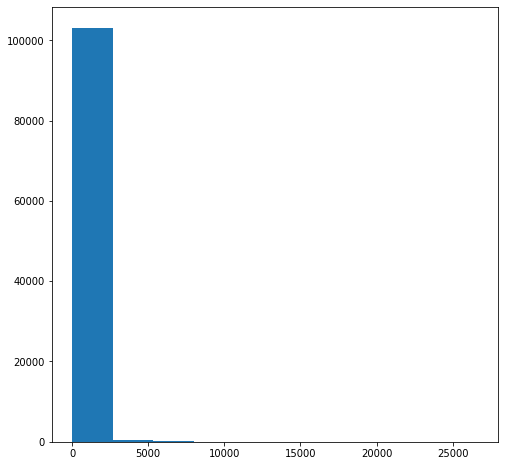

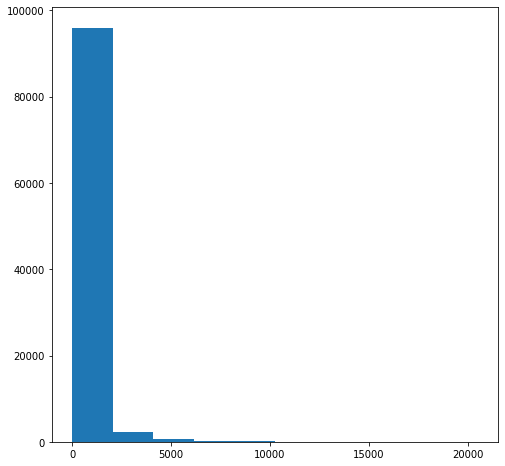

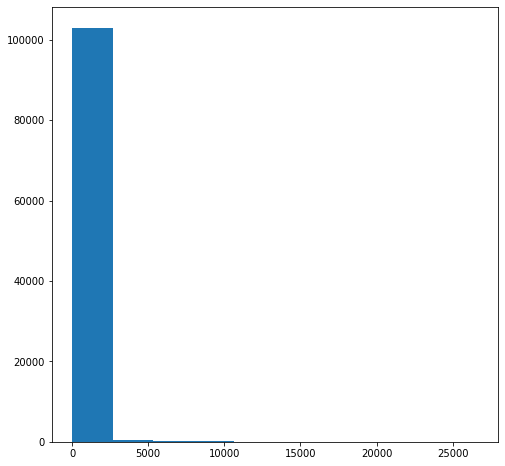

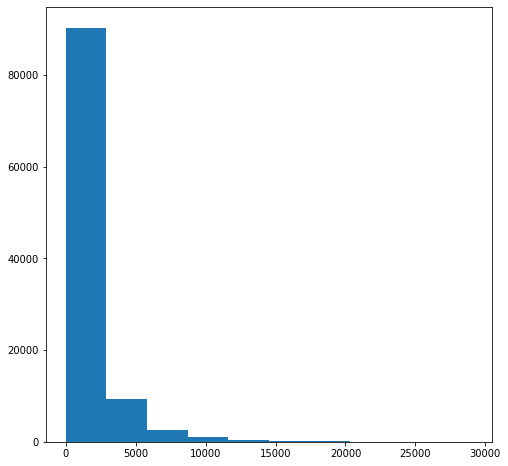

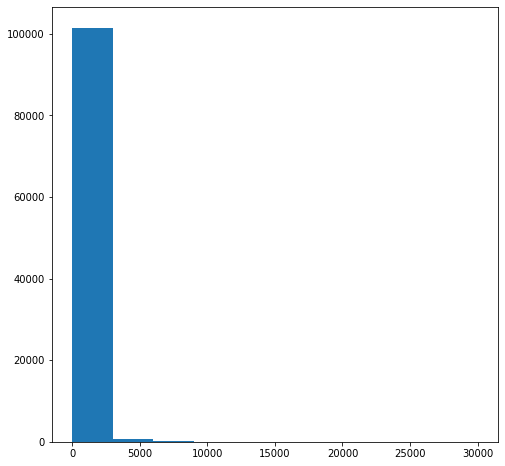

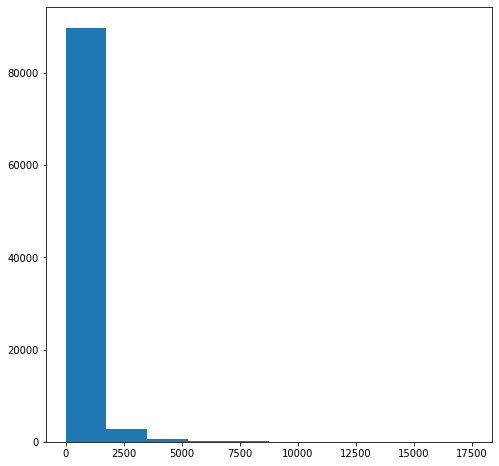

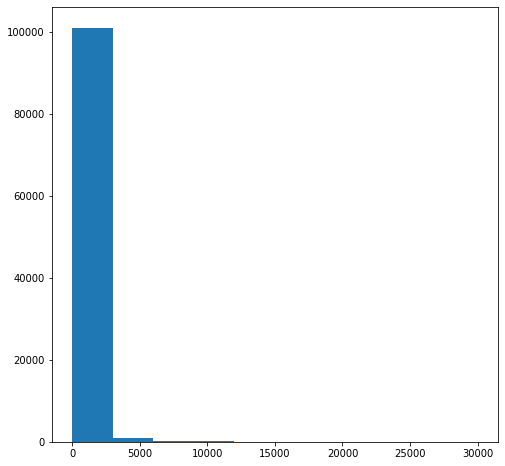

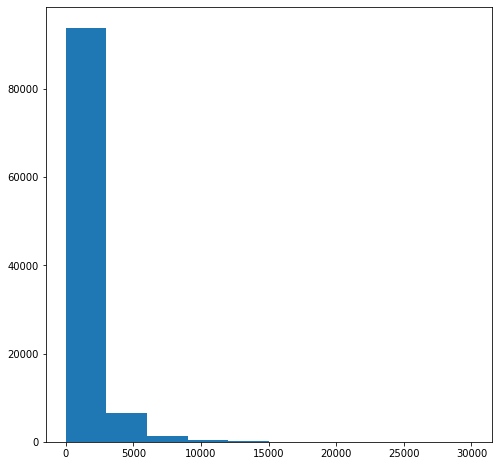

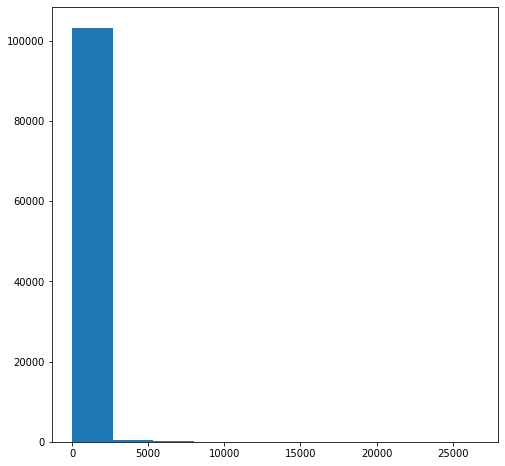

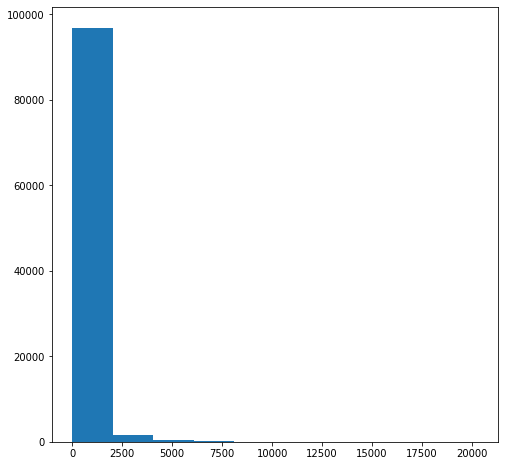

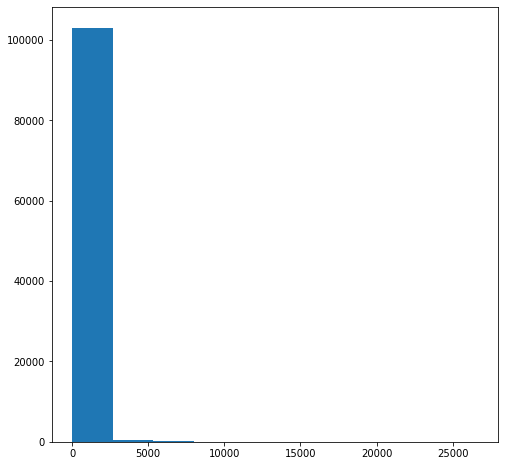

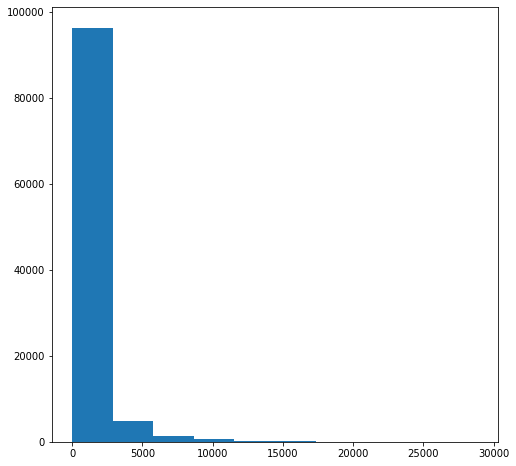

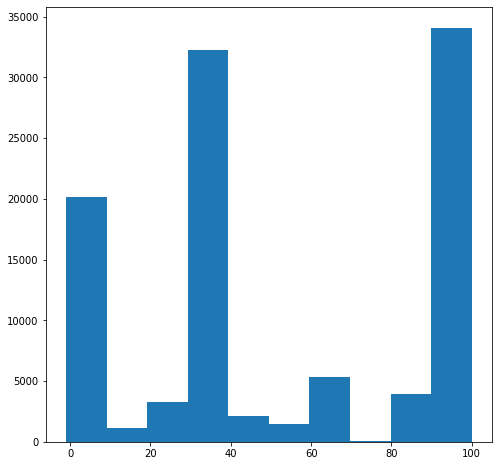

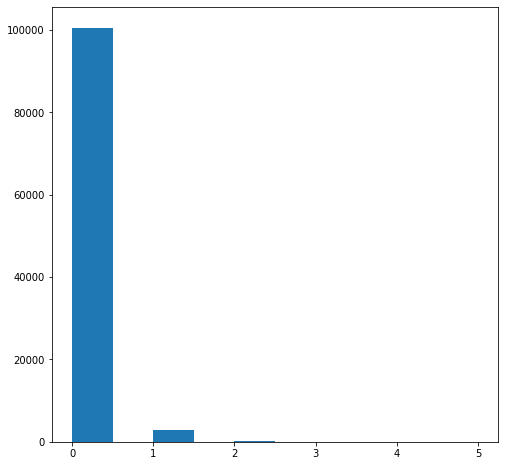

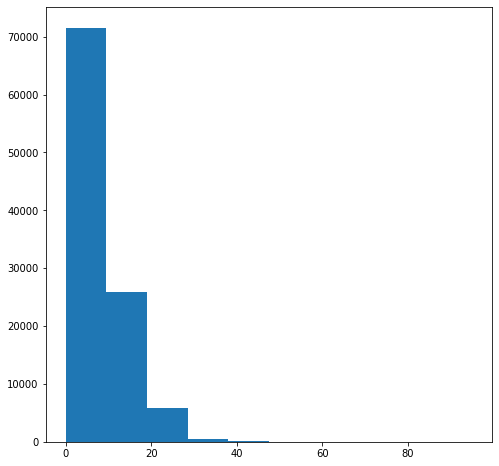

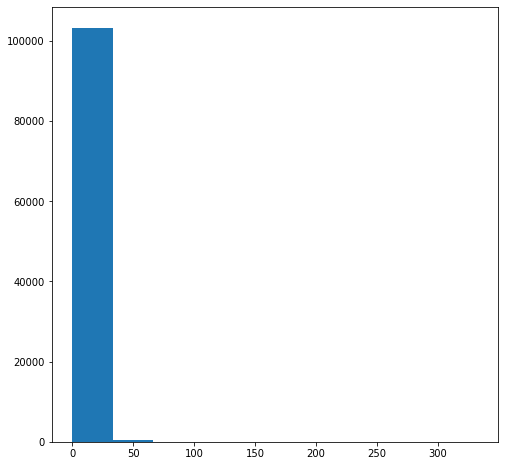

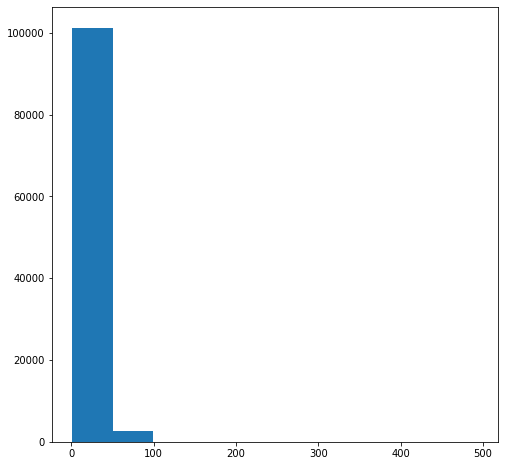

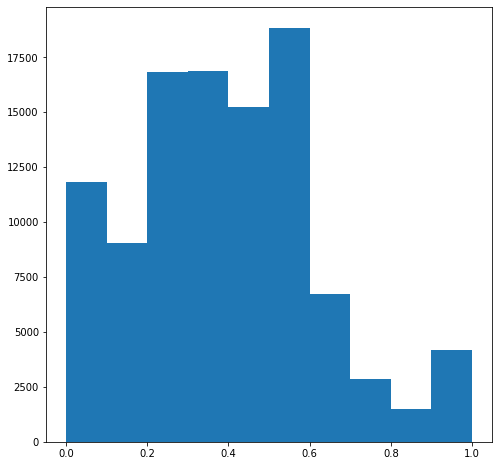

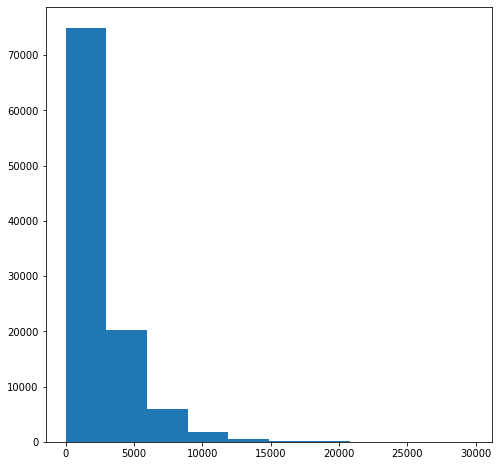

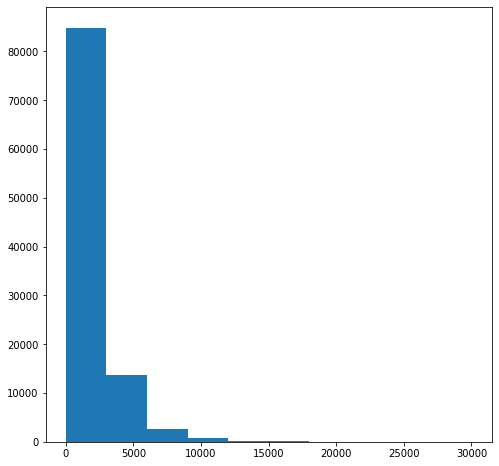

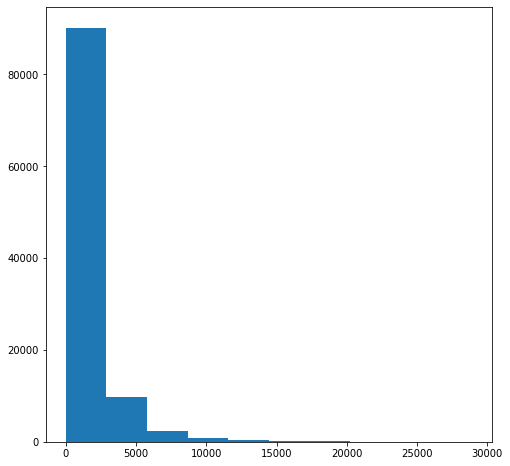

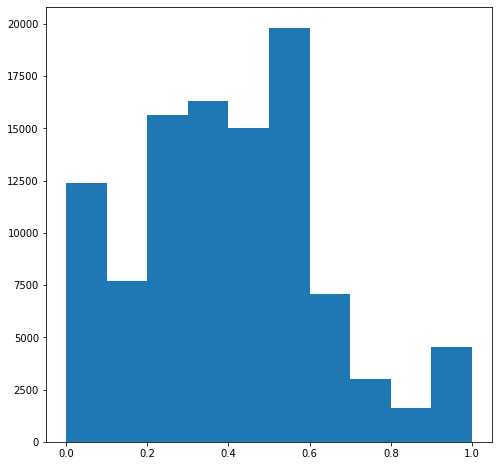

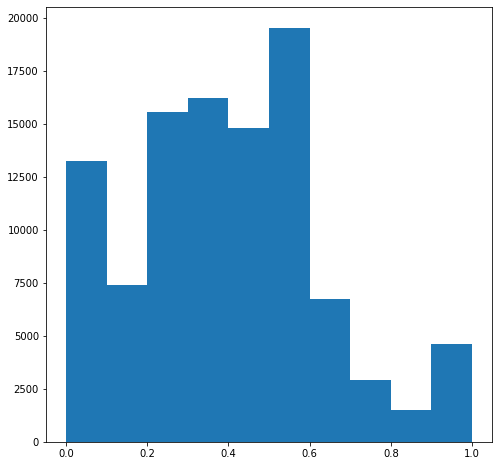

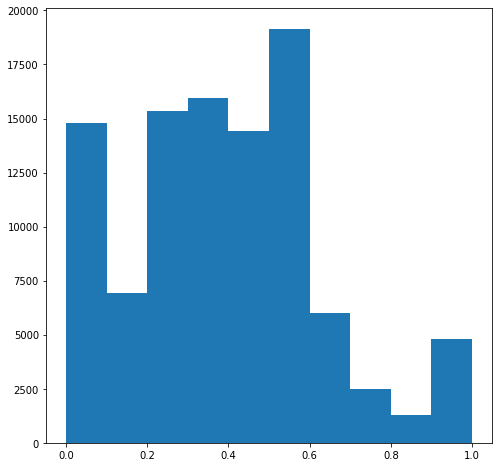

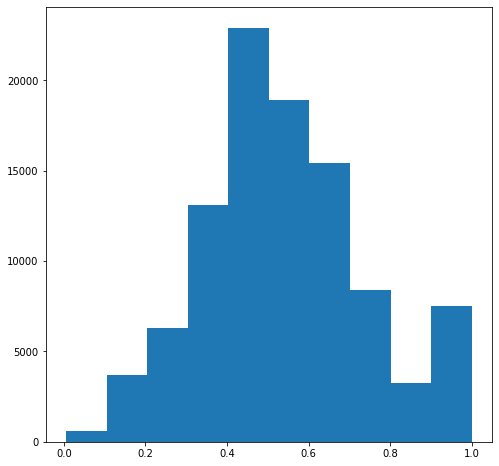

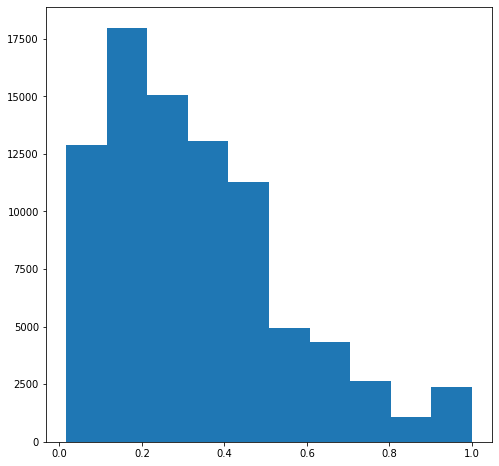

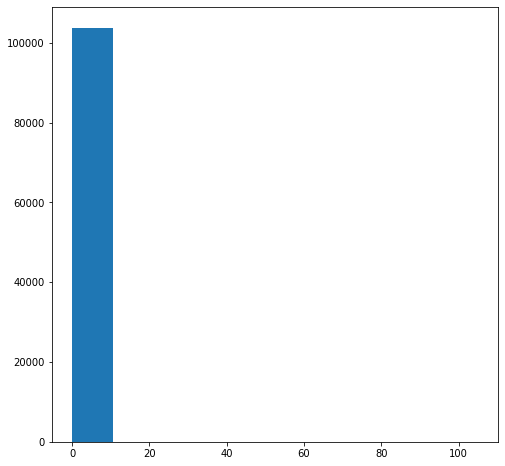

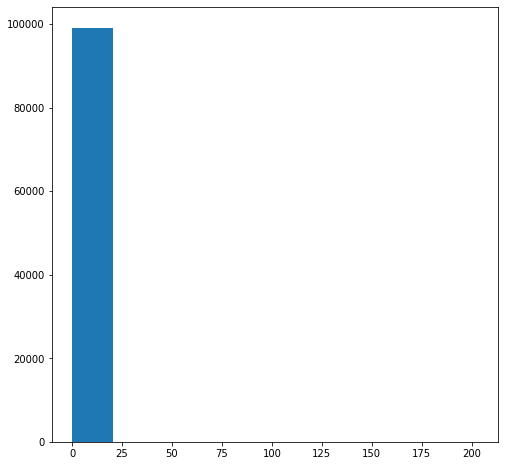

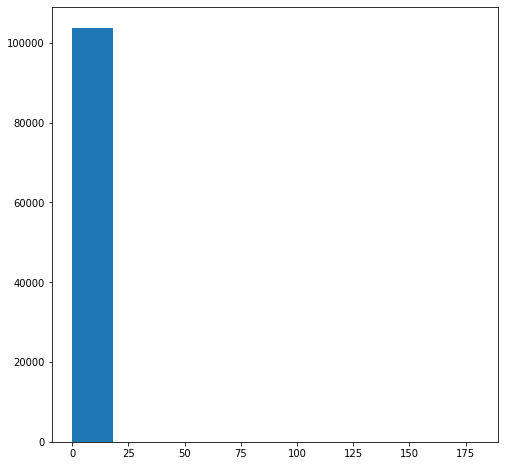

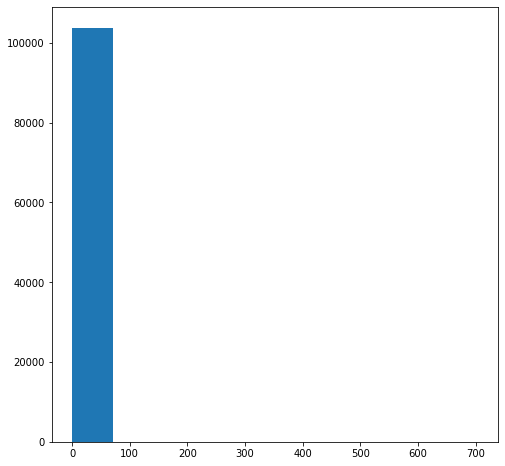

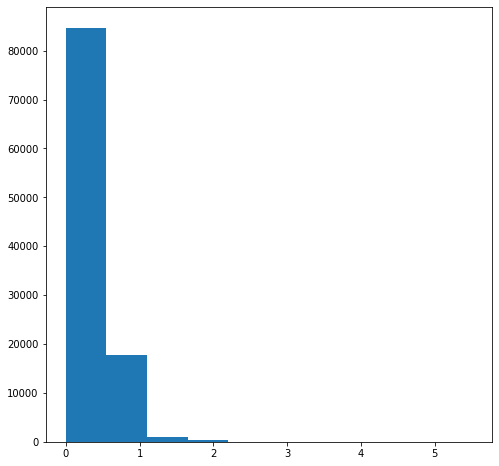

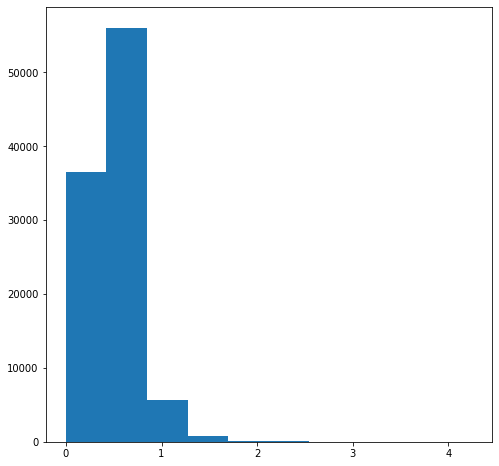

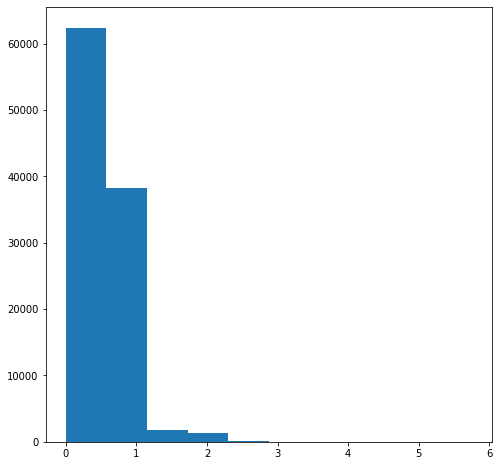

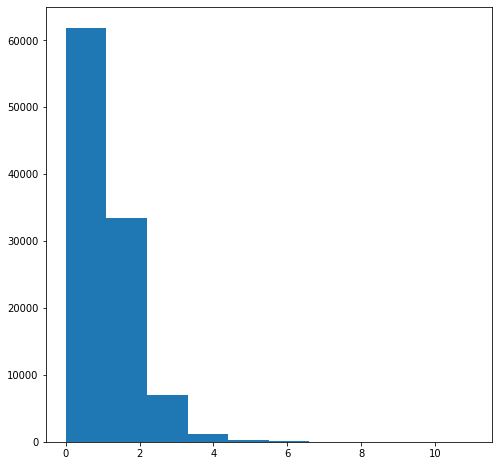

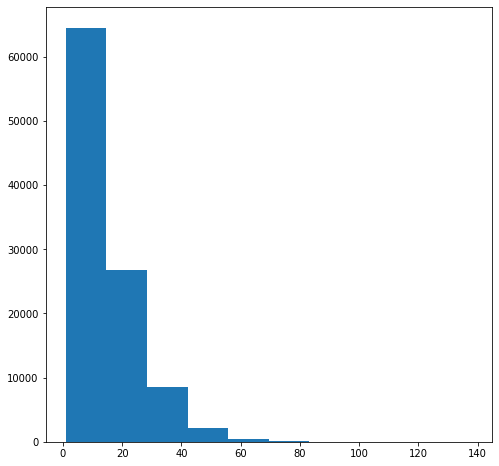

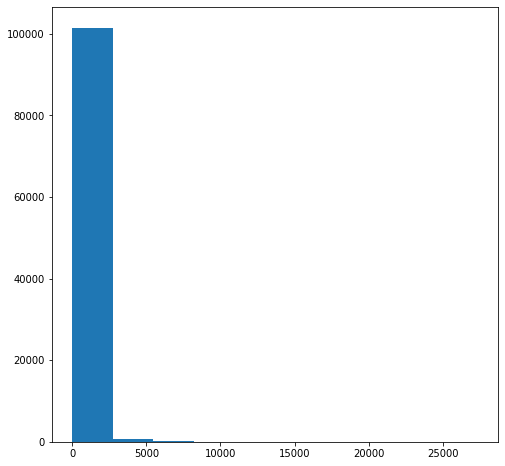

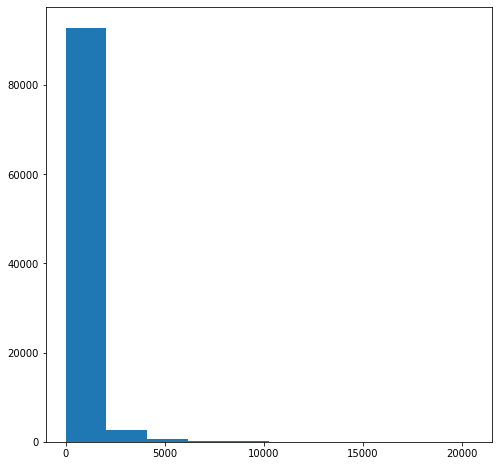

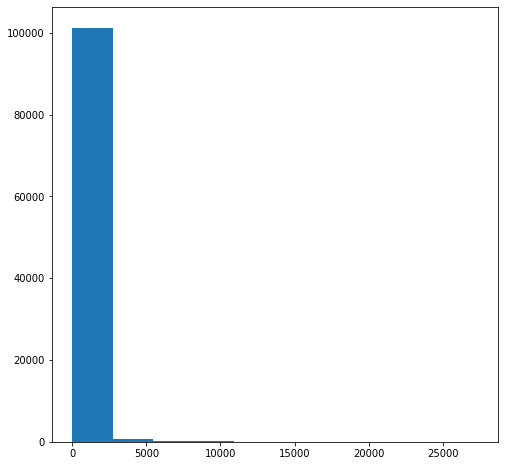

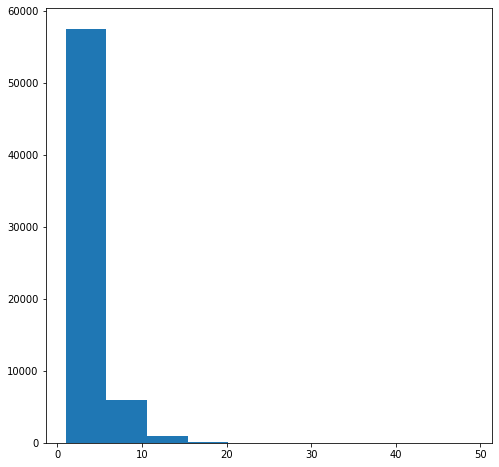

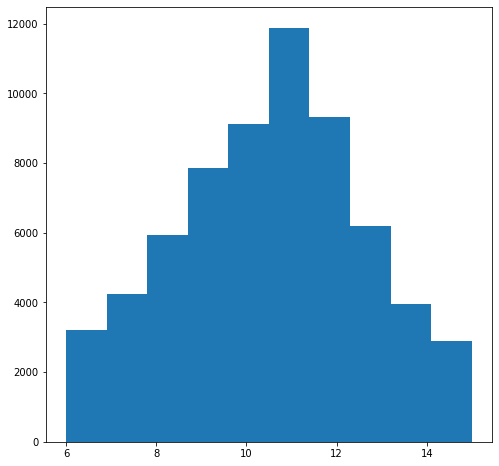

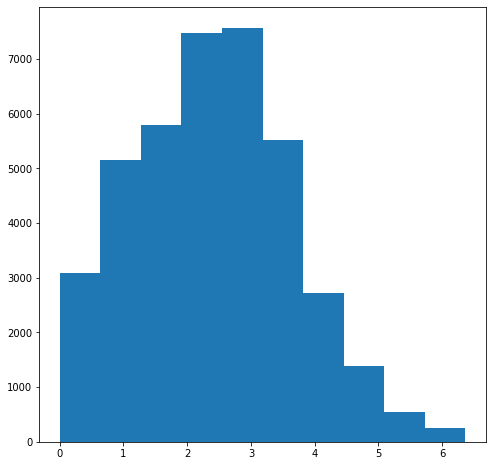

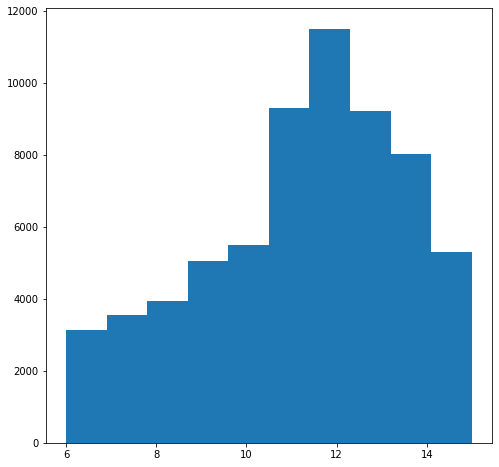

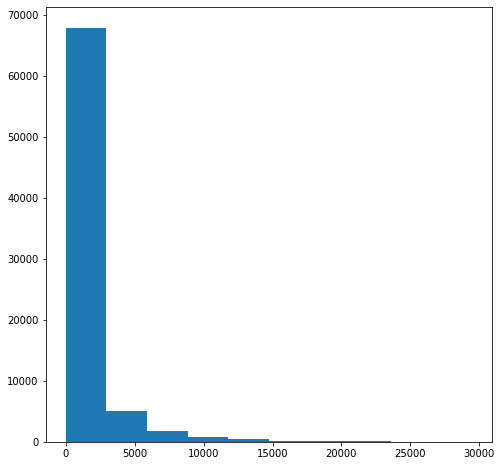

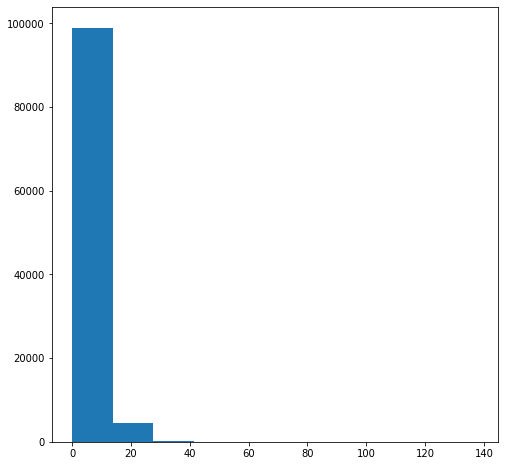

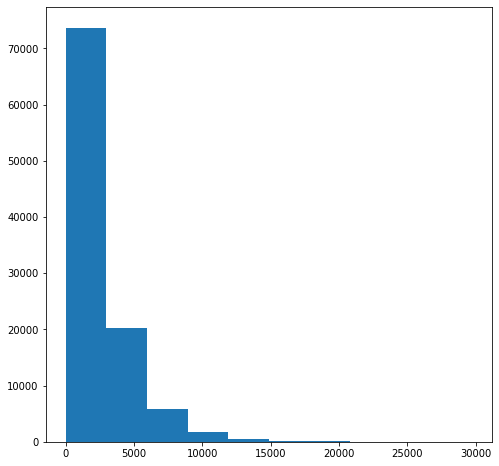

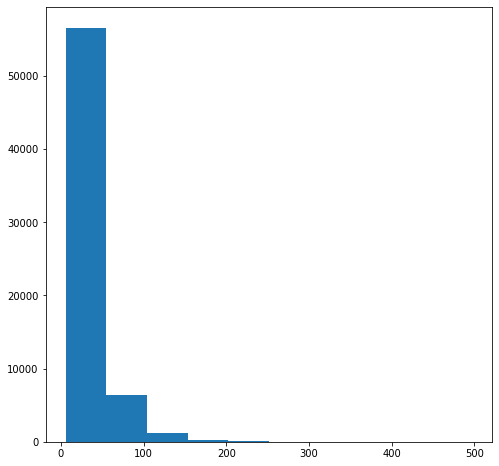

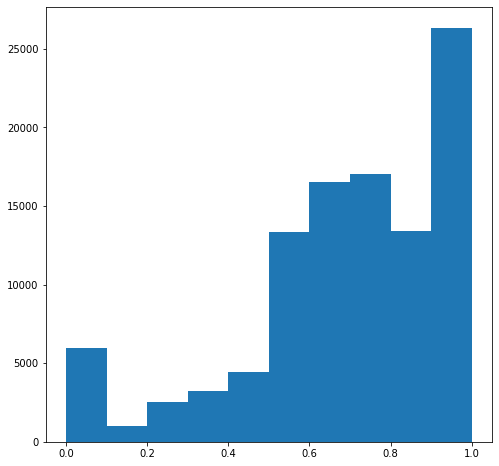

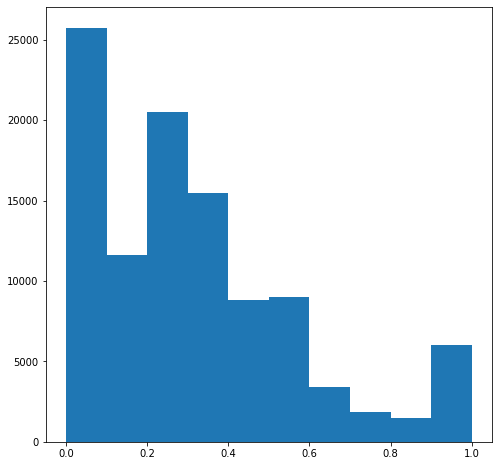

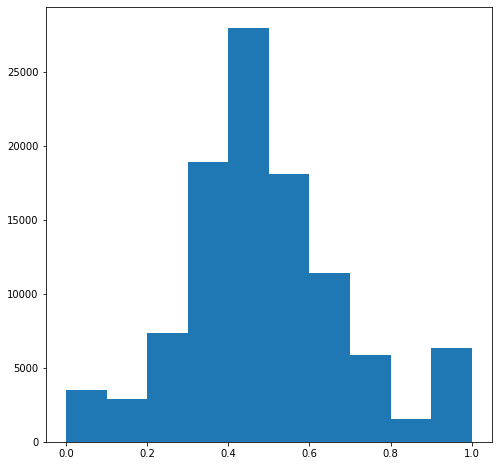

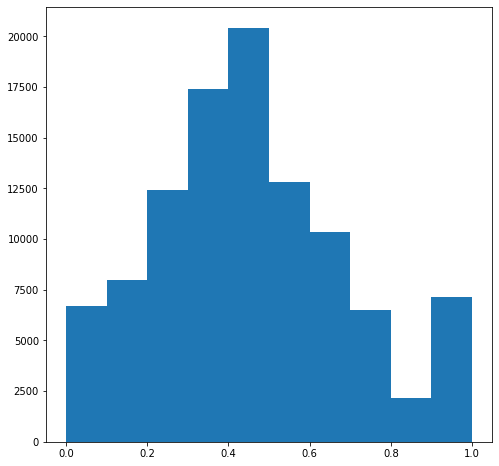

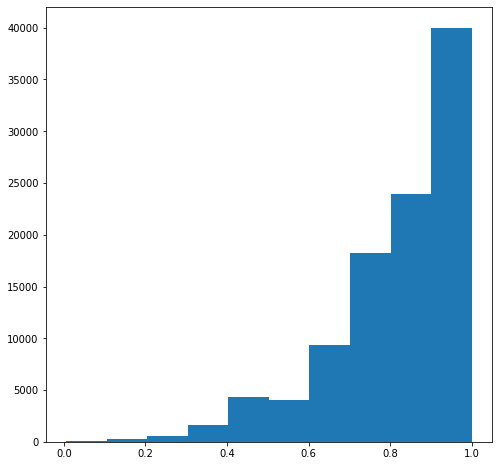

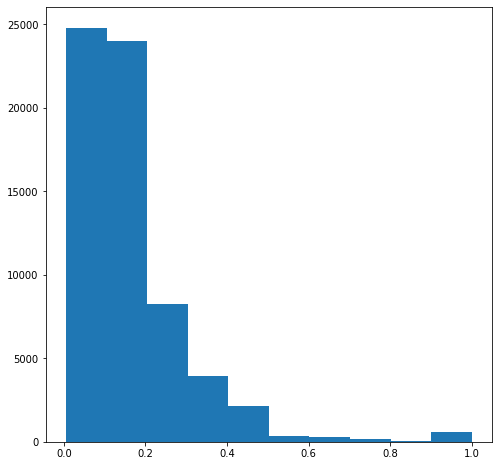

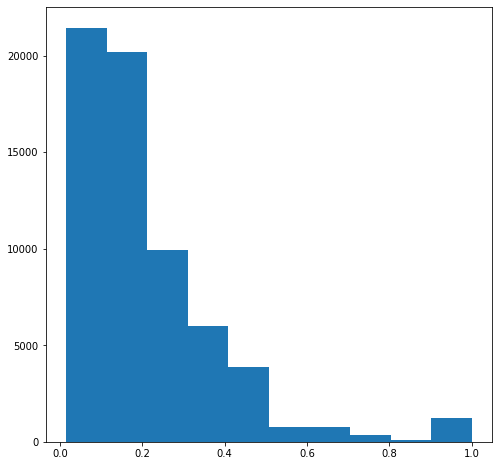

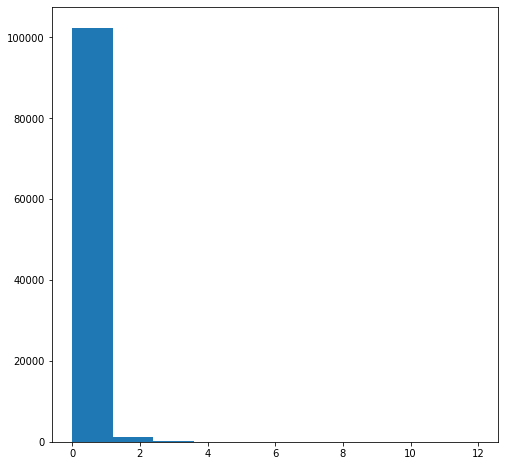

In [4]:
import matplotlib.pyplot as plt
for i in ['meanruntime', 'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock', 'stdtime to dock', '75%time to dock',
       'maxtime to dock', 'meanpause time', 'stdpause time', '75%pause time',
       'maxpause time', 'delmap', 'map_confidence', 'dock_no', 'pause_no',
       'jobs', 'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Paused Mode',
       'meanpauseafterdock', 'stdpauseafterdock', '75%pauseafterdock',
       'maxpauseafterdock', 'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real', 'mean_real',
       'std_real', '75%_real', 'count_shortruns', 'mean_shortruns',
       'std_shortruns', '75%_shortruns', 'time_to_clear_error', 'sum_error',
       'totalrun_real', 'totalshortrun', 'weekday_per', 'weekend_per',
       'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
       'error_per']:
    plt.figure(figsize=(8,8))
    plt.hist(data[i])
    plt.show()

In [6]:
data.columns

Index(['OEM Model', 'DSN', 'meanruntime', 'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock', 'stdtime to dock', '75%time to dock',
       'maxtime to dock', 'meanpause time', 'stdpause time', '75%pause time',
       'maxpause time', 'delmap', 'map_confidence', 'dock_no', 'pause_no',
       'jobs', 'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Paused Mode',
       'meanpauseafterdock', 'stdpauseafterdock', '75%pauseafterdock',
       'maxpauseafterdock', 'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real', 'mean_real',
       'std_real', '75%_real', 'count_shortruns', 'mean_shortruns',
       'std_shortruns', '75%_shortruns', 'time_to_clear_error', 'sum_error',
       'totalrun_real', 'totalshortrun', 'weekday_per', 'weekend_per',
       'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
       'error_per'],
      dt

In [7]:
data.shape

(103860, 56)

In [8]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(data[['meanruntime', 'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock', 'stdtime to dock', '75%time to dock',
       'maxtime to dock', 'meanpause time', 'stdpause time', '75%pause time',
       'maxpause time', 'delmap', 'map_confidence', 'dock_no', 'pause_no',
       'jobs', 'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Paused Mode',
       'meanpauseafterdock', 'stdpauseafterdock', '75%pauseafterdock',
       'maxpauseafterdock', 'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real', 'mean_real',
       'std_real', '75%_real', 'count_shortruns', 'mean_shortruns',
       'std_shortruns', '75%_shortruns', 'time_to_clear_error', 'sum_error',
       'totalrun_real', 'totalshortrun', 'weekday_per', 'weekend_per',
       'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
       'error_per']].fillna(0)))

In [9]:
data=data[(z < 3).all(axis=1)]

meanruntime


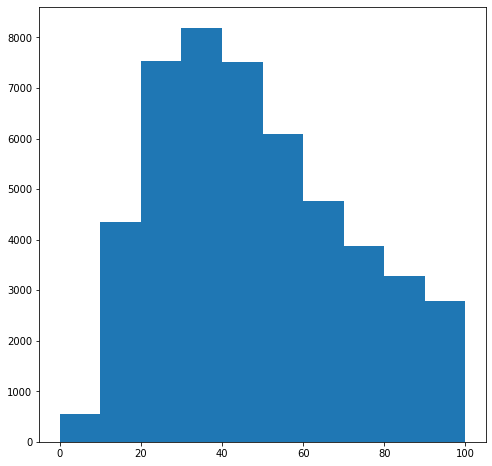

stdruntime


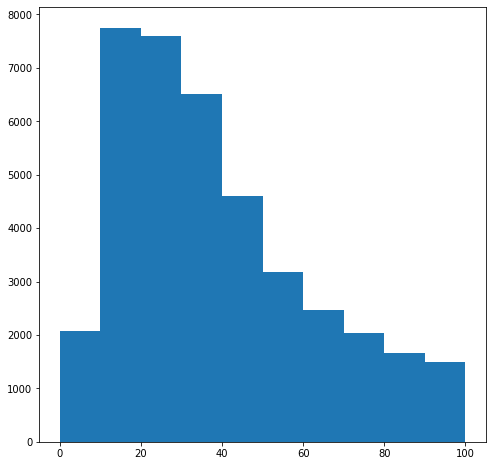

75%runtime


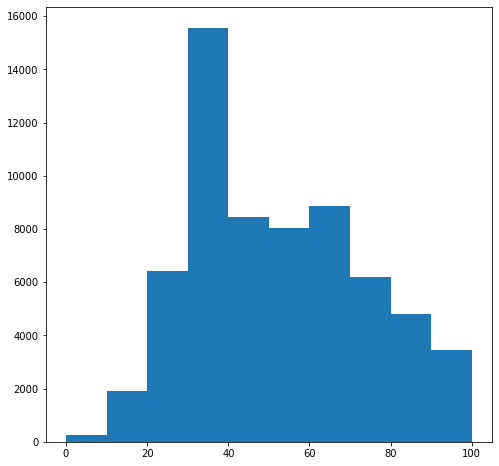

maxruntime


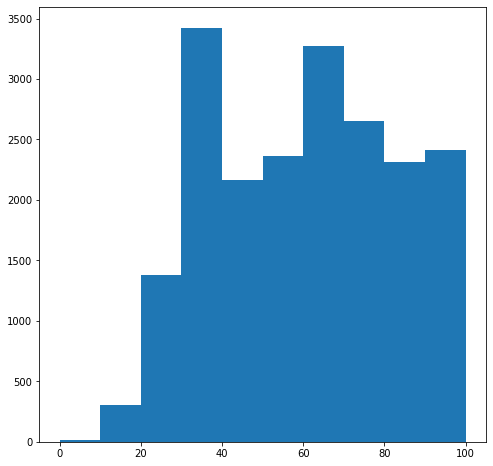

meantime to dock


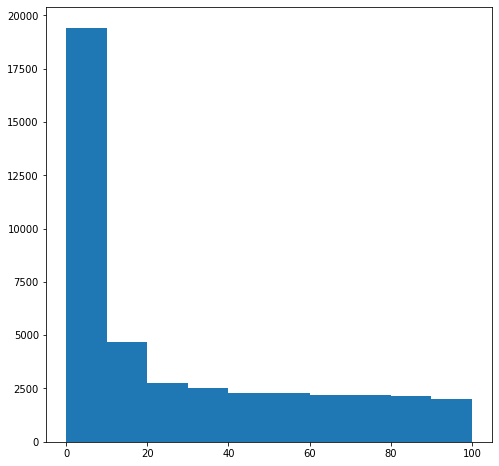

stdtime to dock


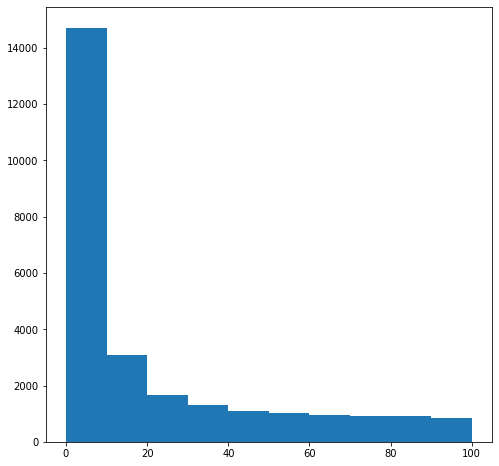

75%time to dock


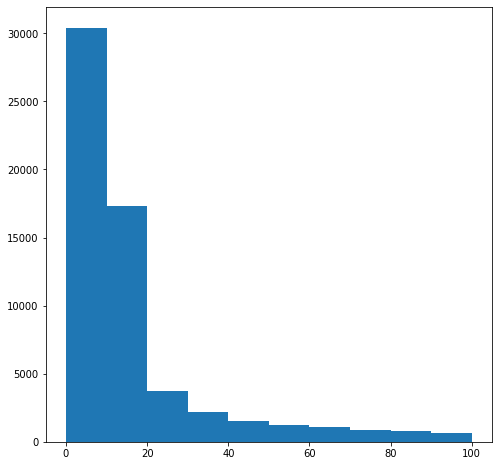

maxtime to dock


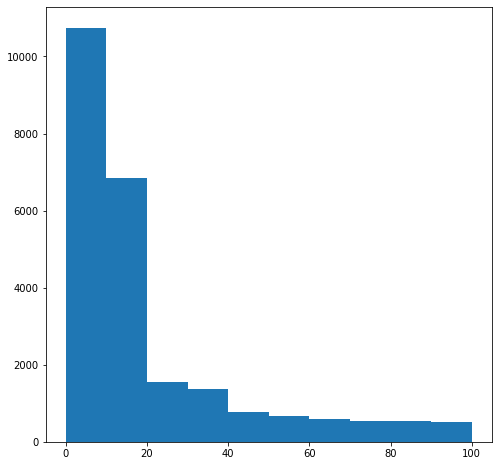

meanpause time


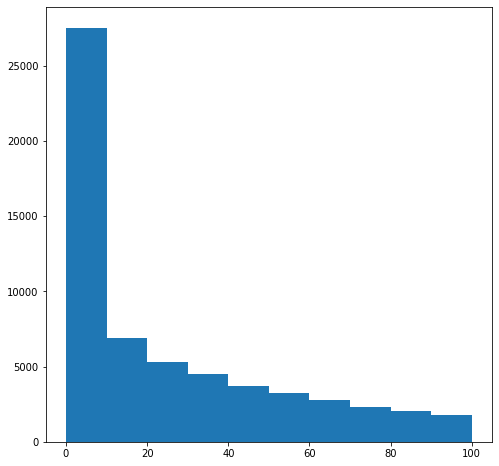

stdpause time


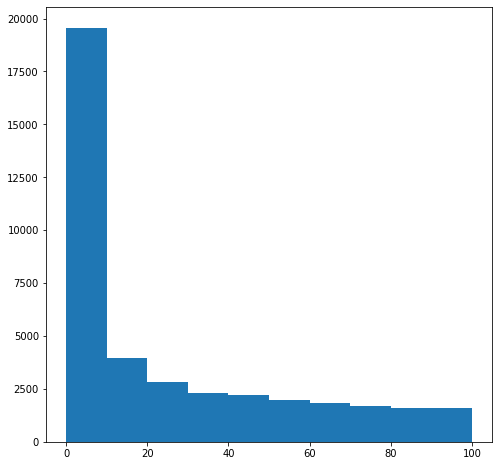

75%pause time


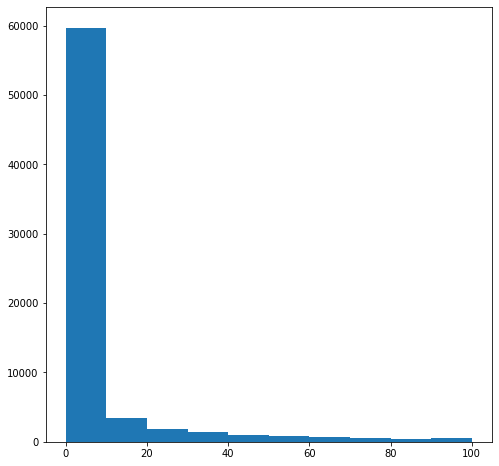

maxpause time


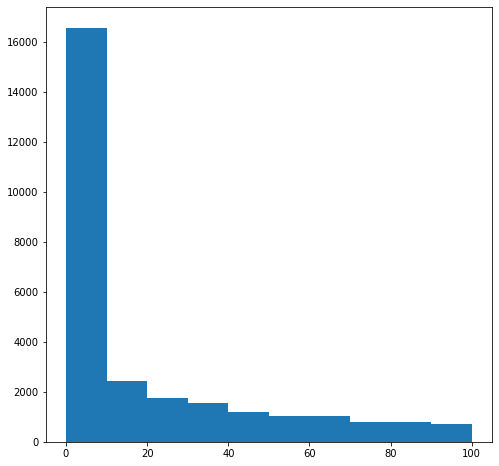

delmap


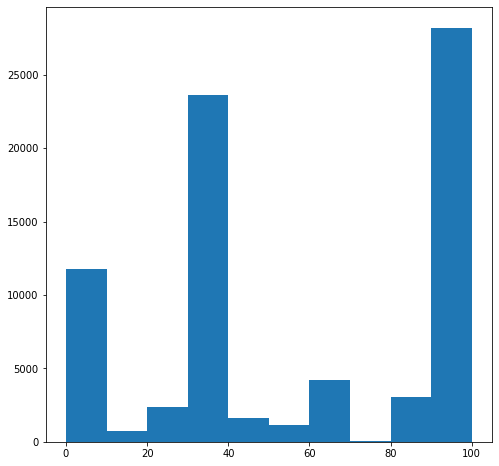

map_confidence


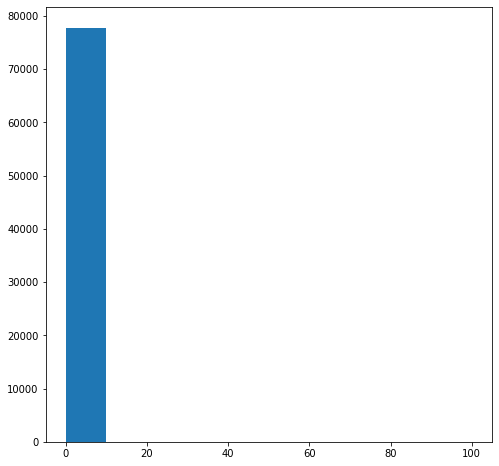

dock_no


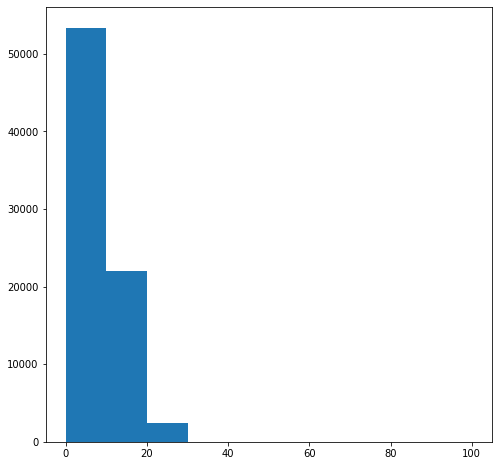

pause_no


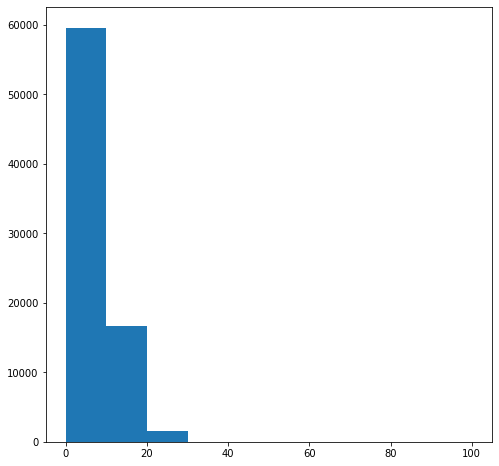

jobs


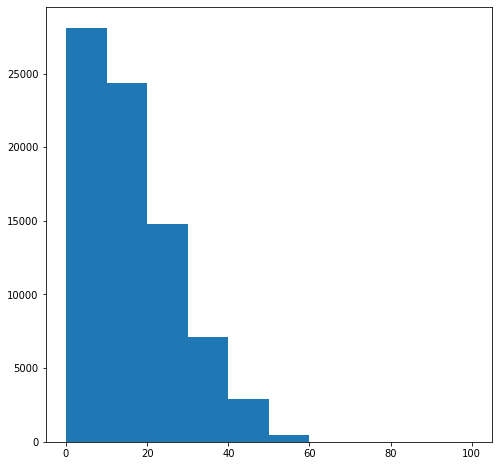

successrate


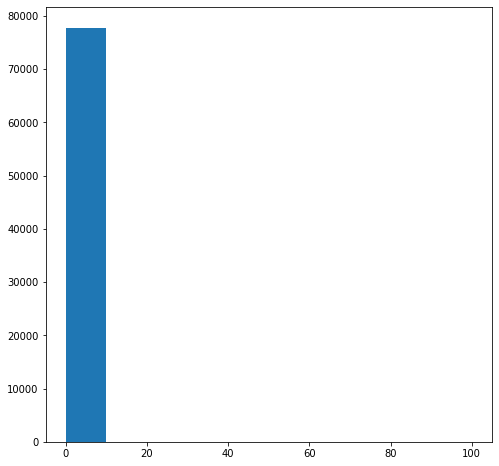

totalrun


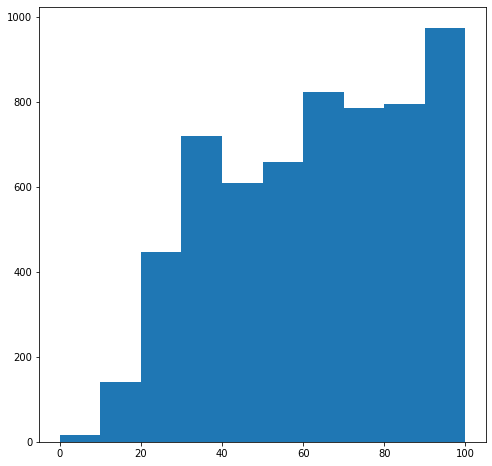

totaldock


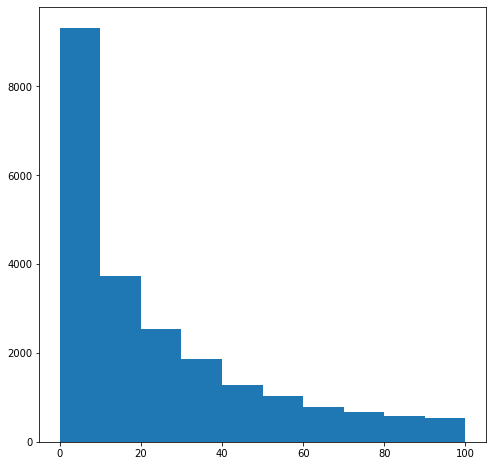

totalpause


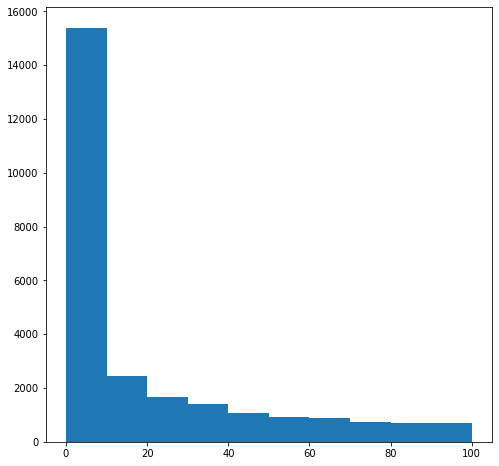

rate_1


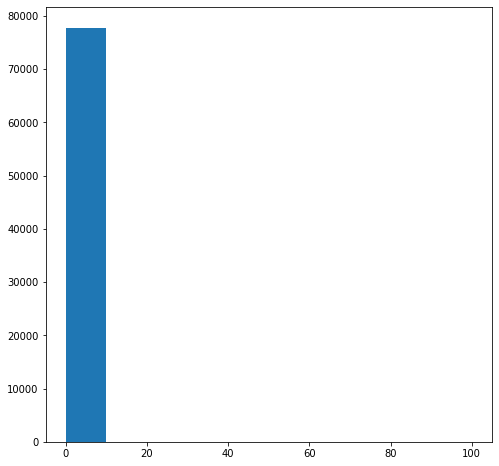

rate_5


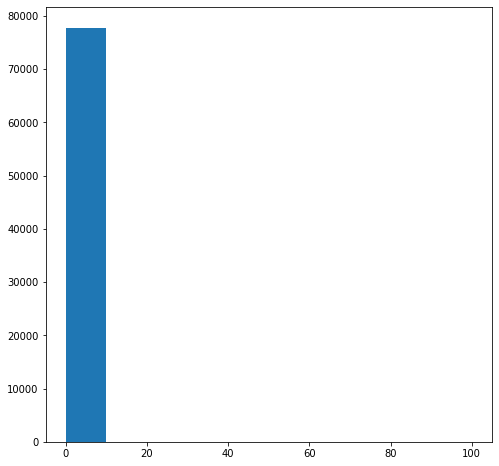

rate_15


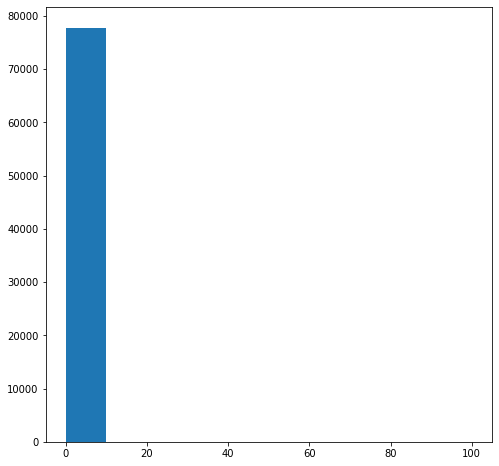

Contacted Charging Dock


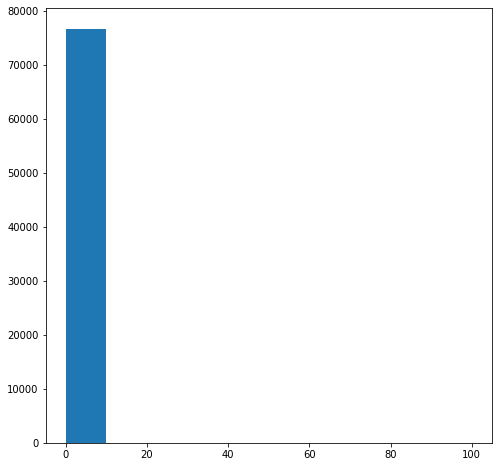

Entered Paused Mode


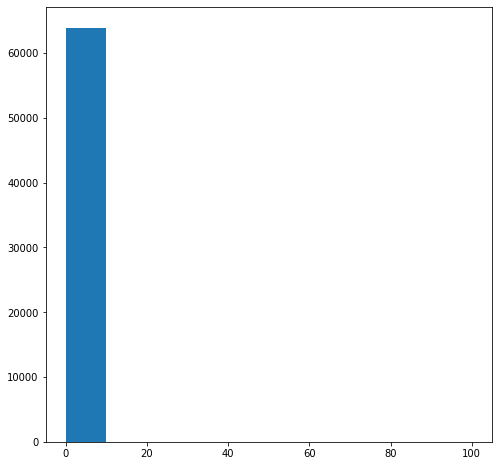

meanpauseafterdock


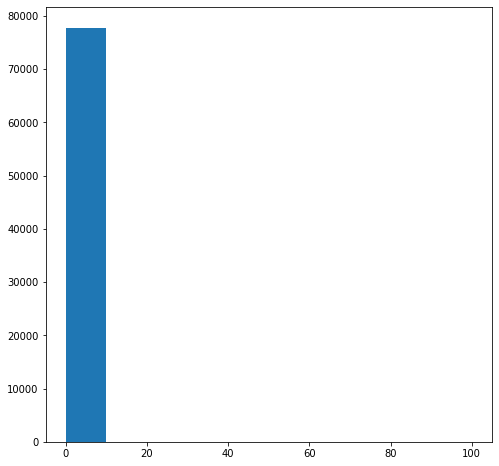

stdpauseafterdock


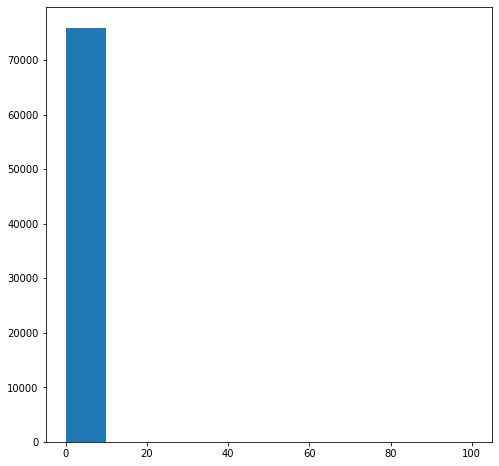

75%pauseafterdock


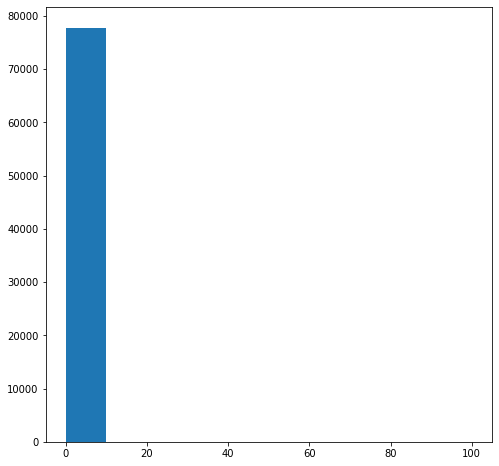

maxpauseafterdock


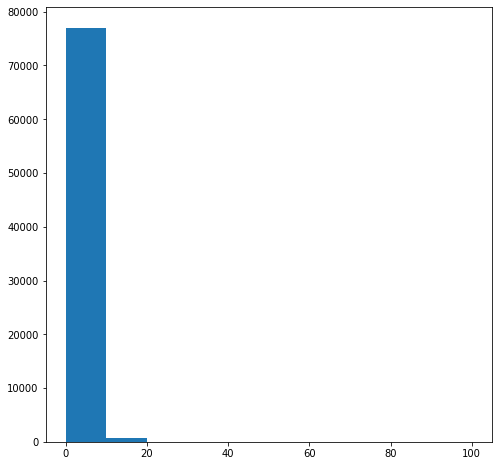

meanpausebeforedock


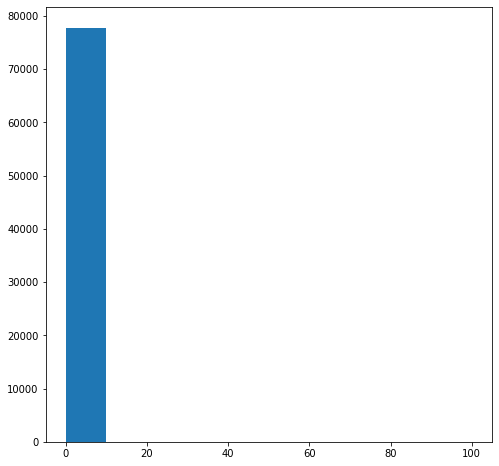

stdpausebeforedock


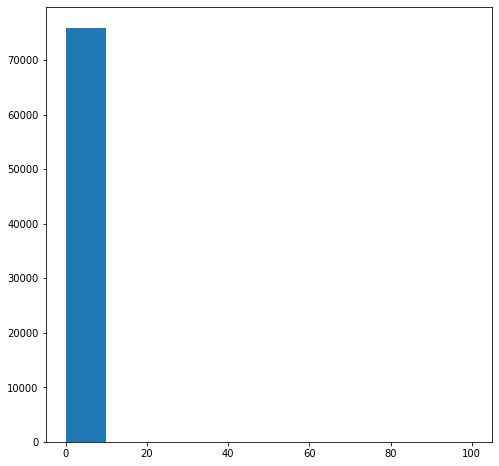

75%pausebeforedock


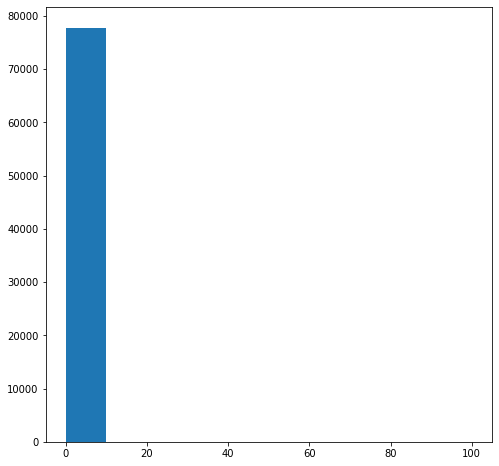

maxpausebeforedock


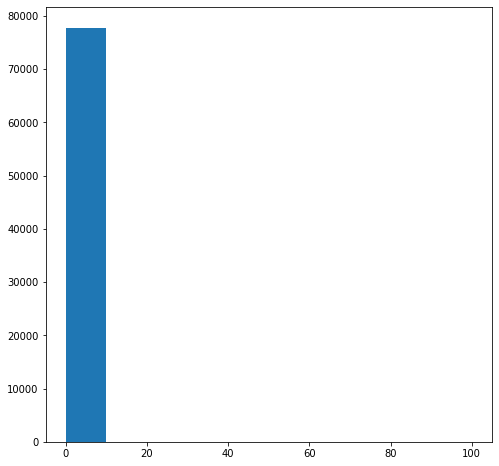

count_real


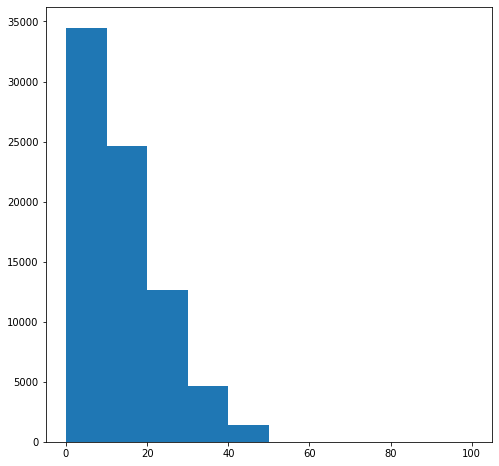

mean_real


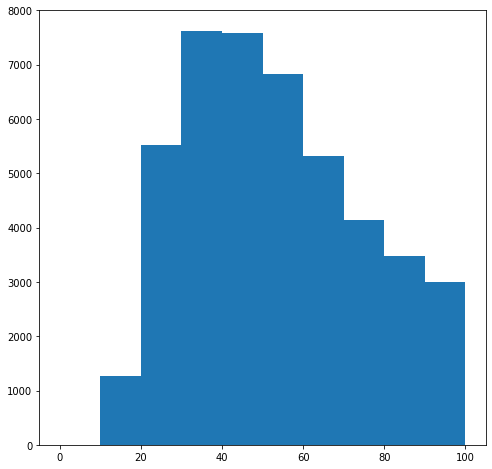

std_real


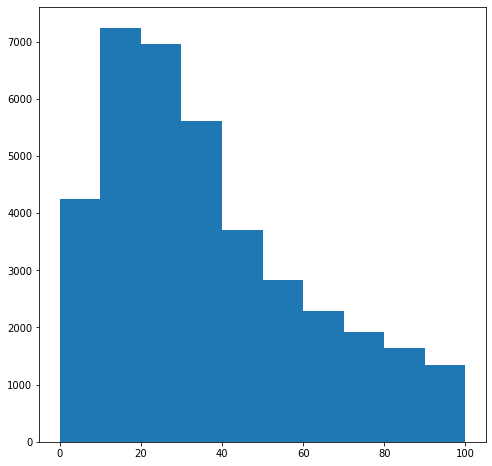

75%_real


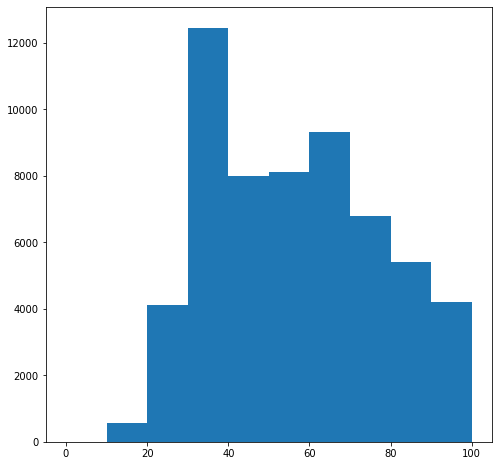

count_shortruns


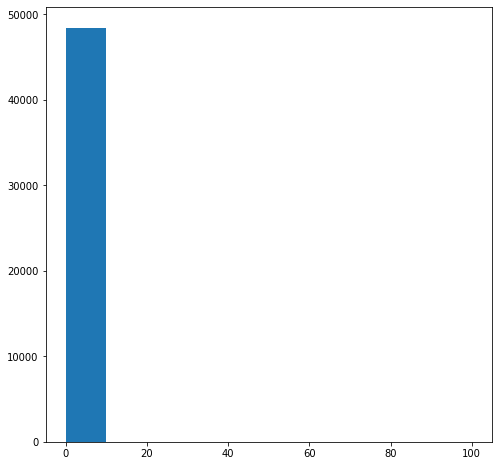

mean_shortruns


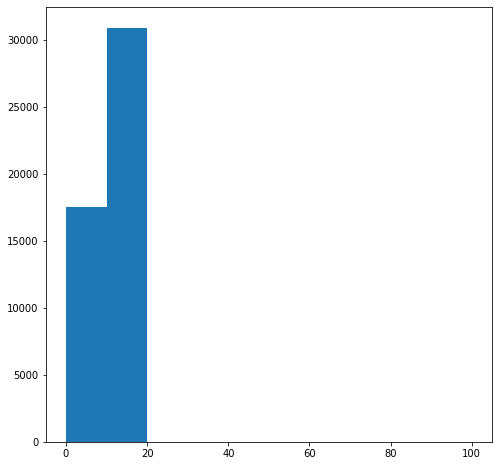

std_shortruns


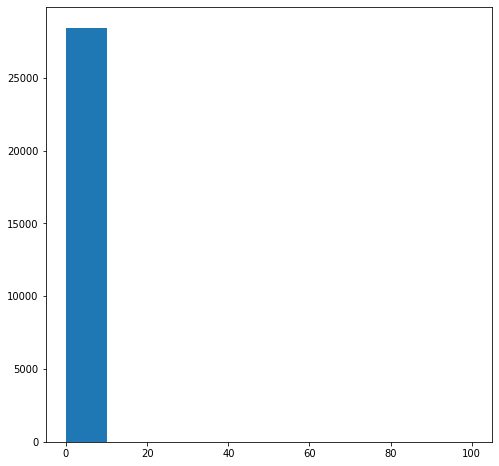

75%_shortruns


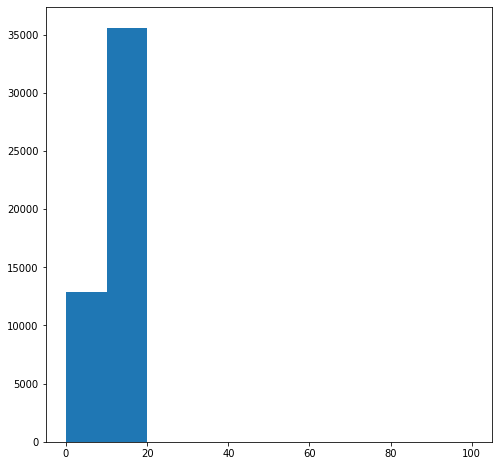

time_to_clear_error


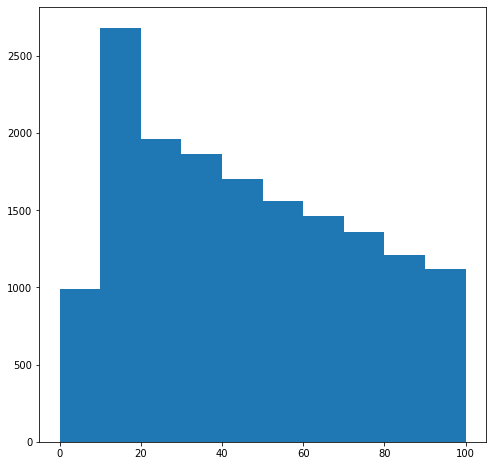

sum_error


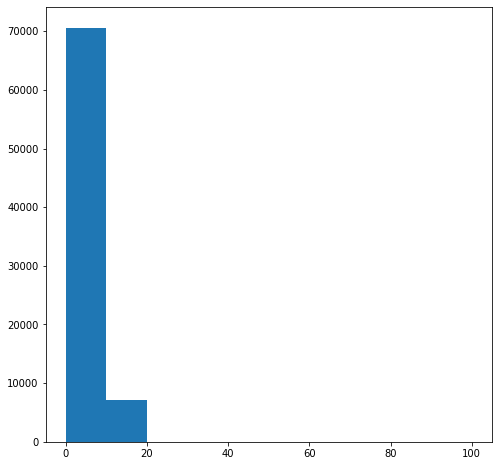

totalrun_real


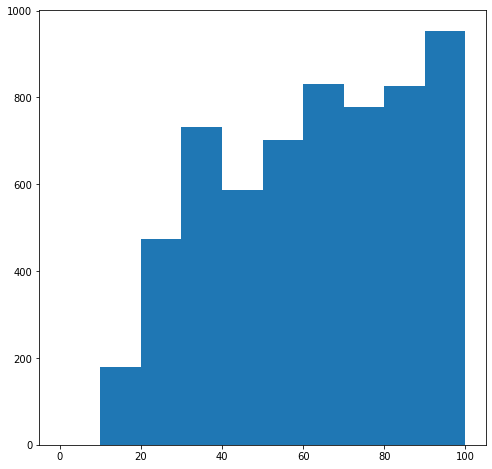

totalshortrun


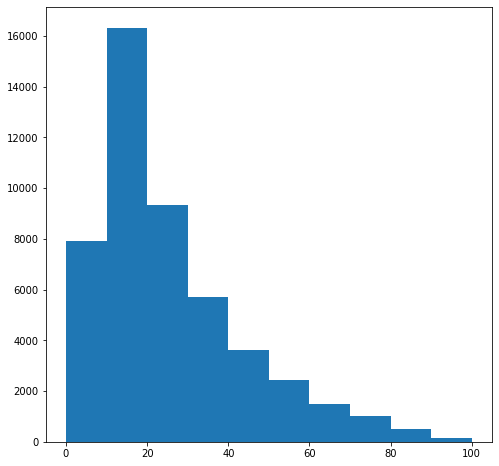

weekday_per


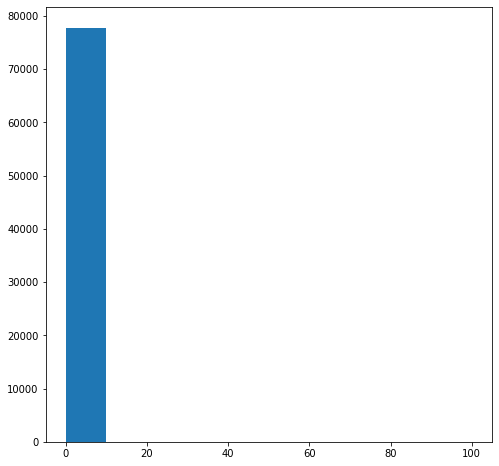

weekend_per


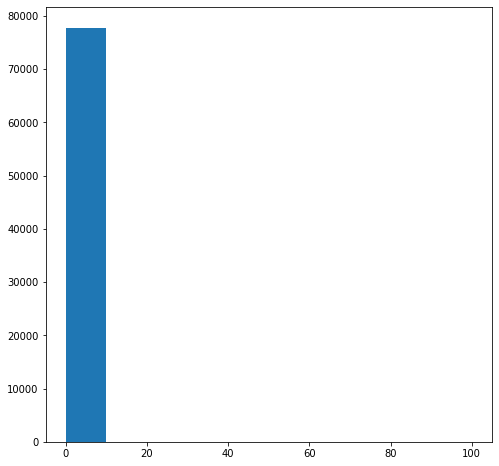

pause_per


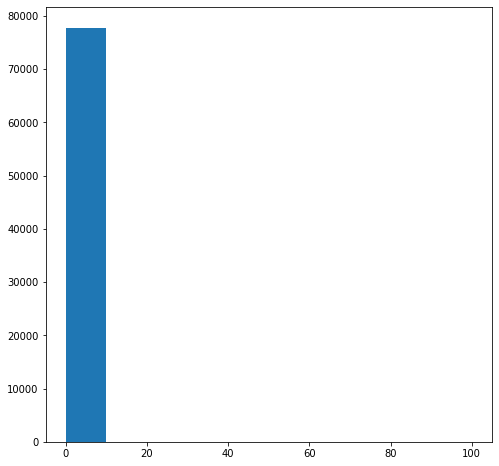

dock_per


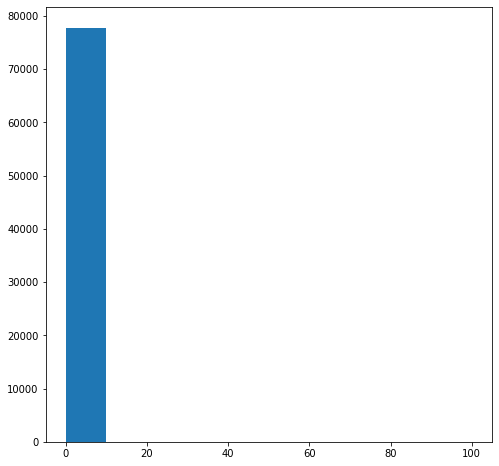

real_per


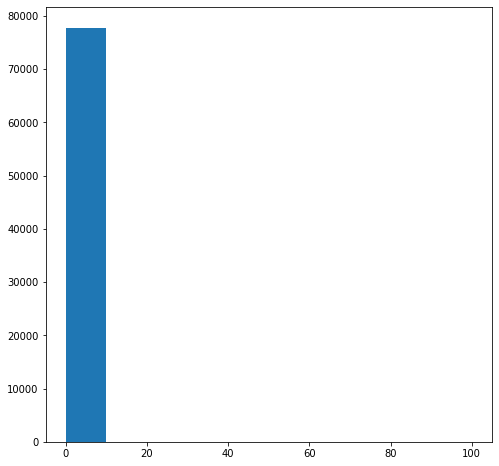

shortrun_per


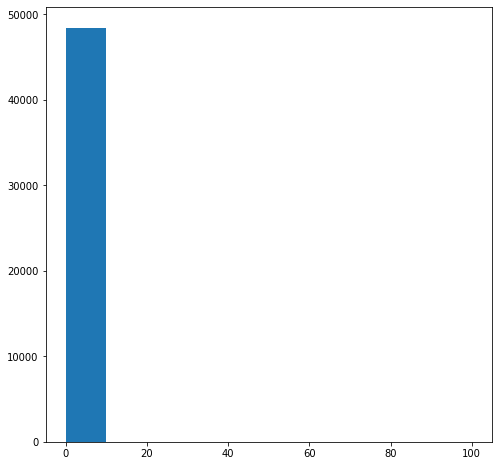

short/real


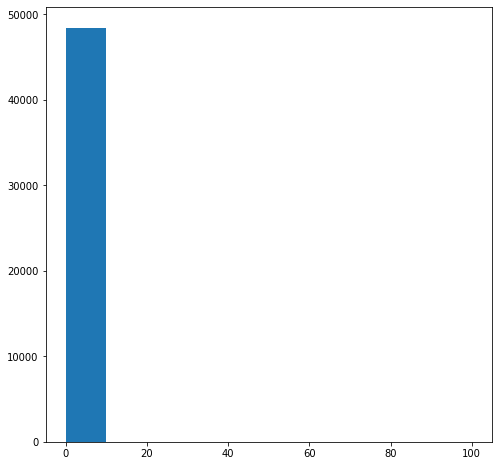

error_per


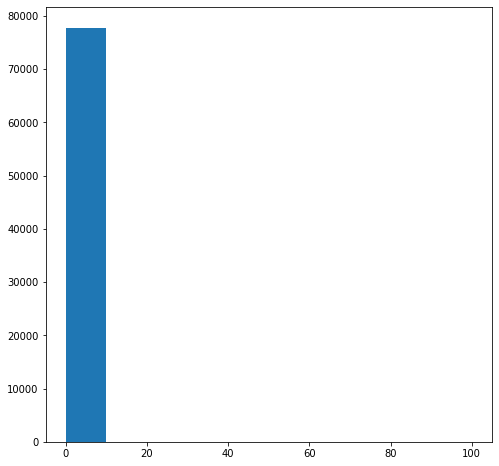

In [12]:
for i in ['meanruntime', 'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock', 'stdtime to dock', '75%time to dock',
       'maxtime to dock', 'meanpause time', 'stdpause time', '75%pause time',
       'maxpause time', 'delmap', 'map_confidence', 'dock_no', 'pause_no',
       'jobs', 'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Paused Mode',
       'meanpauseafterdock', 'stdpauseafterdock', '75%pauseafterdock',
       'maxpauseafterdock', 'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real', 'mean_real',
       'std_real', '75%_real', 'count_shortruns', 'mean_shortruns',
       'std_shortruns', '75%_shortruns', 'time_to_clear_error', 'sum_error',
       'totalrun_real', 'totalshortrun', 'weekday_per', 'weekend_per',
       'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
       'error_per']:
    print(i)
    plt.figure(figsize=(8,8))
    plt.hist(data[i],range=[0,100])
    plt.show()

In [628]:
# data[['OEM Model', 'DSN', 'sum', 'count',   'delmap',
#        'charge_cycle',  'count_real',
#        'mean_real', 'std_real',   '75%_real',
#        'max_real', 'count_shortruns', 'mean_shortruns', 'std_shortruns',
#       '75%_shortruns',
#        'max_shortruns', 'time_to_clear_error', 'sum_error', 
#        'meanruntime', 'stdruntime',  '75%runtime', 'maxruntime',
#        'meantime to dock', 'stdtime to dock',
       
#        '75%time to dock', 'maxtime to dock', 
#        'meanpause time', 'stdpause time', '75%pause time', 'maxpause time', 'dock_no',
#        'pause_no', 'jobs', 
#        'meanerrorafterdockpauseafterdock',
#        'stderrorafterdockpauseafterdock',  
#         'maxerrorafterdockpauseafterdock',
       
#        'meanerrorbeforedockpausebeforedock',
#        'stderrorbeforedockpausebeforedock',
#        'maxerrorbeforedockpausebeforedock', 'Contacted Charging Dock',
#         'Entered Paused Mode', 
#        'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
#        'totalrun_real', 'totalshortrun', 'totalrun_per', 'totaldock_per',
#        'totalpause_per', 'totalrun_real_per', 'weekday_per', 'weekend_per']]=data[['OEM Model', 'DSN', 'sum', 'count',   'delmap',
#        'charge_cycle',  'count_real',
#        'mean_real', 'std_real',   '75%_real',
#        'max_real', 'count_shortruns', 'mean_shortruns', 'std_shortruns',
#       '75%_shortruns',
#        'max_shortruns', 'time_to_clear_error', 'sum_error', 
#        'meanruntime', 'stdruntime',  '75%runtime', 'maxruntime',
#        'meantime to dock', 'stdtime to dock',
       
#        '75%time to dock', 'maxtime to dock', 
#        'meanpause time', 'stdpause time', '75%pause time', 'maxpause time', 'dock_no',
#        'pause_no', 'jobs', 
#        'meanerrorafterdockpauseafterdock',
#        'stderrorafterdockpauseafterdock',  
#         'maxerrorafterdockpauseafterdock',
       
#        'meanerrorbeforedockpausebeforedock',
#        'stderrorbeforedockpausebeforedock',
#        'maxerrorbeforedockpausebeforedock', 'Contacted Charging Dock',
#         'Entered Paused Mode', 
#        'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
#        'totalrun_real', 'totalshortrun', 'totalrun_per', 'totaldock_per',
#        'totalpause_per', 'totalrun_real_per', 'weekday_per', 'weekend_per']].fillna(0)

In [629]:
#data['map_confidence']=data['map_confidence'].fillna(data['map_confidence'].mean())

In [630]:
#data['successrate']=data['successrate'].fillna(data['successrate'].mean())

In [2]:
data=data.fillna(0)

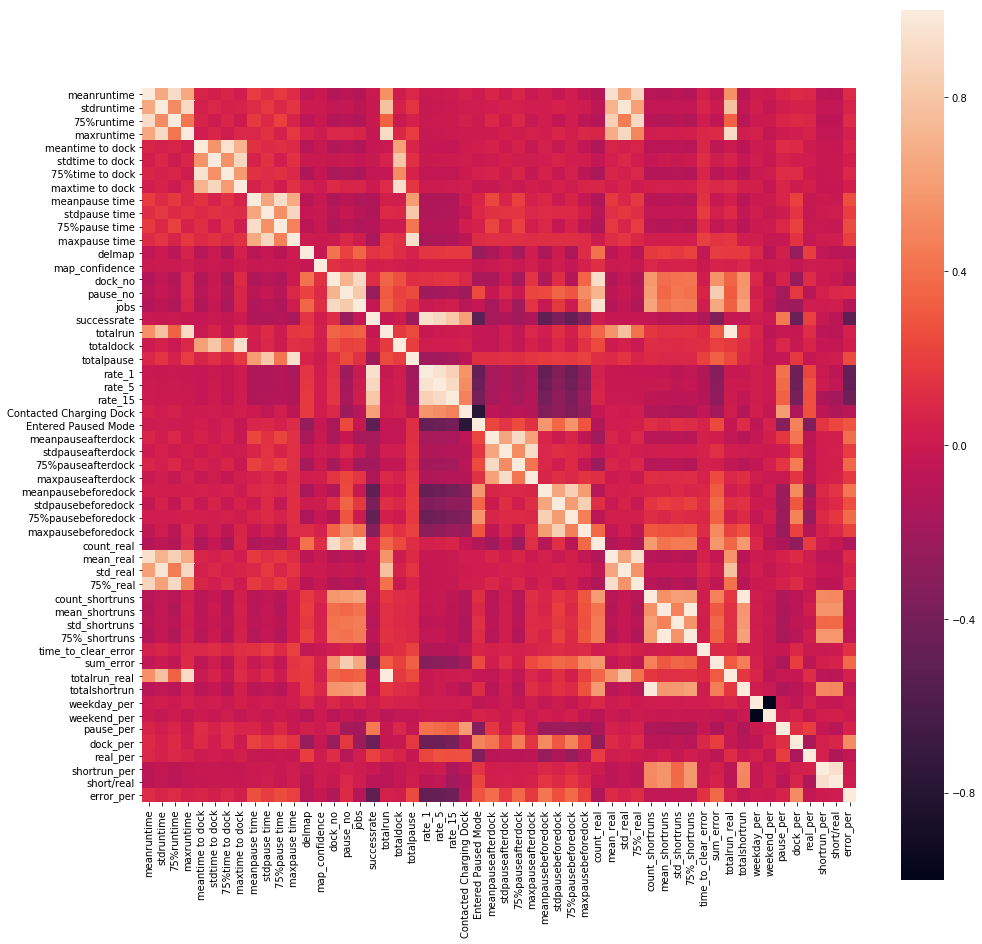

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cor = data.drop(['OEM Model','DSN'],axis=1).corr()
plt.figure(figsize=(16,16))#Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [3]:
import numpy as np
num_cols=data.select_dtypes(include=np.number).columns



In [4]:
from scipy import stats
skewlist=[]
for i in num_cols:
    
    if stats.skew(data[i])>1:
        skewlist.append(i)
    

In [5]:
#stats.skew(result['jobs'])

In [6]:
skewlist

['meanruntime',
 'stdruntime',
 '75%runtime',
 'maxruntime',
 'meantime to dock',
 'stdtime to dock',
 '75%time to dock',
 'maxtime to dock',
 'meanpause time',
 'stdpause time',
 '75%pause time',
 'maxpause time',
 'map_confidence',
 'dock_no',
 'pause_no',
 'jobs',
 'totalrun',
 'totaldock',
 'totalpause',
 'meanpauseafterdock',
 'stdpauseafterdock',
 '75%pauseafterdock',
 'maxpauseafterdock',
 'meanpausebeforedock',
 'count_real',
 'mean_real',
 'std_real',
 '75%_real',
 'count_shortruns',
 'std_shortruns',
 'time_to_clear_error',
 'sum_error',
 'totalrun_real',
 'totalshortrun',
 'shortrun_per',
 'short/real',
 'error_per']

In [260]:
# stats.boxcox(data[[ 'sum', 'count',  'delmap',
#        'charge_cycle',  
#        'mean_real', 'std_real',   '75%_real',
#        'max_real', 'mean_shortruns', 'std_shortruns',
#       '75%_shortruns',
#        'max_shortruns', 'time_to_clear_error', 'sum_error', 
#        'meanruntime', 'stdruntime',  '75%runtime', 'maxruntime',
#        'meantime to dock', 'stdtime to dock',
       
#        '75%time to dock', 'maxtime to dock', 
#        'meanpause time', 'stdpause time', '75%pause time', 'maxpause time',  'jobs', 'successrate',  
#        'meanerrorafterdockpauseafterdock',
#        'stderrorafterdockpauseafterdock',  
#         'maxerrorafterdockpauseafterdock',
#        'meanerrorbeforedockpausebeforedock',
#        'stderrorbeforedockpausebeforedock',
#        'maxerrorbeforedockpausebeforedock', 
#            'Contacted Charging Dock',
#        'Entered Paused Mode', 
#        'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
#        'totalrun_real', 'totalshortrun', 'totalrun', 'totaldock',
#        'totalpause', 'totalrun_real', 'weekday_per', 'weekend_per']]+0.00001)

In [261]:
# data=data[['OEM Model', 'DSN', 'sum', 'count', 'chargefreq', 'dischargefreq',
#        'max_chargerate', 'min_chargerate', 'meanrate', 'medianrate', 'q01rate',
#        'q09rate', 'min_chargelevel', 'map_confidence', 'delmap',
#        'charge_cycle', 'countruntime', 'meanruntime', 'stdruntime',
#        '50%runtime', '75%runtime', 'maxruntime','counttime to dock' ,'meantime to dock',
#        'stdtime to dock', '50%time to dock', '75%time to dock',
#        'maxtime to dock', 'countpause time', 'meanpause time', 'stdpause time',
#        '50%pause time', '75%pause time', 'maxpause time', 'jobs',
#        'successrate', 'time_to_clear_error', 'sum_error', 'count_sig',
#        'mean_sig', 'std_sig', 'min_sig', '50%_sig', '75%_sig', 'mean_real',
#        'std_real', '50%_real', '75%_real', 'max_real', 'totalrun_per',
#        'totaldock_per', 'totalpause_per', 'totalrun_real_per',  'weekday_per',
#        'weekend_per', 'pause_per', 'dock_per']].fillna(0)

In [7]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
data[skewlist] = sigmoid(data[skewlist])



In [8]:

# import plotly.plotly as py #For World Map
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [9]:
#Scaling of data
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MaxAbsScaler

from sklearn.cluster import KMeans

In [10]:
# data['Contacted Charging Dock']=data['Contacted Charging Dock']/(data['jobs']+0.001)
# data['Entered Paused Mode']=data['Entered Paused Mode']/(data['jobs']+0.001)

In [11]:
data.columns

Index(['OEM Model', 'DSN', 'meanruntime', 'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock', 'stdtime to dock', '75%time to dock',
       'maxtime to dock', 'meanpause time', 'stdpause time', '75%pause time',
       'maxpause time', 'delmap', 'map_confidence', 'dock_no', 'pause_no',
       'jobs', 'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Paused Mode',
       'meanpauseafterdock', 'stdpauseafterdock', '75%pauseafterdock',
       'maxpauseafterdock', 'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real', 'mean_real',
       'std_real', '75%_real', 'count_shortruns', 'mean_shortruns',
       'std_shortruns', '75%_shortruns', 'time_to_clear_error', 'sum_error',
       'totalrun_real', 'totalshortrun', 'weekday_per', 'weekend_per',
       'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
       'error_per'],
      dt

In [12]:
cols=['OEM Model', 'DSN', 'map_confidence', 'delmap',
        'mean_real',  'max_real',
       'mean_shortruns', 'std_shortruns',
       'time_to_clear_error', 'sum_error', 'meanruntime','maxruntime', 'meantime to dock', 'maxtime to dock', 'meanpause time', 'stdpause time',
       '75%pause time', 'maxpause time', 'jobs', 'successrate',
       'meanerrorafterdockpauseafterdock', 'meanerrorbeforedockpausebeforedock',
        'Contacted Charging Dock',
       'Entered Paused Mode', 'pause_per', 'dock_per', 'real_per',
       'shortrun_per', 'short/real', 'totalrun_real', 'totalshortrun',
       'totalrun', 'totaldock', 'totalpause',
        'error_per','rate_1','rate_5','rate_15']

In [13]:
#data=data[cols].fillna(0)

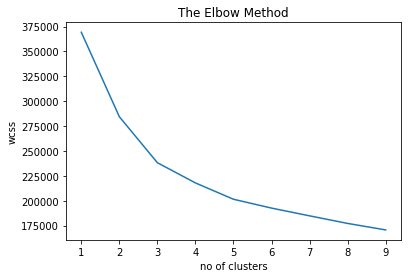

In [14]:
import pickle
nav=data.drop(['OEM Model','DSN','map_confidence'],axis=1)
ss = MinMaxScaler()
nav=ss.fit_transform(nav.fillna(0))
wcss=[]

filename = 'minmax_nav_new_month.sav'
pickle.dump(ss, open(filename, 'wb'))

for i in range(1,10):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(nav)
        wcss.append(kmeans.inertia_)
    #Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [271]:
data.columns

Index(['OEM Model', 'DSN', 'meanruntime', 'stdruntime', '75%runtime',
       'maxruntime', 'meantime to dock', 'stdtime to dock', '75%time to dock',
       'maxtime to dock', 'meanpause time', 'stdpause time', '75%pause time',
       'maxpause time', 'delmap', 'map_confidence', 'dock_no', 'pause_no',
       'jobs', 'successrate', 'totalrun', 'totaldock', 'totalpause', 'rate_1',
       'rate_5', 'rate_15', 'Contacted Charging Dock', 'Entered Paused Mode',
       'meanpauseafterdock', 'stdpauseafterdock', '75%pauseafterdock',
       'maxpauseafterdock', 'meanpausebeforedock', 'stdpausebeforedock',
       '75%pausebeforedock', 'maxpausebeforedock', 'count_real', 'mean_real',
       'std_real', '75%_real', 'count_shortruns', 'mean_shortruns',
       'std_shortruns', '75%_shortruns', 'time_to_clear_error', 'sum_error',
       'totalrun_real', 'totalshortrun', 'weekday_per', 'weekend_per',
       'pause_per', 'dock_per', 'real_per', 'shortrun_per', 'short/real',
       'error_per'],
      dt

In [52]:
# data[['meanpause time', 
#        '75%pause time', 'maxpause time',  'successrate',
#        'meanerrorafterdockpauseafterdock', 
#        'maxerrorafterdockpauseafterdock', 'meanerrorbeforedockpausebeforedock',
       
#        'maxerrorbeforedockpausebeforedock', 'pause_per', 'totalpause', 'sum_error']]=data[['meanpause time', 
#        '75%pause time', 'maxpause time',  'successrate',
#        'meanerrorafterdockpauseafterdock', 
#        'maxerrorafterdockpauseafterdock', 'meanerrorbeforedockpausebeforedock',
       
#        'maxerrorbeforedockpausebeforedock', 'pause_per', 'totalpause', 'sum_error']]*1.5

In [53]:
# data['sum_error']=data['sum_error']*1.5
# data['pause_per']=data['pause_per']*1.5

[0.3054817  0.16420476 0.11855151 0.05824741 0.04297354 0.03856299
 0.03745811 0.02937399 0.02862866 0.02670627 0.02361266 0.01640085
 0.01487026 0.01026449 0.01011698 0.00836036 0.0082283  0.00695501
 0.00583402 0.00531177]


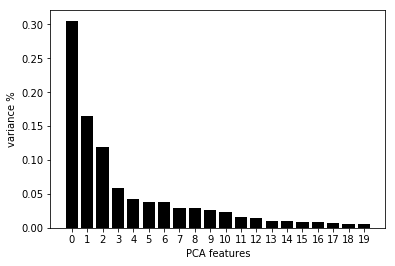

In [15]:
from sklearn.decomposition import PCA
pca_nav = PCA(n_components=20)
principalComponents_nav = pca_nav.fit_transform(nav)

filename = 'pca_nav_new_month.sav'
pickle.dump(pca_nav, open(filename, 'wb'))


# Plot the explained variances
features = range(pca_nav.n_components_)
plt.bar(features, pca_nav.explained_variance_ratio_, color='black')
print(pca_nav.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components_nav = pd.DataFrame(principalComponents_nav)




Text(0, 0.5, 'PCA 3')

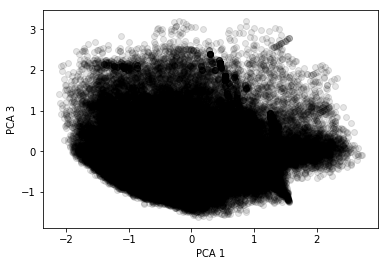

In [273]:
plt.scatter(PCA_components_nav[1], PCA_components_nav[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

Text(0, 0.5, 'PCA 3')

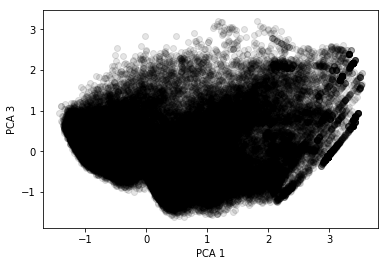

In [274]:
plt.scatter(PCA_components_nav[0], PCA_components_nav[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

Text(0, 0.5, 'PCA 3')

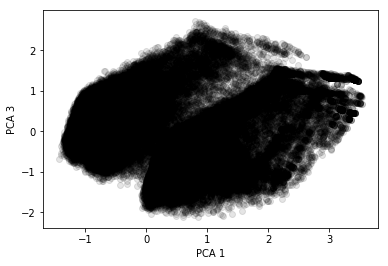

In [275]:
plt.scatter(PCA_components_nav[0], PCA_components_nav[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

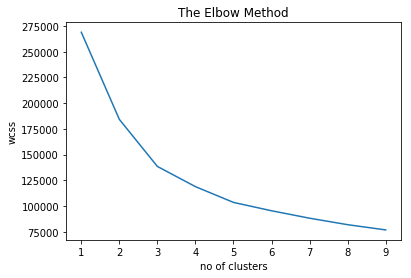

In [16]:
wcss=[]
for i in range(1,10):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(PCA_components_nav.iloc[:,:6])
        wcss.append(kmeans.inertia_)
    #Visualizing the ELBOW method to get the optimal value of K 
    
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true

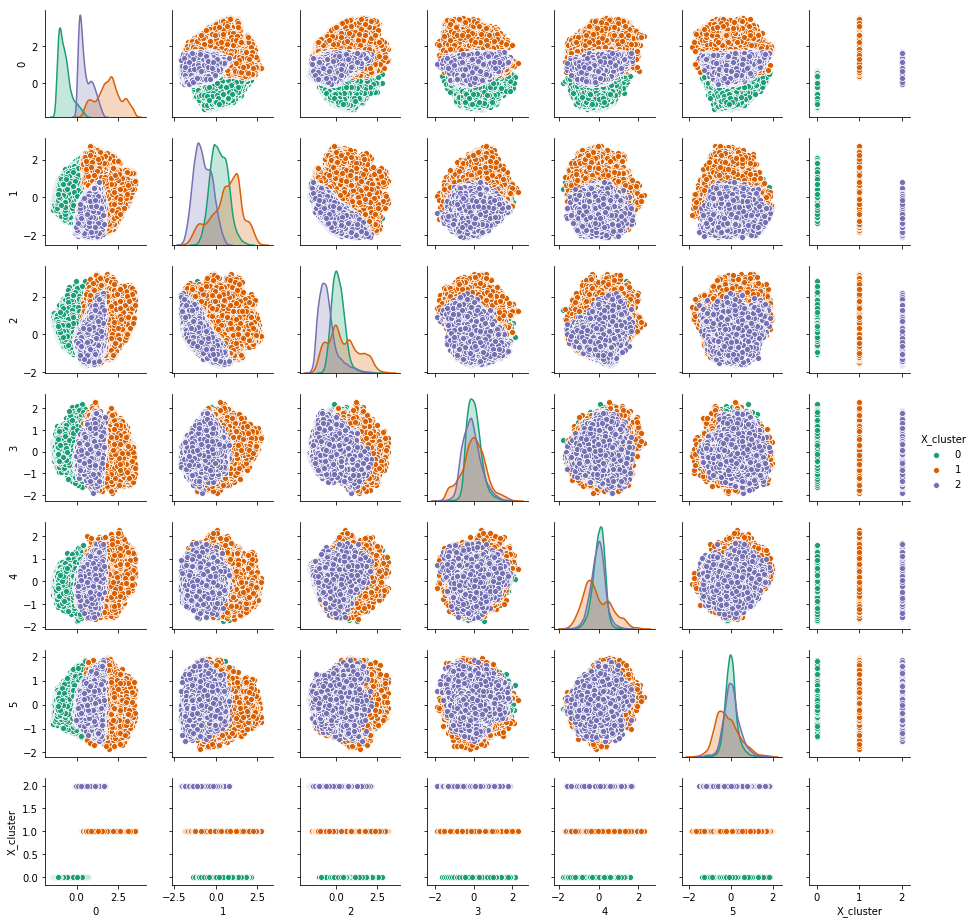

In [17]:
import seaborn as sns
X_nav=PCA_components_nav.iloc[:,:6]
kmeansmodel_nav = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans_nav= kmeansmodel_nav.fit_predict(X_nav)
X_nav['X_cluster']=y_kmeans_nav
sns.pairplot(X_nav, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [18]:
X_nav['X_cluster'].value_counts()/len(X_nav)

0    0.587156
2    0.278808
1    0.134036
Name: X_cluster, dtype: float64

In [19]:
X_nav['X_cluster'].value_counts()

0    60982
2    28957
1    13921
Name: X_cluster, dtype: int64


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The `size` parameter has been renamed to `height`; pleaes update your code.
invalid value encountered in true_divide
invalid value encountered in double_scalars


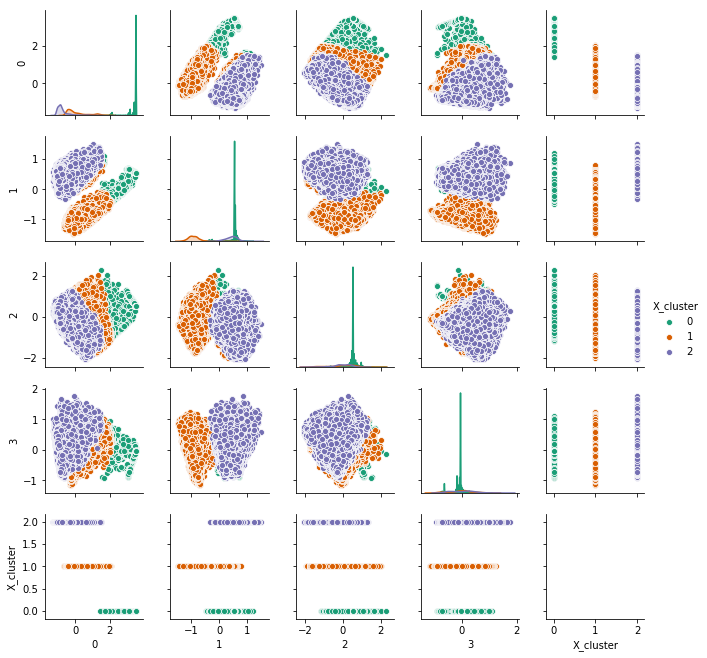

In [558]:
# import seaborn as sns
# X_nav=PCA_components_nav.iloc[:,:4]
# kmeansmodel_nav = KMeans(n_clusters= 3, init='k-means++', random_state=0)
# y_kmeans_nav= kmeansmodel_nav.fit_predict(X_nav)
# X_nav['X_cluster']=y_kmeans_nav
# sns.pairplot(X_nav, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [20]:
import pickle
filename = 'kmeans_nav_new_month.sav'
pickle.dump(kmeansmodel_nav, open(filename, 'wb'))

In [735]:
test=pd.read_csv('test_month.csv')

In [736]:
test[skewlist] = sigmoid(test[skewlist])

In [737]:
nav_test=test[cols].drop(['DSN','OEM Model','map_confidence'],axis=1).fillna(0)

nav_test=ss.transform(nav_test)

principalComponents_nav_test = pca_nav.transform(nav_test)

PCA_components_nav_test = pd.DataFrame(principalComponents_nav_test)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The `size` parameter has been renamed to `height`; pleaes update your code.
invalid value encountered in true_divide
invalid value encountered in double_scalars


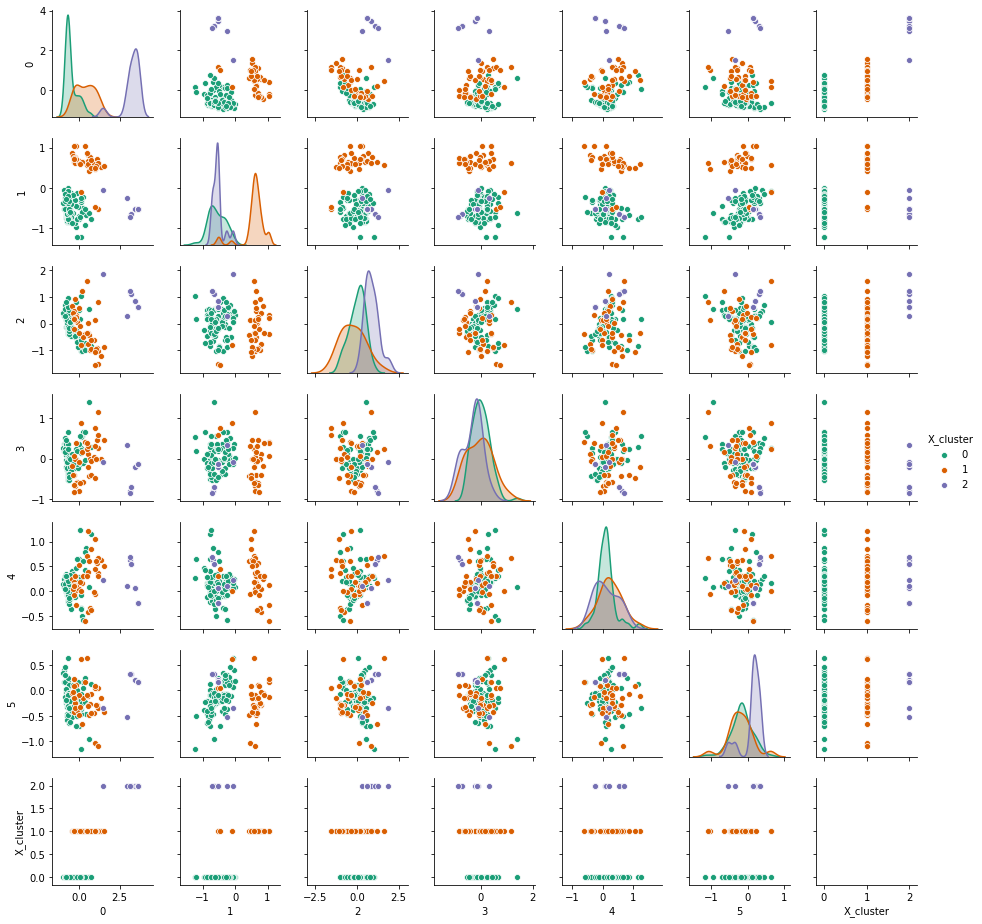

In [739]:
X_nav_test=PCA_components_nav_test.iloc[:,:6]
y_kmeans_nav_test= kmeansmodel_nav.predict(X_nav_test)
X_nav_test['X_cluster']=y_kmeans_nav_test
sns.pairplot(X_nav_test, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [740]:
X_nav_test['X_cluster'].value_counts()/len(X_nav_test)

0    0.640845
1    0.267606
2    0.091549
Name: X_cluster, dtype: float64

In [568]:
data2=X_nav[X_nav['X_cluster']==2]

In [569]:
test2=X_nav_test[X_nav_test['X_cluster']==2]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The `size` parameter has been renamed to `height`; pleaes update your code.
invalid value encountered in true_divide
invalid value encountered in double_scalars


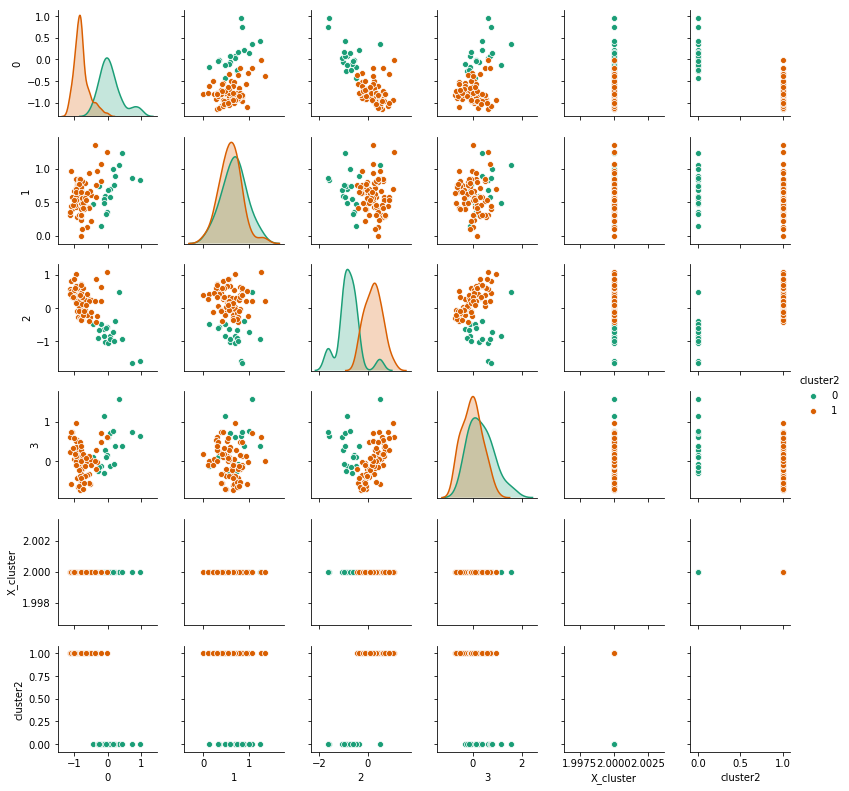

In [574]:
y_kmeans2_nav= kmeansmodel2_nav.predict(test2.iloc[:,:4])
test2['cluster2']=y_kmeans2_nav
sns.pairplot(test2, hue='cluster2', palette= 'Dark2', diag_kind='kde',size=1.85)

In [575]:
test2['cluster2'].value_counts()

1    75
0    19
Name: cluster2, dtype: int64

In [572]:
76/145

0.5241379310344828

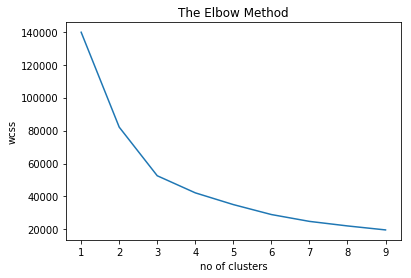

In [424]:
wcss=[]
for i in range(1,10):
        kmeans2 = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans2.fit(data2.iloc[:,:4])
        wcss.append(kmeans2.inertia_)
    #Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The `size` parameter has been renamed to `height`; pleaes update your code.
invalid value encountered in true_divide
invalid value encountered in double_scalars


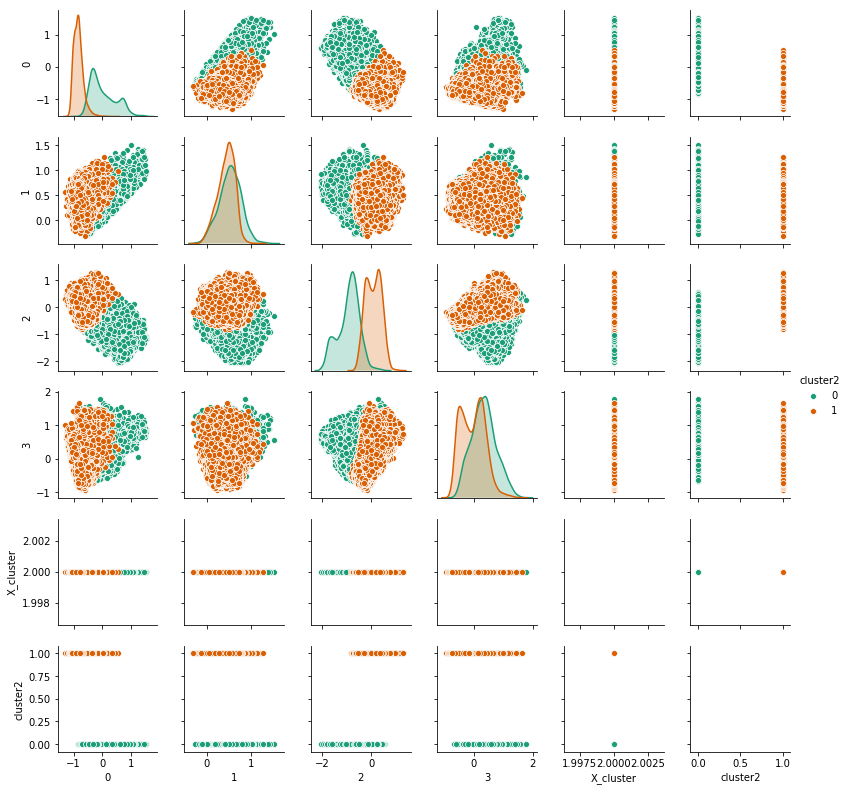

In [573]:
import seaborn as sns
#X_nav=PCA_components_nav.iloc[:,:4]
kmeansmodel2_nav = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans2_nav= kmeansmodel2_nav.fit_predict(data2.iloc[:,:4])

data2['cluster2']=y_kmeans2_nav

sns.pairplot(data2, hue='cluster2', palette= 'Dark2', diag_kind='kde',size=1.85)


In [432]:
train[cols][X_nav['X_cluster']!=2].shape

Boolean Series key will be reindexed to match DataFrame index.


(102267, 36)

In [433]:
data2['cluster2'].shape

(102336,)

In [281]:
model = XGBClassifier(max_depth= 3, eta= 1, learning_rate= 0.01,n_estimators=100)

model.fit(data.fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1),y_kmeans_nav)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data.fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

#predict_test = model.predict(test[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))
predict_train = model.predict(data.fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

#print(accuracy_score(train[X_nav['X_cluster']!=2]['target'],predict_train))
#print(accuracy_score(y_test_nav,predict_test))

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


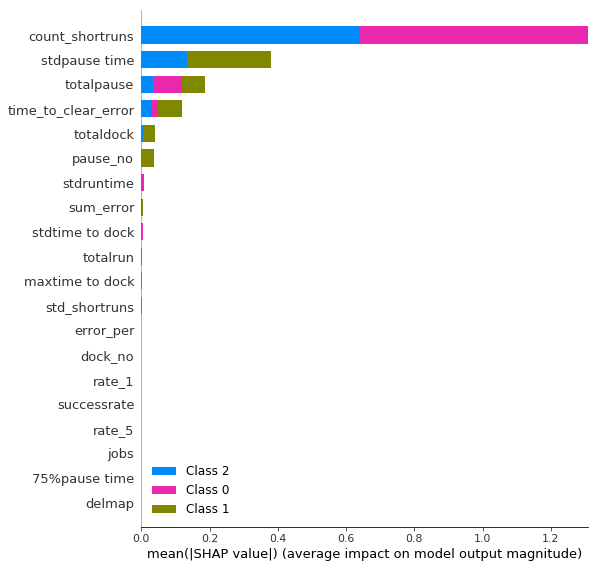

In [283]:
shap.summary_plot(shap_values, data.fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [ ]:
more shortruns, more pause

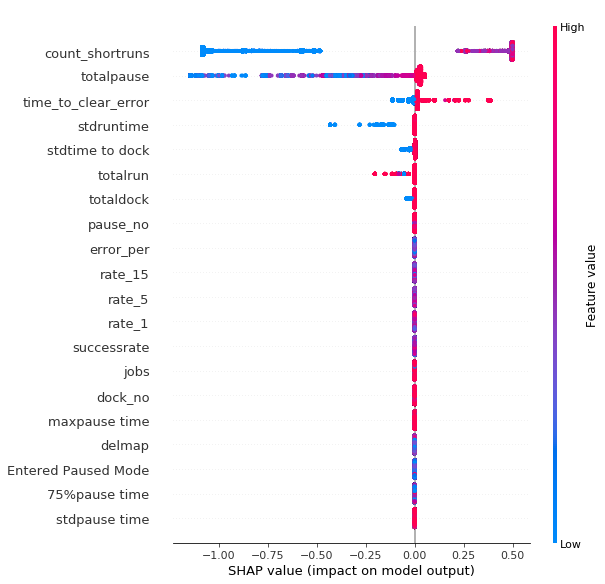

In [287]:
shap.summary_plot(shap_values[0], data.fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [ ]:
less pause, less error

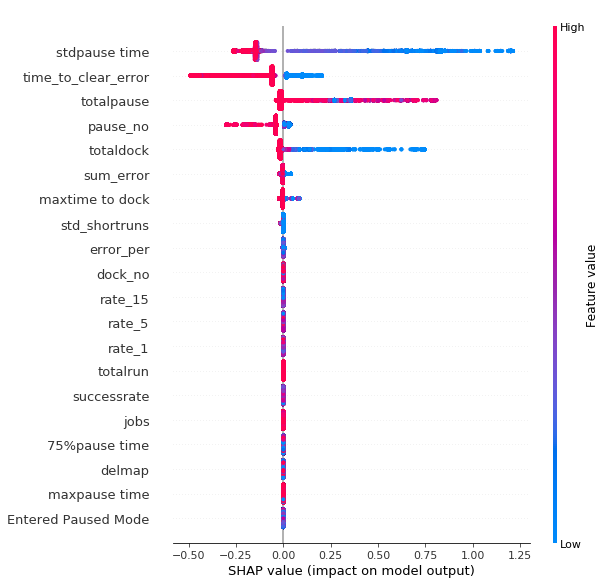

In [285]:
shap.summary_plot(shap_values[1], data.fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [ ]:
less shortruns, more pause

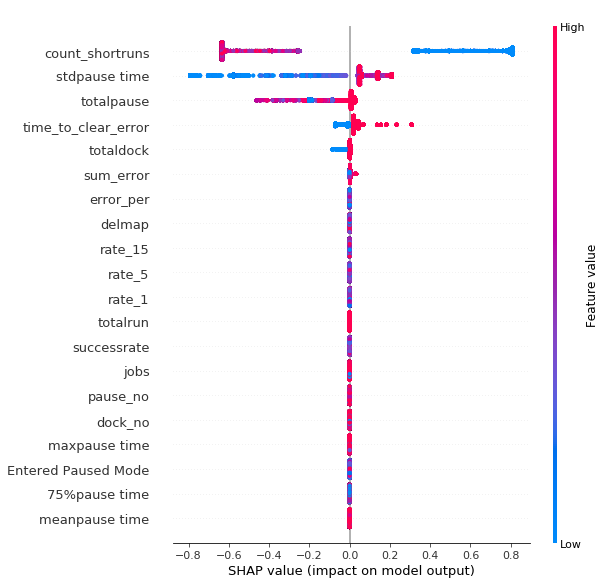

In [286]:
shap.summary_plot(shap_values[2], data.fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [439]:
data2['cluster2'].value_counts()

0    60021
2    30467
1    11848
Name: cluster2, dtype: int64

In [467]:
data2['cluster2'].value_counts()

0    54642
1     9610
Name: cluster2, dtype: int64

In [468]:
54/111

0.4864864864864865

In [20]:
test=pd.read_csv('test_month.csv')
validate=pd.read_csv('test_month.csv')[80:]
train=pd.read_csv('train_month.csv')

In [22]:
badlist=list(test['DSN'].unique())
badlist.append(list(validate['DSN'].unique()))

In [23]:
train.columns

Index(['OEM Model', 'DSN', 'sum', 'count', 'map_confidence', 'delmap',
       'charge_cycle', 'mean_real', 'std_real', '75%_real', 'max_real',
       'mean_shortruns', 'std_shortruns', '75%_shortruns', 'max_shortruns',
       'time_to_clear_error', 'sum_error', 'meanruntime', 'stdruntime',
       '75%runtime', 'maxruntime', 'meantime to dock', 'stdtime to dock',
       '75%time to dock', 'maxtime to dock', 'meanpause time', 'stdpause time',
       '75%pause time', 'maxpause time', 'jobs', 'successrate',
       'meanerrorafterdockpauseafterdock', 'stderrorafterdockpauseafterdock',
       'maxerrorafterdockpauseafterdock', 'meanerrorbeforedockpausebeforedock',
       'stderrorbeforedockpausebeforedock',
       'maxerrorbeforedockpausebeforedock', 'Contacted Charging Dock',
       'Entered Paused Mode', 'pause_per', 'dock_per', 'real_per',
       'shortrun_per', 'short/real', 'totalrun_real', 'totalshortrun',
       'totalrun', 'totaldock', 'totalpause', 'weekday_per', 'weekend_per',
    

In [24]:
#train=train[(z < 3).all(axis=1)].fillna(0)
test=test.fillna(0)
validate=validate.fillna(0)
# train[skewlist] = sigmoid(train[skewlist])
# test[skewlist] = sigmoid(test[skewlist])
# validate[skewlist] = sigmoid(validate[skewlist])

In [67]:
train=data

In [68]:
train['target']=y_kmeans_nav

In [26]:
train=train[train['DSN'].isin(badlist)==False]

In [27]:
train.shape

(111701, 55)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# train_nav, test_nav, y_train_nav, y_test_nav = train_test_split(
#     data,y_kmeans_nav , test_size=0.20, random_state=None)


# Vectorizer / regressor pipeline that filters out tokens that are too rare or too frequent

# train_rad, test_rad, y_train_rad, y_test_rad = train_test_split(
#     random,y_kmeans_rad , test_size=0.20, random_state=None)

In [71]:
rf=RandomForestClassifier(max_depth= 3, n_estimators=200,max_features='sqrt')
rf.fit(train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1),train['target'])

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

#predict_test = rf.predict(test[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))
predict_train = rf.predict(train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

print(accuracy_score(train['target'],predict_train))
#print(accuracy_score(y_test_nav,predict_test))

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


0.9825341806277681


In [596]:
sum(predict_test==1)/len(predict_test)

0.6267605633802817

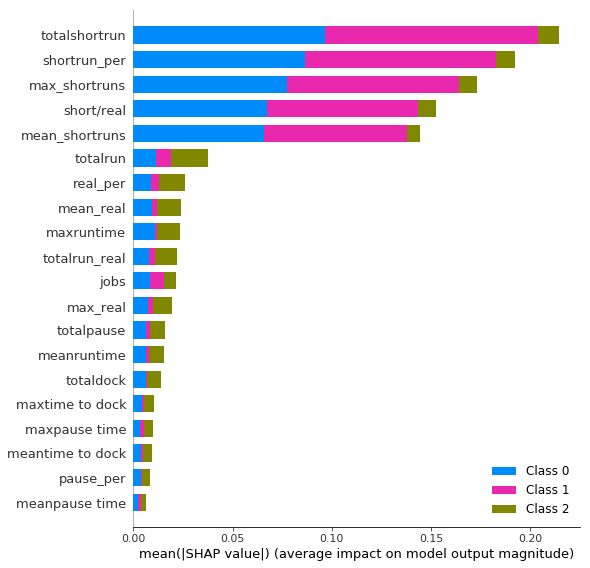

In [453]:
shap.summary_plot(shap_values, train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

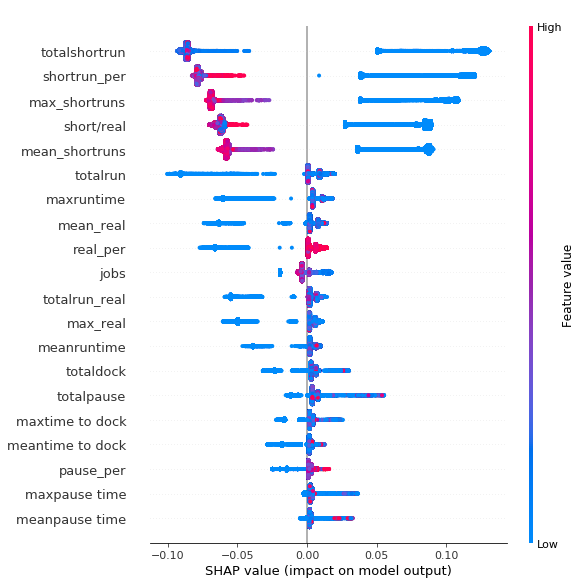

In [454]:
shap.summary_plot(shap_values[0], train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

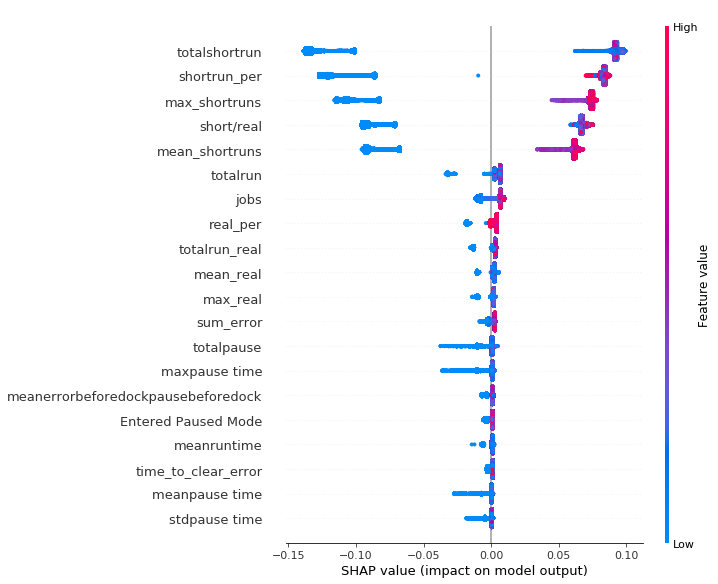

In [455]:
shap.summary_plot(shap_values[1], train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

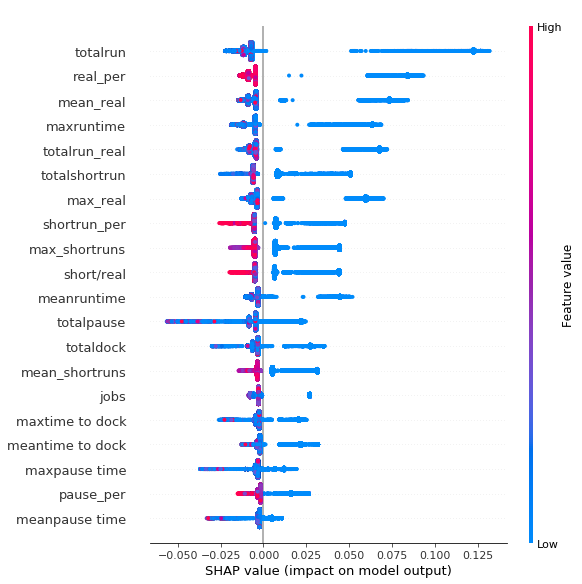

In [456]:
shap.summary_plot(shap_values[2], train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [599]:
# model = XGBClassifier(max_depth= 3, eta= 1, learning_rate= 0.01,n_estimators=200)

# model.fit(train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1),train['target'])

# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

# predict_test = model.predict(test[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))
# predict_train = model.predict(data[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

# print(accuracy_score(y_kmeans_nav,predict_train))
# #print(accuracy_score(y_test_nav,predict_test))

0.9948536506915406


1. error related feature a larger weight
2. different threshold

In [763]:
shap_values = explainer.shap_values(test[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))



In [752]:
test[predict_test==1]

OEM Model              DSN       sum     count  map_confidence  delmap  \
0           0  AC000W008128921  0.622459  0.817574             NaN     0.5   
2           0  AC000W008129582  0.622459  0.817574            -1.0     0.5   
6           0  AC000W008136541  0.622459  0.731059             NaN     0.5   
7           0  AC000W008137212  0.880797  0.731059             NaN     0.5   
10          0  AC000W008140665  0.500000  0.880797             NaN     0.5   
11          0  AC000W008141580  0.924142  0.817574            -1.0     0.5   
19          0  AC000W008186082  0.500000  0.500000             NaN     0.5   
22          0  AC000W008190301  0.731059  0.880797             NaN     0.5   
26          0  AC000W008191923  0.731059  0.880797             NaN     0.5   
34          0  AC000W008216434  0.777300  0.777300             NaN     0.5   
38          0  AC000W008235242  0.791391  0.990684            35.0     0.5   
39          0  AC000W008241414  0.817574  0.817574            33.0     0.5   
40          0  AC000W008244446  0.500000  0.880797            -1.0     0.5   
43          0  AC000W008250040  0.731059  0.841131             NaN     0.5   
48          0  AC000W008285000  0.731059  0.880797            -1.0     0.5   
61          0  AC000W008310869  0.622459  0.817574             NaN     0.5   
62          0  AC000W008311693  0.731059  0.911600             NaN     0.5   
68          0  AC000W008341279  0.622459  0.952574             8.0     0.5   
69          0  AC000W008341628  0.731059  0.851953             NaN     0.5   
70          0  AC000W008342339  0.731059  0.880797             NaN     0.5   
71          0  AC000W008342634  0.731059  0.731059             NaN     0.5   
75          0  AC000W008343379  0.622459  0.731059             NaN     0.5   
79          0  AC000W008356715  0.880797  0.880797            -1.0     0.5   
87          0  AC000W008361606  0.731059  0.731059             7.0     0.5   
88          0  AC000W008364359  0.500000  0.500000             NaN     0.5   
90          0  AC000W008369879  0.622459  0.952574             NaN     0.5   
92          0  AC000W008602177  0.500000  0.880797             NaN     0.5   
100         0  AC000W008708162  0.500000  0.731059            -1.0     0.5   
102         0  AC000W008709081  0.500000  0.952574             NaN     0.5   
111         0  AC000W008779874  0.731059  0.798187            27.0     0.5   
112         0  AC000W008781950  0.500000  0.500000             7.0     0.5   
119         0  AC000W008791727  0.500000  0.731059             6.0     0.5   
127         0  AC000W008797817  0.731059  0.731059            54.0     0.5   
128         0  AC000W008797820  0.791391  0.841131             NaN     0.5   
134         0  AC000W008799146  0.731059  0.880797            -1.0     0.5   
139         0  AC000W008824713  0.622459  0.817574             NaN     0.5   

     charge_cycle  mean_real  std_real  75%_real  ...  totalrun_real  \
0        0.952574        1.0  0.999994       1.0  ...            1.0   
2        0.880797        1.0  0.999151       1.0  ...            1.0   
6        0.952574        1.0  1.000000       1.0  ...            1.0   
7        0.993307        1.0  0.999994       1.0  ...            1.0   
10       0.731059        1.0  0.892958       1.0  ...            1.0   
11       0.999665        1.0  0.999508       1.0  ...            1.0   
19       0.731059        0.5  0.500000       0.5  ...            0.5   
22       0.952574        1.0  1.000000       1.0  ...            1.0   
26       0.880797        1.0  0.500000       1.0  ...            1.0   
34       0.993307        1.0  1.000000       1.0  ...            1.0   
38       0.999089        1.0  1.000000       1.0  ...            1.0   
39       0.731059        1.0  0.999997       1.0  ...            1.0   
40       0.731059        1.0  0.500000       1.0  ...            1.0   
43       0.982014        1.0  1.000000       1.0  ...            1.0   
48       0.880797        1.0  1.00000

In [766]:
sum(predict_test==1),sum(predict_test==0),sum(predict_test==2)

(38, 91, 13)

In [774]:
for i in range(38):
    print(test[cols][predict_test==1].iloc[i])
    print('success')
    display(shap.force_plot(explainer.expected_value[1], shap_values[1][predict_test==1][i], test[cols][predict_test==1].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1).iloc[i]))
#     print('failed')

#     display(shap.force_plot(explainer.expected_value[2], shap_values[2][predict_test==1][i], test[cols][predict_test==1].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1).iloc[i]))
    display(shap.force_plot(explainer.expected_value[1], shap_values[1][predict_test==1][i], test[cols][predict_test==1].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1).iloc[i],link='logit'))
#


OEM Model                                           0
DSN                                   AC000W008128921
map_confidence                                      0
delmap                                              0
mean_real                                          30
max_real                                           46
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                        24
maxruntime                                         46
meantime to dock                              3.70556
maxtime to dock                               11.1167
meanpause time                               0.736667
stdpause time                                 1.38476
75%pause time                                     0.5
maxpause time                                 3.18333
jobs                        

OEM Model                                           0
DSN                                   AC000W008129582
map_confidence                                     -1
delmap                                              0
mean_real                                          34
max_real                                           39
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                     18.25
maxruntime                                         39
meantime to dock                              1.64444
maxtime to dock                               2.23333
meanpause time                                1.45417
stdpause time                                 2.15705
75%pause time                                 2.07917
maxpause time                                 4.56667
jobs                        

OEM Model                                           0
DSN                                   AC000W008136541
map_confidence                                      0
delmap                                              0
mean_real                                       163.5
max_real                                          556
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           3
meanruntime                                     163.5
maxruntime                                        556
meantime to dock                                2.425
maxtime to dock                               3.33333
meanpause time                                139.296
stdpause time                                 275.976
75%pause time                                  141.25
maxpause time                                  553.25
jobs                        

OEM Model                                           0
DSN                                   AC000W008137212
map_confidence                                      0
delmap                                              0
mean_real                                      35.625
max_real                                           61
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                   31.7778
maxruntime                                         61
meantime to dock                              3.36333
maxtime to dock                                  5.85
meanpause time                               0.396296
stdpause time                                0.994212
75%pause time                                       0
maxpause time                                       3
jobs                        

OEM Model                                           0
DSN                                   AC000W008140665
map_confidence                                      0
delmap                                              0
mean_real                                        58.5
max_real                                           60
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                        60
maxruntime                                         60
meantime to dock                              8.28333
maxtime to dock                               8.28333
meanpause time                               0.166667
stdpause time                                0.235702
75%pause time                                    0.25
maxpause time                                0.333333
jobs                        

OEM Model                                           0
DSN                                   AC000W008141580
map_confidence                                     -1
delmap                                              0
mean_real                                     33.7692
max_real                                           54
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                             71.35
sum_error                                           1
meanruntime                                   31.3571
maxruntime                                         54
meantime to dock                              9.25625
maxtime to dock                               48.1667
meanpause time                               0.482143
stdpause time                                 1.05104
75%pause time                               0.0583333
maxpause time                                 3.08333
jobs                        

OEM Model                                           0
DSN                                   AC000W008186082
map_confidence                                      0
delmap                                              0
mean_real                                           0
max_real                                            0
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                             27.05
sum_error                                          11
meanruntime                                         5
maxruntime                                          5
meantime to dock                                 28.1
maxtime to dock                                  28.1
meanpause time                                  11.05
stdpause time                                       0
75%pause time                                   11.05
maxpause time                                   11.05
jobs                        

OEM Model                                           0
DSN                                   AC000W008190301
map_confidence                                      0
delmap                                              0
mean_real                                     34.8333
max_real                                           57
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                        19
maxruntime                                         57
meantime to dock                              5.64583
maxtime to dock                               17.0667
meanpause time                              0.0606061
stdpause time                                0.164194
75%pause time                               0.0166667
maxpause time                                    0.55
jobs                        

OEM Model                                      RV1000
DSN                                   AC000W008191627
map_confidence                                      0
delmap                                              0
mean_real                                       22.75
max_real                                           31
mean_shortruns                                     13
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                   15.3333
maxruntime                                         31
meantime to dock                              1.00417
maxtime to dock                                   2.4
meanpause time                                      0
stdpause time                                       0
75%pause time                                       0
maxpause time                                       0
jobs                        

OEM Model                                           0
DSN                                   AC000W008191923
map_confidence                                      0
delmap                                              0
mean_real                                          60
max_real                                           60
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           3
meanruntime                                        13
maxruntime                                         60
meantime to dock                              6.91667
maxtime to dock                               6.91667
meanpause time                               0.506667
stdpause time                                0.694682
75%pause time                                 1.21667
maxpause time                                 1.31667
jobs                        

OEM Model                                           0
DSN                                   AC000W008216434
map_confidence                                      0
delmap                                              0
mean_real                                     78.3333
max_real                                          144
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           2936.97
sum_error                                           7
meanruntime                                   67.4286
maxruntime                                        144
meantime to dock                              9.47917
maxtime to dock                                  22.8
meanpause time                                17.5143
stdpause time                                 32.4045
75%pause time                                 19.0417
maxpause time                                 84.4333
jobs                        

OEM Model                                      RV1000
DSN                                   AC000W008234957
map_confidence                                     -1
delmap                                              0
mean_real                                          22
max_real                                           29
mean_shortruns                                     15
std_shortruns                                       0
time_to_clear_error                           63.8667
sum_error                                           1
meanruntime                                        22
maxruntime                                         29
meantime to dock                                  1.7
maxtime to dock                                   1.7
meanpause time                                  0.025
stdpause time                               0.0353553
75%pause time                                  0.0375
maxpause time                                    0.05
jobs                        

OEM Model                                           0
DSN                                   AC000W008235242
map_confidence                                     35
delmap                                              0
mean_real                                     33.6471
max_real                                           98
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           161.579
sum_error                                          13
meanruntime                                   21.3704
maxruntime                                         98
meantime to dock                              27.4667
maxtime to dock                               248.833
meanpause time                                6.79444
stdpause time                                  23.933
75%pause time                                0.791667
maxpause time                                 119.867
jobs                        

OEM Model                                           0
DSN                                   AC000W008241414
map_confidence                                     33
delmap                                              0
mean_real                                          39
max_real                                           61
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           25.5333
sum_error                                           2
meanruntime                                        39
maxruntime                                         61
meantime to dock                              8.63333
maxtime to dock                               12.8167
meanpause time                                1.76944
stdpause time                                  4.0514
75%pause time                                  0.3375
maxpause time                                 10.0333
jobs                        

OEM Model                                           0
DSN                                   AC000W008244446
map_confidence                                     -1
delmap                                              0
mean_real                                          39
max_real                                           39
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           100.983
sum_error                                           3
meanruntime                                        10
maxruntime                                         39
meantime to dock                              3.78333
maxtime to dock                               3.78333
meanpause time                                2.85833
stdpause time                                 4.89053
75%pause time                                 3.29167
maxpause time                                 10.1667
jobs                        

OEM Model                                           0
DSN                                   AC000W008250040
map_confidence                                      0
delmap                                              0
mean_real                                     42.2857
max_real                                           67
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           2
meanruntime                                      29.9
maxruntime                                         67
meantime to dock                               0.0875
maxtime to dock                                  0.35
meanpause time                                  0.515
stdpause time                                 1.08056
75%pause time                                0.479167
maxpause time                                 3.41667
jobs                        

OEM Model                                           0
DSN                                   AC000W008285000
map_confidence                                     -1
delmap                                              0
mean_real                                     36.2857
max_real                                           99
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           769.133
sum_error                                           4
meanruntime                                     31.75
maxruntime                                         99
meantime to dock                              1.48333
maxtime to dock                               2.96667
meanpause time                                 1.2875
stdpause time                                 1.54906
75%pause time                                 1.99167
maxpause time                                 4.18333
jobs                        

OEM Model                                           0
DSN                                   AC000W008310869
map_confidence                                      0
delmap                                              0
mean_real                                       45.75
max_real                                           77
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           118.492
sum_error                                           2
meanruntime                                     45.75
maxruntime                                         77
meantime to dock                              144.333
maxtime to dock                               218.433
meanpause time                                 0.1875
stdpause time                                0.290713
75%pause time                                0.241667
maxpause time                                0.616667
jobs                        

OEM Model                                           0
DSN                                   AC000W008311693
map_confidence                                      0
delmap                                              0
mean_real                                     83.0909
max_real                                          550
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                            369.85
sum_error                                           3
meanruntime                                   61.2667
maxruntime                                        550
meantime to dock                              30.7714
maxtime to dock                                 205.6
meanpause time                                36.2611
stdpause time                                 140.107
75%pause time                                     0.2
maxpause time                                 542.717
jobs                        

OEM Model                                           0
DSN                                   AC000W008341279
map_confidence                                      8
delmap                                              0
mean_real                                          32
max_real                                           42
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                             727.9
sum_error                                           2
meanruntime                                   18.6667
maxruntime                                         42
meantime to dock                               5.5625
maxtime to dock                                  24.5
meanpause time                               0.994444
stdpause time                                 2.84241
75%pause time                                       0
maxpause time                                 8.56667
jobs                        

OEM Model                                           0
DSN                                   AC000W008341628
map_confidence                                      0
delmap                                              0
mean_real                                        41.5
max_real                                           62
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           3265.95
sum_error                                           1
meanruntime                                   26.3125
maxruntime                                         62
meantime to dock                              1.86389
maxtime to dock                                   4.3
meanpause time                                 0.1375
stdpause time                                0.433098
75%pause time                               0.0208333
maxpause time                                 1.73333
jobs                        

OEM Model                                           0
DSN                                   AC000W008342339
map_confidence                                      0
delmap                                              0
mean_real                                          26
max_real                                           30
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           1
meanruntime                                      15.6
maxruntime                                         30
meantime to dock                             0.705556
maxtime to dock                               2.08333
meanpause time                               0.376667
stdpause time                                0.832967
75%pause time                               0.0166667
maxpause time                                 1.86667
jobs                        

OEM Model                                           0
DSN                                   AC000W008342634
map_confidence                                      0
delmap                                              0
mean_real                                          51
max_real                                           73
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           1
meanruntime                                        51
maxruntime                                         73
meantime to dock                              2.86667
maxtime to dock                               2.86667
meanpause time                                      0
stdpause time                                       0
75%pause time                                       0
maxpause time                                       0
jobs                        

OEM Model                                           0
DSN                                   AC000W008343379
map_confidence                                      0
delmap                                              0
mean_real                                        50.5
max_real                                           71
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                             72.45
sum_error                                           1
meanruntime                                        21
maxruntime                                         71
meantime to dock                              2.93333
maxtime to dock                                  5.55
meanpause time                                   0.17
stdpause time                                0.370885
75%pause time                               0.0166667
maxpause time                                0.833333
jobs                        

OEM Model                                           0
DSN                                   AC000W008356715
map_confidence                                     -1
delmap                                              0
mean_real                                        35.6
max_real                                           76
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                             34.55
sum_error                                           4
meanruntime                                   29.9167
maxruntime                                         76
meantime to dock                              7.91667
maxtime to dock                               35.1167
meanpause time                                4.86389
stdpause time                                 9.49173
75%pause time                                 3.00417
maxpause time                                   25.65
jobs                        

OEM Model                                           0
DSN                                   AC000W008361606
map_confidence                                      7
delmap                                              0
mean_real                                     28.3333
max_real                                           32
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                      25.9
maxruntime                                         32
meantime to dock                              2.23667
maxtime to dock                               6.91667
meanpause time                               0.346667
stdpause time                                 1.09626
75%pause time                                       0
maxpause time                                 3.46667
jobs                        

OEM Model                                           0
DSN                                   AC000W008364359
map_confidence                                      0
delmap                                              0
mean_real                                          70
max_real                                           70
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           2
meanruntime                                        70
maxruntime                                         70
meantime to dock                                    0
maxtime to dock                                     0
meanpause time                                   1.45
stdpause time                                       0
75%pause time                                    1.45
maxpause time                                    1.45
jobs                        

OEM Model                                           0
DSN                                   AC000W008369879
map_confidence                                      0
delmap                                              0
mean_real                                          38
max_real                                           64
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           2
meanruntime                                   29.7778
maxruntime                                         64
meantime to dock                                  3.2
maxtime to dock                                  6.75
meanpause time                              0.0666667
stdpause time                                0.136423
75%pause time                                       0
maxpause time                                0.366667
jobs                        

OEM Model                                           0
DSN                                   AC000W008602177
map_confidence                                      0
delmap                                              0
mean_real                                          29
max_real                                           29
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                      15.5
maxruntime                                         29
meantime to dock                              1.46667
maxtime to dock                               1.46667
meanpause time                              0.0666667
stdpause time                               0.0942809
75%pause time                                     0.1
maxpause time                                0.133333
jobs                        

OEM Model                                      RV1000
DSN                                   AC000W008701977
map_confidence                                     53
delmap                                              0
mean_real                                          24
max_real                                           30
mean_shortruns                                     13
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                        24
maxruntime                                         30
meantime to dock                                  2.3
maxtime to dock                               2.88333
meanpause time                                      0
stdpause time                                       0
75%pause time                                       0
maxpause time                                       0
jobs                        

OEM Model                                           0
DSN                                   AC000W008708162
map_confidence                                     -1
delmap                                              0
mean_real                                     29.4286
max_real                                           33
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                              15.5
sum_error                                           1
meanruntime                                   29.4286
maxruntime                                         33
meantime to dock                                 2.15
maxtime to dock                                   2.8
meanpause time                              0.0142857
stdpause time                               0.0377964
75%pause time                                       0
maxpause time                                     0.1
jobs                        

OEM Model                                           0
DSN                                   AC000W008709081
map_confidence                                      0
delmap                                              0
mean_real                                          34
max_real                                           34
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           9.19167
sum_error                                          11
meanruntime                                      5.25
maxruntime                                         34
meantime to dock                              2.33333
maxtime to dock                                  8.55
meanpause time                                2.23125
stdpause time                                 5.85203
75%pause time                                0.570833
maxpause time                                    16.7
jobs                        

OEM Model                                           0
DSN                                   AC000W008779874
map_confidence                                     27
delmap                                              0
mean_real                                      184.75
max_real                                         1374
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           236.792
sum_error                                           5
meanruntime                                   141.048
maxruntime                                       1374
meantime to dock                              70.5642
maxtime to dock                               618.217
meanpause time                                15.4095
stdpause time                                 68.1379
75%pause time                               0.0666667
maxpause time                                 312.717
jobs                        

OEM Model                                           0
DSN                                   AC000W008791727
map_confidence                                      6
delmap                                              0
mean_real                                       33.25
max_real                                           45
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           3.61667
sum_error                                           1
meanruntime                                     33.25
maxruntime                                         45
meantime to dock                              27.3333
maxtime to dock                               42.2667
meanpause time                                2.15417
stdpause time                                 2.65446
75%pause time                                 3.60417
maxpause time                                 5.56667
jobs                        

OEM Model                                           0
DSN                                   AC000W008797817
map_confidence                                     54
delmap                                              0
mean_real                                       418.5
max_real                                         1529
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           411.706
sum_error                                           5
meanruntime                                     335.2
maxruntime                                       1529
meantime to dock                           0.00833333
maxtime to dock                             0.0166667
meanpause time                                321.187
stdpause time                                  675.82
75%pause time                                    75.2
maxpause time                                 1528.75
jobs                        

OEM Model                                           0
DSN                                   AC000W008797820
map_confidence                                      0
delmap                                              0
mean_real                                       48.25
max_real                                          100
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                           151.633
sum_error                                           9
meanruntime                                   42.8889
maxruntime                                        100
meantime to dock                              34.9033
maxtime to dock                                 163.5
meanpause time                                30.3204
stdpause time                                 90.4552
75%pause time                                0.516667
maxpause time                                 271.533
jobs                        

OEM Model                                           0
DSN                                   AC000W008799146
map_confidence                                     -1
delmap                                              0
mean_real                                       26.25
max_real                                           30
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                             344.3
sum_error                                           2
meanruntime                                      21.4
maxruntime                                         30
meantime to dock                              1.80556
maxtime to dock                               2.56667
meanpause time                                    1.1
stdpause time                                 2.45967
75%pause time                                       0
maxpause time                                     5.5
jobs                        

OEM Model                                           0
DSN                                   AC000W008824713
map_confidence                                      0
delmap                                              0
mean_real                                          53
max_real                                           85
mean_shortruns                                      0
std_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           2
meanruntime                                        53
maxruntime                                         85
meantime to dock                              1.51111
maxtime to dock                                   2.6
meanpause time                               0.738889
stdpause time                                0.678301
75%pause time                                 1.10833
maxpause time                                 1.33333
jobs                        

In [768]:
for i in range(38):
    print(i)
    display(shap.force_plot(explainer.expected_value[2], shap_values[2][predict_test==1][i], test[cols][predict_test==1].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1).iloc[i]))
   



0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


In [610]:
print(test[predict_test==1].iloc[0])

shap.force_plot(explainer.expected_value[2], shap_values[1][predict_test==1][0], test[cols][predict_test==1].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1).iloc[0])

OEM Model                                           0
DSN                                   AC000W008128921
sum                                               0.5
count                                             1.5
map_confidence                                    NaN
delmap                                              0
charge_cycle                                        3
mean_real                                          30
std_real                                      12.0277
75%_real                                           34
max_real                                           46
mean_shortruns                                      0
std_shortruns                                       0
75%_shortruns                                       0
max_shortruns                                       0
time_to_clear_error                                 0
sum_error                                           0
meanruntime                                        24
stdruntime                  

In [593]:
sum(predict_test==0)/len(predict_test)

0.0

In [594]:
sum(predict_test==1)/len(predict_test)

0.6267605633802817

In [595]:
sum(predict_test==2)/len(predict_test)

0.3732394366197183

In [359]:
len(predict_test)

142

In [381]:
test['cluster']=predict_test

In [383]:
test['cluster']=test['cluster'].map({0:'success',1:'failed',2:'not often'})

In [388]:
sum(predict_test==1)/len(predict_test)

0.6619718309859155

In [384]:
test['cluster'].value_counts()

failed       94
success      35
not often    13
Name: cluster, dtype: int64

In [389]:
test[['DSN','cluster']].to_csv('returned_rv1000.csv',index=False)

In [360]:
predict_test

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1], dtype=int32)

In [364]:
predict_train_prob = model.predict_proba(train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))
predict_test_prob = model.predict_proba(test[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))


In [347]:
predict_train_prob[:,0].mean()

0.33930314

In [348]:
predict_train_prob[:,1].mean()

0.5355267

In [349]:
predict_train_prob[:,2].mean()

0.12517013

In [350]:
predict_test_prob[:,0].mean()

0.08735893

In [351]:
predict_test_prob[:,1].mean()

0.814782

In [352]:
predict_test_prob[:,2].mean()

0.09785902

In [353]:
sum(predict_train_prob.max(axis=1)>0.5)/len(predict_train_prob)

0.9980931236067716

In [354]:
sum(predict_test_prob.max(axis=1)>0.6)/len(predict_test_prob)

0.9014084507042254

In [92]:
predict_test_prob.max(axis=1)

array([0.88963646, 0.8804458 , 0.88963646, 0.8839666 , 0.8897861 ,
       0.89090884, 0.88963646, 0.88963646, 0.89090884, 0.89090884,
       0.87709695, 0.88963646, 0.8897861 , 0.8897861 , 0.8897861 ,
       0.8897861 , 0.8897861 , 0.8897861 , 0.88822335, 0.70429   ,
       0.8804458 , 0.8804458 , 0.88963646, 0.8897861 , 0.867419  ,
       0.8897861 , 0.885506  , 0.8576113 , 0.89090884, 0.8897861 ,
       0.8897861 , 0.8897861 , 0.8897861 , 0.8897861 , 0.88963646,
       0.8897861 , 0.8897861 , 0.86524516, 0.88963646, 0.88963646,
       0.885506  , 0.8897861 , 0.8897861 , 0.88963646, 0.8897861 ,
       0.8897861 , 0.8897861 , 0.88473463, 0.88963646, 0.89090884,
       0.8897861 , 0.8897861 , 0.8694303 , 0.8897861 , 0.8897861 ,
       0.8897861 , 0.8886174 , 0.8897861 , 0.8897861 , 0.8897861 ,
       0.8897861 , 0.88963646, 0.88963646, 0.8897861 , 0.8897861 ,
       0.8897861 , 0.85631776, 0.8897861 , 0.88963646, 0.88963646,
       0.88963646, 0.88963646, 0.8897861 , 0.8897861 , 0.88978

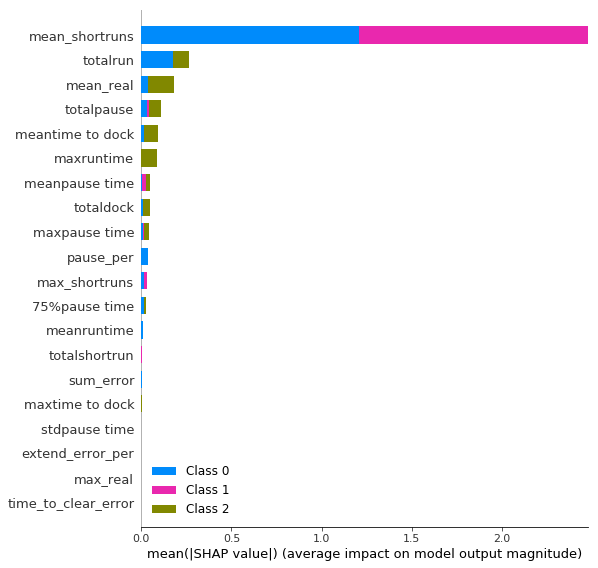

In [532]:
shap.summary_plot(shap_values, train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [533]:
#success

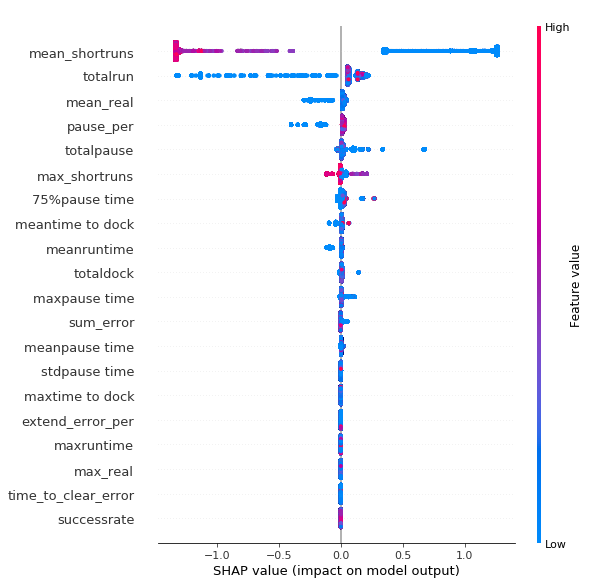

In [534]:
shap.summary_plot(shap_values[0], train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [535]:
#more shortruns, more pause, more error

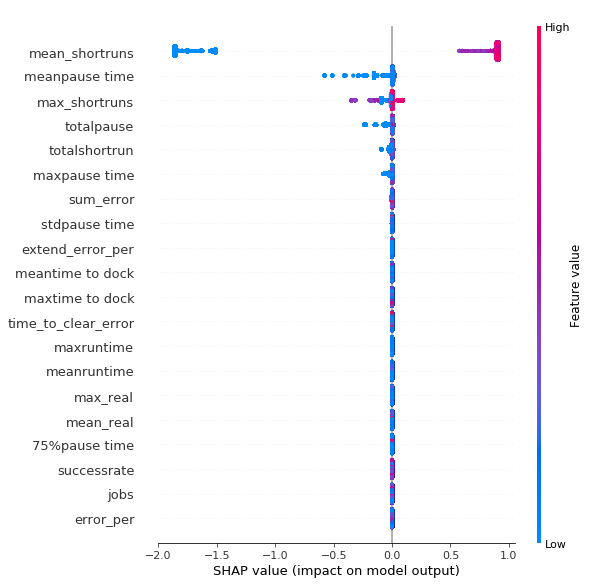

In [536]:
shap.summary_plot(shap_values[1], train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [537]:
#less real, low dock

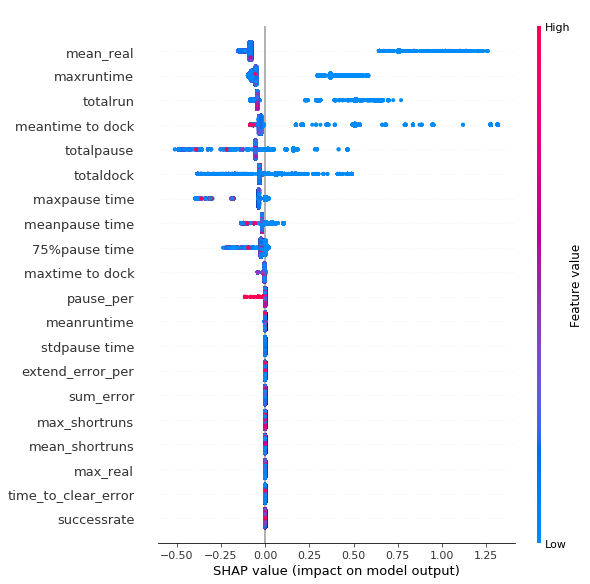

In [538]:
shap.summary_plot(shap_values[2], train[cols].fillna(0).drop(['OEM Model','DSN','map_confidence'],axis=1))

In [539]:
less shortruns, more pause, more error

FileNotFoundError: [Errno 2] No such file or directory: 'shortruns, more pause, more error'

In [ ]:
shap.summary_plot(shap_values[3], train.drop(['OEM Model','DSN','map_confidence','target'],axis=1))

In [863]:
predict_train_proba = model.predict_proba(train.drop(['OEM Model','DSN','map_confidence'],axis=1))


In [864]:
predict_train_proba

array([[0.05502938, 0.88970983, 0.05526076],
       [0.05522522, 0.05518329, 0.8895915 ],
       [0.06174293, 0.8631303 , 0.07512674],
       ...,
       [0.05522522, 0.05518329, 0.8895915 ],
       [0.05522522, 0.05518329, 0.8895915 ],
       [0.05789892, 0.05699076, 0.8851103 ]], dtype=float32)

In [370]:
result=pd.read_csv('train_month.csv').fillna(0)

In [371]:
#result=result[(z < 3).all(axis=1)]

In [372]:
result['cluster']=y_kmeans_nav

In [373]:
result['cluster'].value_counts()

1    64252
0    38084
2     9436
Name: cluster, dtype: int64

In [374]:
result['cluster'].value_counts()/len(result)

1    0.574849
0    0.340729
2    0.084422
Name: cluster, dtype: float64

In [106]:
list(test[predict_test==2]['DSN'])

['AC000W008128921',
 'AC000W008129582',
 'AC000W008136541',
 'AC000W008137212',
 'AC000W008140665',
 'AC000W008141580',
 'AC000W008186082',
 'AC000W008190301',
 'AC000W008191923',
 'AC000W008216434',
 'AC000W008235242',
 'AC000W008241414',
 'AC000W008244446',
 'AC000W008250040',
 'AC000W008285000',
 'AC000W008310869',
 'AC000W008311693',
 'AC000W008341279',
 'AC000W008341628',
 'AC000W008342339',
 'AC000W008342634',
 'AC000W008343379',
 'AC000W008356715',
 'AC000W008361606',
 'AC000W008364359',
 'AC000W008369879',
 'AC000W008602177',
 'AC000W008708162',
 'AC000W008709081',
 'AC000W008779874',
 'AC000W008791727',
 'AC000W008797817',
 'AC000W008797820',
 'AC000W008799146',
 'AC000W008824713']

In [376]:
result.fillna(0).groupby(['cluster'])[cols].mean().T

cluster                                       0            1           2
map_confidence                        44.439292    58.253300    3.963226
delmap                                 0.076935     0.175777    0.005405
mean_real                            338.054102   169.359373   27.415819
max_real                            1189.338331  1301.521213   32.460894
mean_shortruns                         0.041776    10.521732    0.061308
max_shortruns                          0.041934    11.954445    0.061573
time_to_clear_error                  916.026300   972.746647  245.592134
sum_error                              2.548078     5.674640    0.366151
meanruntime                          281.158206   138.436618   22.697920
maxruntime                          1187.989681  1301.513042   30.358627
meantime to dock                     323.605999   189.695491   19.121611
maxtime to dock                     1008.012906  1139.065390   19.621181
meanpause time                       210.898227   102.324188   15.323926
stdpause time                        317.607746   262.347137    4.030433
75%pause time                        199.231875    49.527148   16.434750
maxpause time                        856.277386   960.430785   19.431254
jobs                                   8.817272    21.166625    0.265155
successrate                            0.416778     0.370588    0.049167
meanerrorafterdockpauseafterdock       0.797268     0.594676    0.073170
meanerrorbeforedockpausebeforedock     0.288254     0.341272    0.037131
Contacted Charging Dock                0.579363     0.505085    0.055998
Entered Paused Mode                    0.237410     0.299187    0.046678
pause_per                              0.551338     0.468679    0.038050
dock_per                               0.493401     0.448463    0.045170
real_per                               0.832354     0.819006    0.058123
shortrun_per                           0.001654     0.166516    0.004564
short/real                             0.001821     0.212373    0.005797
totalrun_real                       1752.269772  2435.490459   35.323442
totalshortrun                          0.043903    29.343974    0.062209
totalrun                            1753.001680  2440.386634   33.687368
totaldock                           1280.234960  1711.053533   19.627505
totalpause                          1075.097233  1453.079336   19.434314
error_per                              0.384977     0.301107    0.057610
extend_error_per                       1.325400     0.640724    0.374320

In [403]:
internal2=pd.read_csv('./Downloads/Sharkninja+Internal+DSN.csv')

In [391]:
internal[internal['OEM Model'].isin(['RV1000','RV1000A'])]

UserEmail                                  UUID  \
0                 akumar@sharkninja.com  034859c0-fcd0-11e9-bf86-0eeeac4e5622   
2               grichter@sharkninja.com  03bcfac0-7328-11e7-88af-0e9382159dc5   
3               bmuldoon@sharkninja.com  04726268-8531-11e8-8178-0ab3f06930bb   
15              bmuldoon@sharkninja.com  04726268-8531-11e8-8178-0ab3f06930bb   
114   sharkiotind+smoketestmd@gmail.com  04a9fb12-5d05-11ea-af6b-0a580ae90507   
...                                 ...                                   ...   
1352                  2290639816@qq.com  ff7381cc-ff7b-11e9-aeeb-0eeeac4e5622   
1353                  2290639816@qq.com  ff7381cc-ff7b-11e9-aeeb-0eeeac4e5622   
1354                  2290639816@qq.com  ff7381cc-ff7b-11e9-aeeb-0eeeac4e5622   
1355                  2290639816@qq.com  ff7381cc-ff7b-11e9-aeeb-0eeeac4e5622   
1356                  2290639816@qq.com  ff7381cc-ff7b-11e9-aeeb-0eeeac4e5622   

                  DSN OEM Model  
0     AC000W008714127   RV1000A  
2     AC000W008699125   RV1000A  
3     AC000W008687166    RV1000  
15    AC000W007825682    RV1000  
114   AC000W008708314   RV1000A  
...               ...       ...  
1352  AC000W008096195   RV1000A  
1353  AC000W008096197   RV1000A  
1354  AC000W008096198   RV1000A  
1355  AC000W008228116   RV1000A  
1356  AC000W008368885   RV1000A  

[697 rows x 4 columns]

In [395]:
internal.shape

(1357, 4)

In [393]:
result[result['DSN'].isin(internal['DSN'])]['cluster'].value_counts()

2    95
0    84
1    81
Name: cluster, dtype: int64

In [414]:
result[result['DSN'].isin(internal['DSN'])]['cluster'].value_counts()/len(result[result['DSN'].isin(internal['DSN'])])

2    0.365385
0    0.323077
1    0.311538
Name: cluster, dtype: float64

In [521]:
result[result['DSN'].isin(internal['DSN'])]['cluster'].value_counts()/len(result[result['DSN'].isin(internal['DSN'])])

0    0.369231
1    0.357692
2    0.273077
Name: cluster, dtype: float64

In [399]:
internal=result[result['DSN'].isin(internal['DSN'])]

In [401]:
internal['cluster']=internal['cluster'].map({0:'success',1:'failed',2:'not often'})


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [411]:
internal['cluster'].value_counts()

not often    95
success      84
failed       81
Name: cluster, dtype: int64

In [406]:
f=pd.merge(internal2,internal[['DSN','cluster']],on='DSN',how='right')

In [409]:
f.drop_duplicates(subset=['DSN']).to_csv('internal_rv1000.csv',index=False)

In [407]:
f.to_csv('internal_rv1000.csv',index=False)

In [13]:
0- success
1- failed
2- not often

map({0:'success',1:'failed',2:'not often'})

In [166]:
train['extend_error']

0          0.0
3          0.0
4         35.0
5          0.0
7          0.0
          ... 
111767     0.0
111768     0.0
111769     0.0
111770     0.0
111771     0.0
Name: extend_error, Length: 83889, dtype: float64

In [413]:
f.drop_duplicates(subset=['DSN'])['cluster'].value_counts()

not often    90
success      84
failed       81
Name: cluster, dtype: int64

In [ ]:
missions.to_csv('missions_localtime2.csv',index=False)

# switch to Untitled1

In [122]:
missions['DSN'].nunique()

387198

In [14]:
#missions=missions.drop('job',axis=1)

In [148]:
missions[missions['Property Name']=='GET_PbFloor_Confidence']['OEM Model'].value_counts()

RV1000A    153467
RV1000      30997
Name: OEM Model, dtype: int64

In [17]:
location=pd.read_csv('./Downloads/IoT+-+Locations.csv').sort_values(['OEM Model','DSN','Location Timestamp UTC']).drop_duplicates(['DSN'],keep='last')

In [18]:
from timezonefinder import TimezoneFinder
def timezone(data):
    tf = TimezoneFinder()
    latitude, longitude = data['Lat'], data['Long']
    return tf.timezone_at(lng=longitude, lat=latitude) # returns 'Europe/Berlin'

In [19]:
location=location.dropna(subset=['Lat','Long'])

In [20]:
location['zone']=location.T.apply(timezone)

In [21]:
location.to_csv('location_zone.csv',index=False)

In [26]:
missions.shape

(10908633, 19)

In [214]:
location.shape

(555810, 10)

In [215]:
location['DSN'].nunique()

555810

In [27]:
missions=pd.merge(missions,location[['DSN','zone']],on='DSN',how='left')

In [28]:
missions['Created At']=pd.to_datetime(missions['Created At'])

In [29]:
missions.shape

(10908633, 20)

In [35]:
import pytz
def localtime(data):
    try:
        tz = pytz.timezone(data['zone'])

        local=tz.fromutc(data['Created At'])
    except: local=np.nan
    return local

In [38]:
missions['localtime']=missions.T.apply(localtime)

In [39]:
missions.to_csv('missions_localtime.csv',index=False)

In [138]:
missions=pd.read_csv('missions_localtime.csv')

In [110]:
# def fun2(data):
#     # local time stamp

#     try:
#         maps=data[data['Property Name']=='GET_PbFloor_Confidence'].iloc[-1]['Value']
        
#     except: maps=''
#     #print(maps)
#     mapdel=len(data[(data['Property Name']=='SET_DeleteMaps')&(data['Value']==-1)])
#     cycles=len(data[(data['Property Name']=='GET_Battery_Capacity')&(data['Value'].diff()!=0)&(data['Value']==100)])

# #     try:
# #         version1=data[data['Property Name']=='GET_Nav_Module_App_Version'].iloc[-1]['Value']
# #     except: version1=''
# #     try:
# #         version2=data[data['Property Name']== 'OTA_FW_VERSION'].iloc[-1]['Value']
# #     except: version2=''

#     recharge=data[data['Property Name']=='SET_Recharge_Resume']['Charging Value'].max()
#     evacuate=data[data['Property Name']=='SET_Evacuate_Resume']['Charging Value'].max()
#     #print([maps,mapdel,cycles,version1,version2,recharge,evacuate])
#     return pd.DataFrame([maps,mapdel,cycles,recharge,evacuate],index=['map_confidence','delmap','charge_cycle','recharge','evacuate']).T
    

In [1]:
def fun4(data):
    dockend=data[data['Property Name']=='Contacted Charging Dock']['Created At'].min()
    dockst=data[data['Property Name']=='Entered Dock Mode']['Created At'].min()
    dur=(dockend-dockst).total_seconds()/60
    data['dur']=-data['Created At'].diff(-1).dt.total_seconds()/60
    pause=data[data['Property Name'].isin(['Entered Paused Mode','GET_Error_Code'])]['dur'].sum()
    data['time_to_dock']=dur
    data['pause']=pause
    return data.iloc[0]

In [134]:
def fun3(data):
    data['hour']=data['localtime'].map(str).apply(lambda x:x[11:13])
    data['weekday']=data['Created At'].dt.weekday
    data['weekday']=data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
    hour=data[data['Property Name']=='Entered Clean Mode'].groupby('hour').size()
    weekday=data[data['Property Name']=='Entered Clean Mode'].groupby('weekday').size()
    jobs=data['runs'].max()+1
    
    runs=data.groupby('runs').apply(fun4).reset_index(drop=True)
    runtime=runs['runtime'].describe()
    dock=runs['time_to_dock'].dropna().describe()
    clean=runs['pause'].dropna().describe()
    runtime.index= [i+'runtime' for i in runtime.index]
    dock.index= [i+'time to dock' for i in dock.index]

    clean.index= [i+'pause time' for i in clean.index]
    
    job=pd.DataFrame([jobs,(runs['job'].sum()/jobs)],index=['jobs','successrate'])
    #runs[['runtime','time_to_dock','clean_time']].describe().unstack()
    return pd.concat([hour.T,weekday.T,runtime.T,dock.T,clean.T,job]).T

In [140]:
missions['Created At']=pd.to_datetime(missions['Created At'])

In [141]:
missions.groupby(['OEM Model','DSN']).apply(fun3).reset_index().to_csv('mission_result.csv',index=False)

In [111]:
#final_df.groupby(['OEM Model','DSN']).apply(fun2).reset_index().to_csv('cluster_part2.csv',index=False)

In [16]:
#part1=pd.read_csv('cluster_part1.csv')

In [171]:
part1.columns

Index(['OEM Model', 'DSN', 'level_2', 'sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'online', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#cl

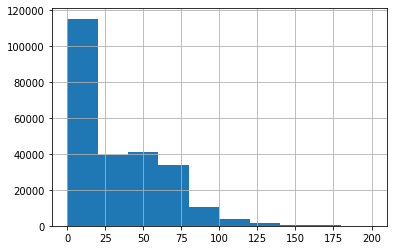

In [168]:
%matplotlib inline
part1['sum'].hist(range=[0,200])

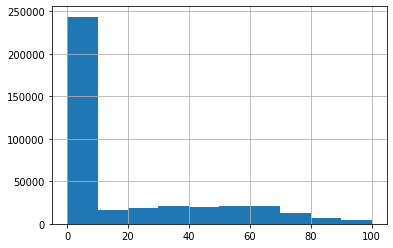

In [174]:
part1['sum'].fillna(0).hist(range=[0,100])

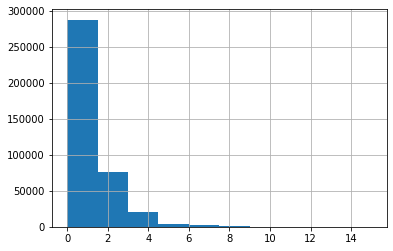

In [175]:
part1['count'].fillna(0).hist(range=[0,15])

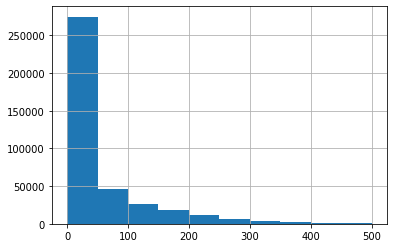

In [179]:
part1['totalruntime'].fillna(0).hist(range=[0,500])

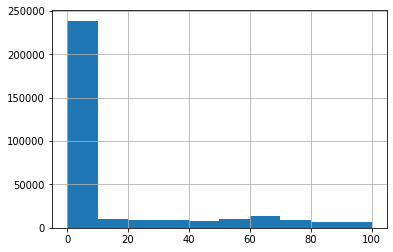

In [180]:
part1['totalruntime'].fillna(0).hist(range=[0,100])

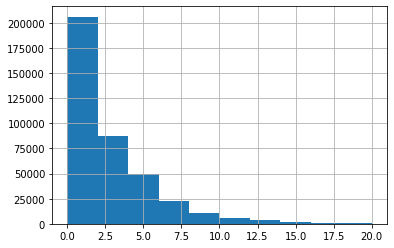

In [182]:
part1['runfreq'].fillna(0).hist(range=[0,20])

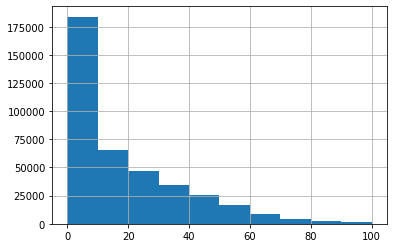

In [185]:
part1['chargefreq'].fillna(0).hist(range=[0,100])

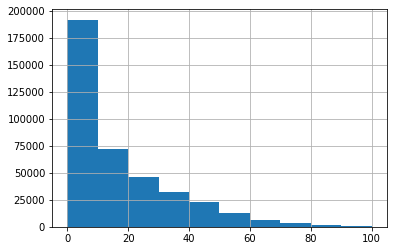

In [186]:
part1['dischargefreq'].fillna(0).hist(range=[0,100])

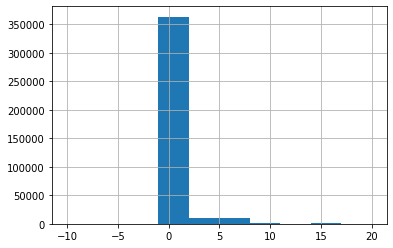

In [193]:
part1[part1['max_chargerate']!=np.inf]['max_chargerate'].hist(range=[-10,20])

In [194]:
part1[part1['max_chargerate']!=np.inf]['max_chargerate'].describe()

count    385708.000000
mean          0.476837
std           1.892280
min         -21.250000
25%           0.000000
50%           0.041322
75%           0.263158
max         100.000000
Name: max_chargerate, dtype: float64

In [197]:
part1.columns

Index(['OEM Model', 'DSN', 'level_2', 'sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'online', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#cl

In [196]:
part1.describe().T

count         mean  \
level_2                                          391371.0     0.000000   
sum                                              246400.0    30.851546   
count                                            246400.0     1.657444   
No Dustbox Error                                  28323.0     1.705893   
totalruntime                                     391371.0    47.281975   
runfreq                                          391371.0     2.425233   
online                                           391371.0  7845.727122   
chargefreq                                       391371.0    20.136931   
dischargefreq                                    391371.0    18.307460   
max_chargerate                                   391371.0          inf   
max_dischargerate                                391371.0          NaN   
min_chargelevel                                  387345.0    41.996461   
Bumper Error                                      58352.0     1.541524   
Cliff Sensor Error                                61308.0     1.594409   
Error = 0                                        185707.0     2.819560   
Bumper Error time to clear                        44775.0   180.628737   
Bumper Error#clear                                44775.0     1.456683   
No Battery/Fuse Error                             22268.0     1.404572   
No Battery/Fuse Error time to clear               15350.0   612.603242   
No Battery/Fuse Error#clear                       15350.0     1.350489   
Drop Error                                        73596.0     1.703571   
Drop Error time to clear                          55631.0   156.421240   
Drop Error#clear                                  55631.0     1.597059   
Cliff Sensor Error time to clear                  47155.0   160.336177   
Cliff Sensor Error#clear                          47155.0     1.495706   
Front Wheel Error                                 32613.0     1.670806   
Front Wheel Error time to clear                   21435.0   420.653948   
Front Wheel Error#clear                           21435.0     1.526895   
Wheel Encoder Error                                 548.0     2.023723   
Wheels Error                                      14394.0     1.496387   
Wheel Encoder Error time to clear                   410.0   150.432195   
Wheel Encoder Error#clear                           410.0     1.878049   
Wheels Error time to clear                        10423.0   130.290607   
Wheels Error#clear                                10423.0     1.460040   
No Dustbox Error time to clear                    20629.0   214.021467   
No Dustbox Error#clear                            20629.0     1.719763   
Mag Strip Error                                    4106.0     1.298831   
Mag Strip Error time to clear                      2994.0   160.411078   
Mag Strip Error#clear                              2994.0     1.272545   
Charger Error                                      1415.0     4.086219   
Charger Error time to clear                        1071.0   147.902443   
Charger Error#clear                                1071.0     4.827264   
Fan Error                                          1233.0     2.888889   
Fan Error time to clear                             996.0   323.871168   
Fan Error#clear                                     996.0     2.610442   
Reserved / 2017 Overcurrent Error                  3635.0     1.445667   
Reserved / 2017 Overcurrent Error time to clear    2802.0   460.723513   
Reserved / 2017 Overcurrent Error#clear            2802.0     1.389365   
Main Brush Error                                  23968.0     1.938209   
Main Brush Error time to clear                    19506.0   208.790363   
Main Brush Error#clear                            19506.0     1.806829   
Side Brush Error                                  10393.0     1.569037   
Side Brush Error time to clear                     8201.0   209.781496   
Side Brush Error#clear                             8201.

In [332]:
part1['DSN'].isin(returns['DSN'].unique()).sum()

201

In [339]:
part1['returned']=np.where(part1['DSN'].isin(returns['DSN'].unique()),'returned','not returned')

In [340]:
part1.groupby(['OEM Model','returned']).size()

OEM Model  returned    
RV1000     not returned    20096
           returned            8
RV1000A    not returned    88701
           returned          193
RV750      not returned    81566
RV750L     not returned    46031
RV750N     not returned    72746
RV750R     not returned       24
RV850      not returned    76713
RV871      not returned     5293
dtype: int64

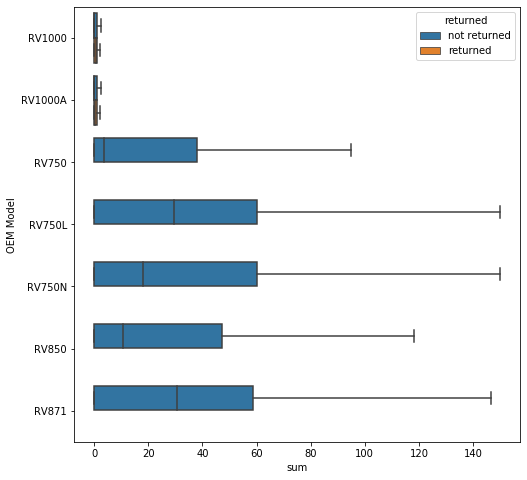

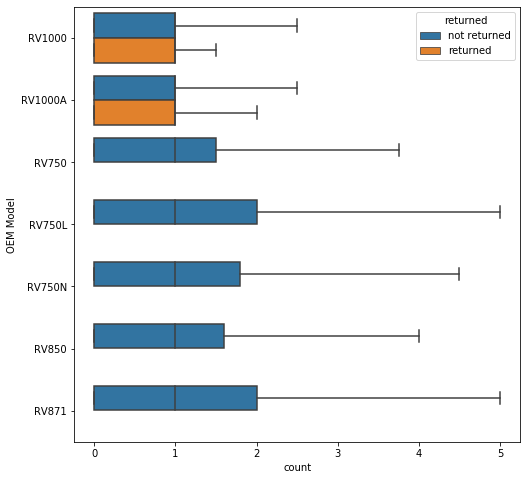

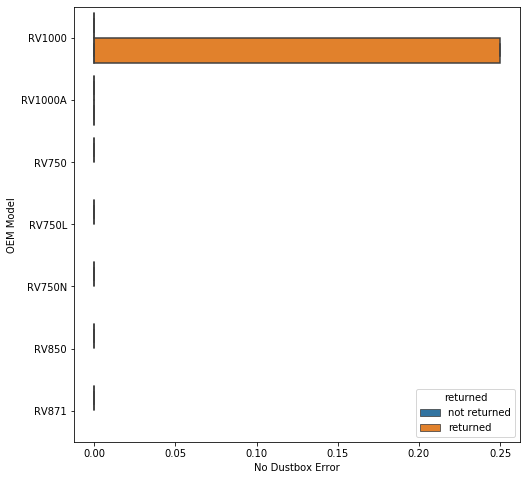

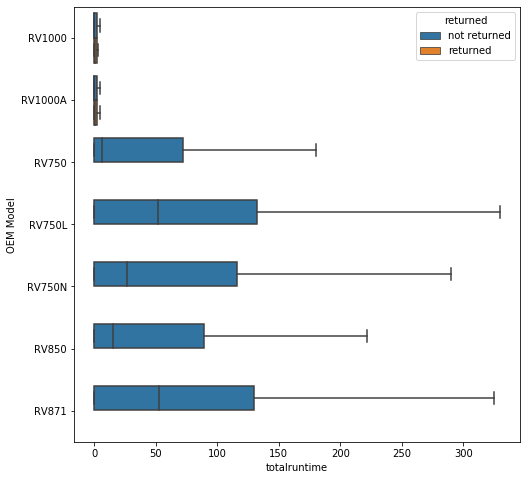

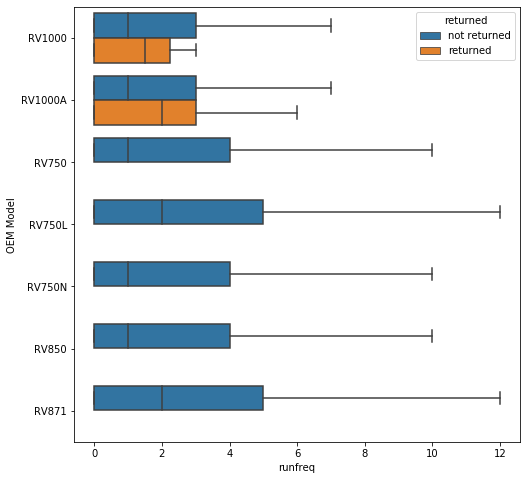

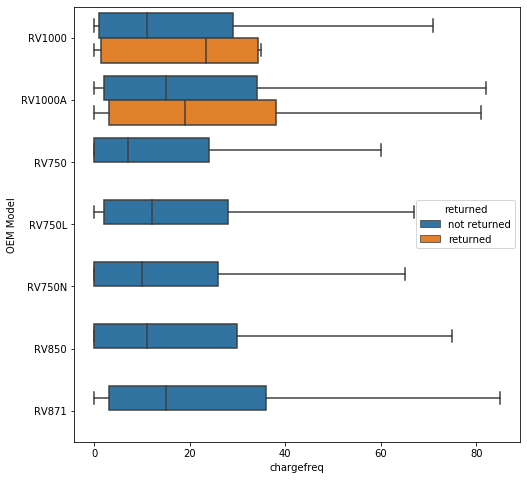

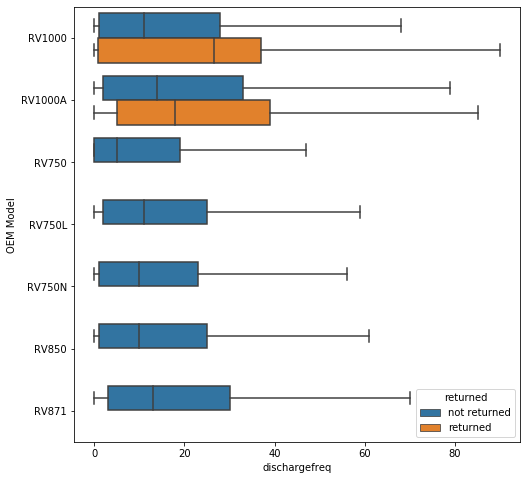

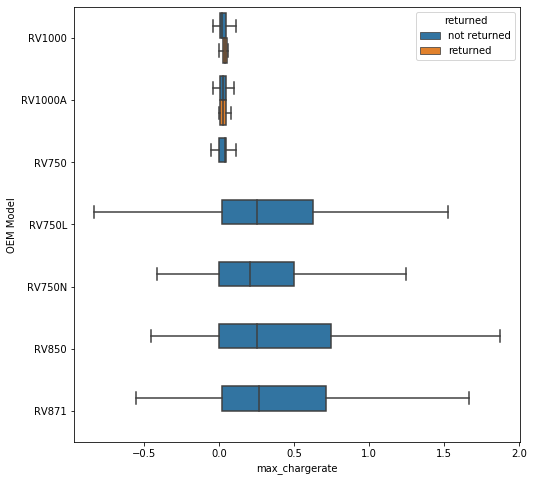

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


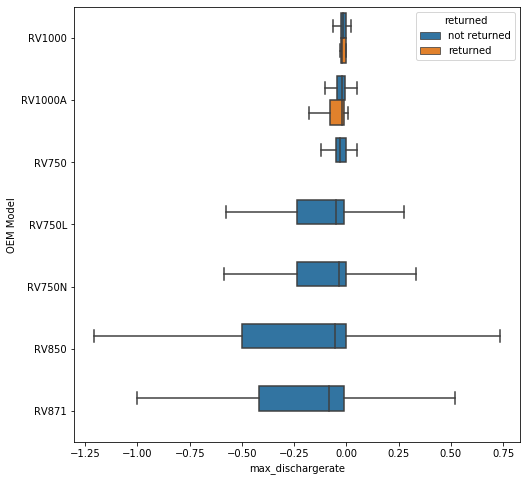

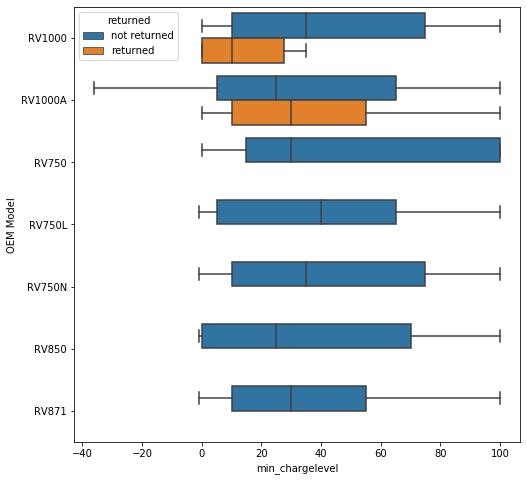

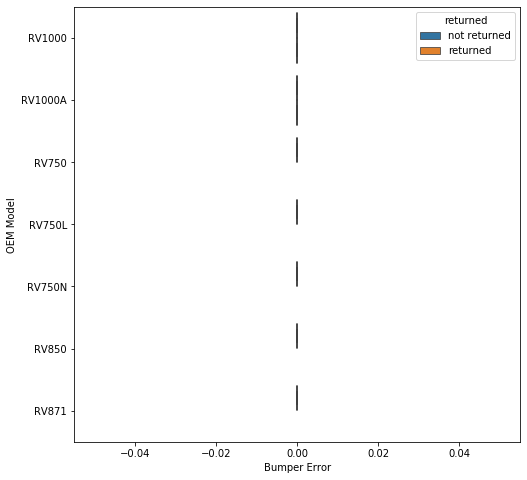

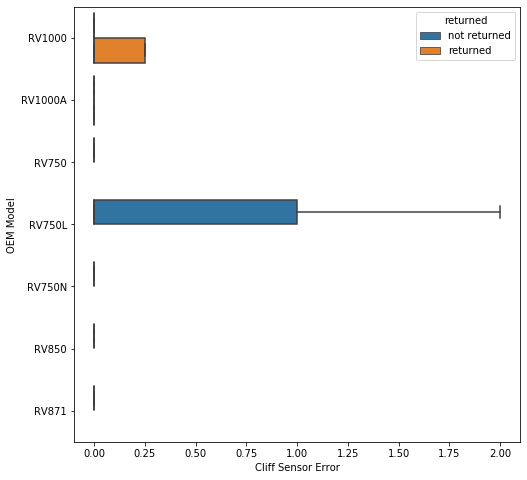

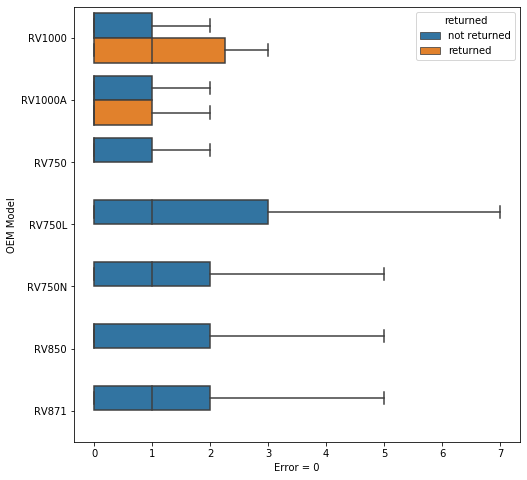

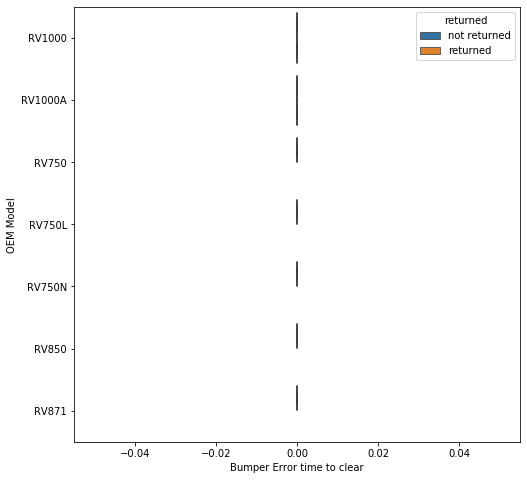

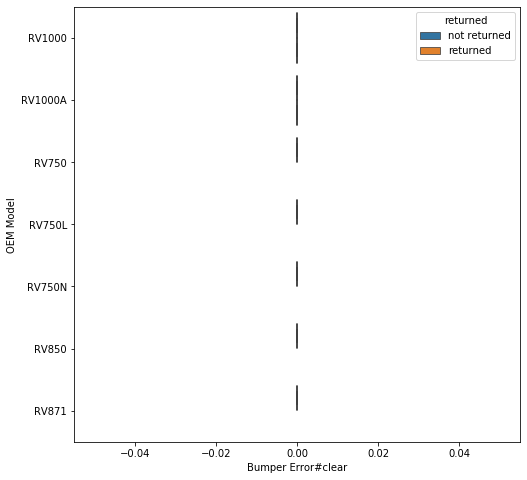

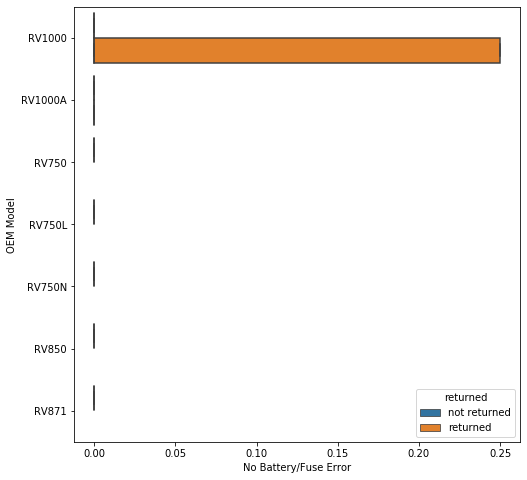

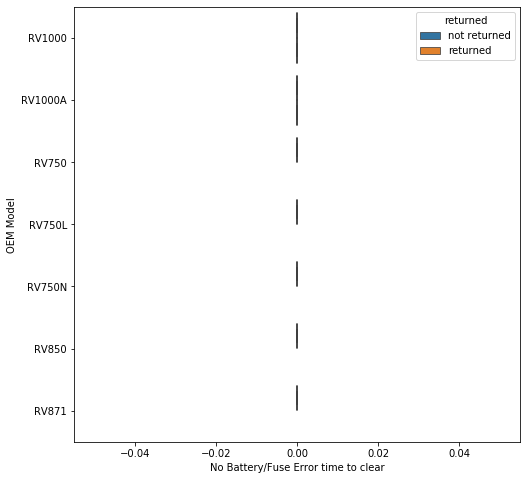

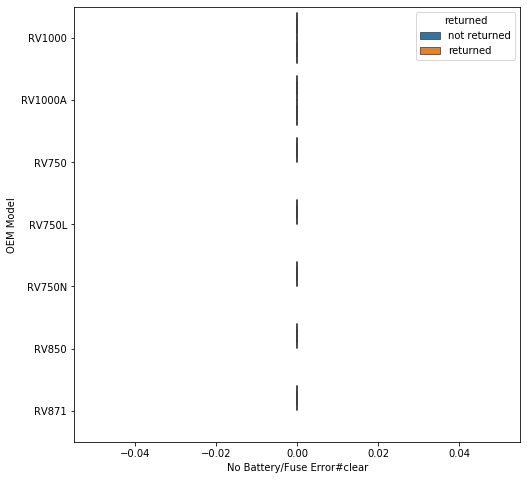

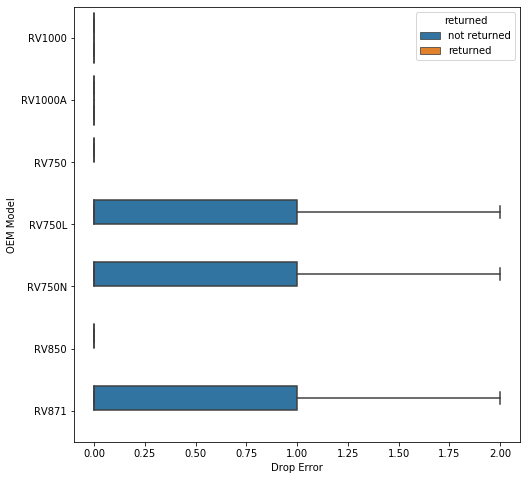

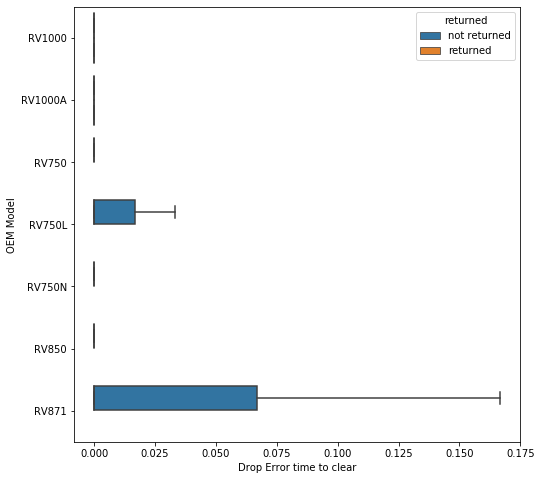

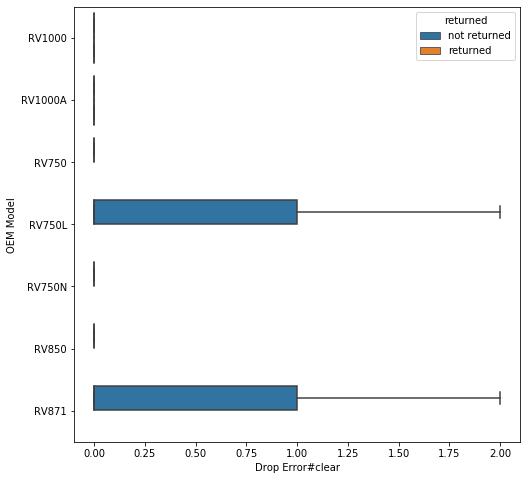

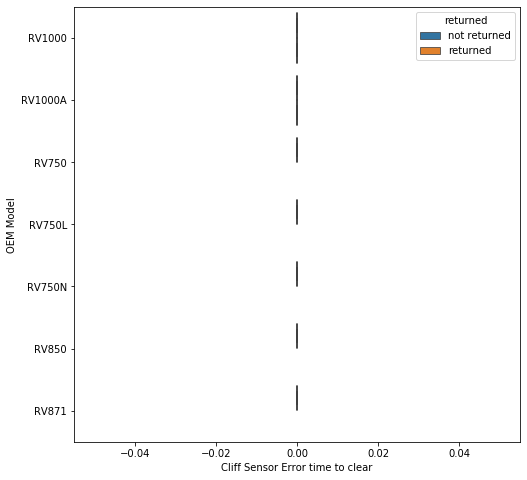

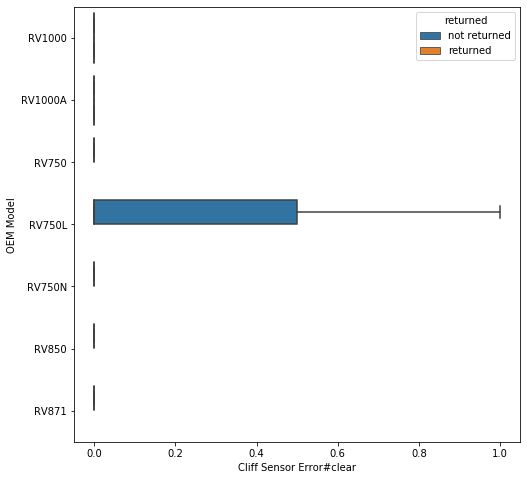

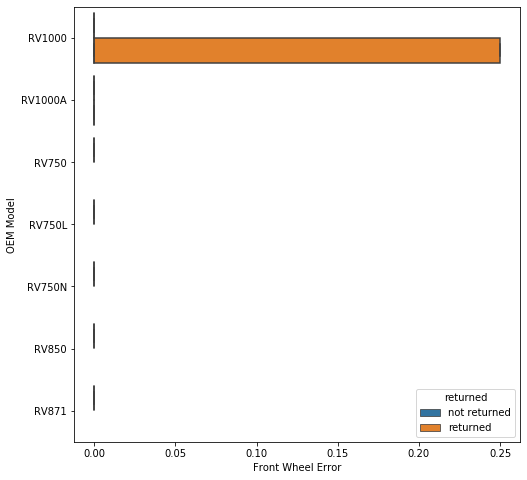

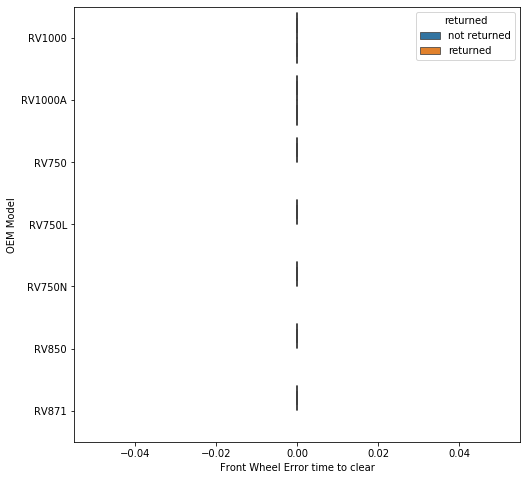

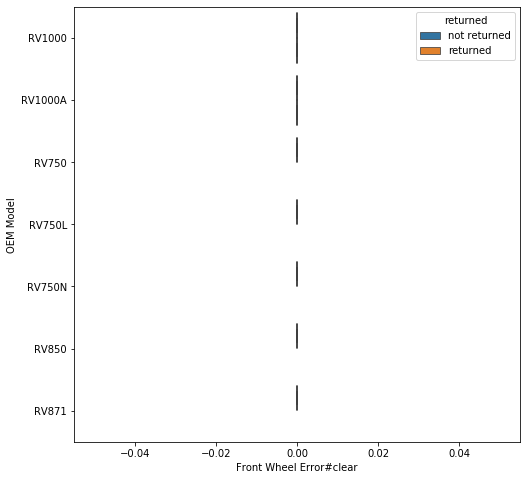

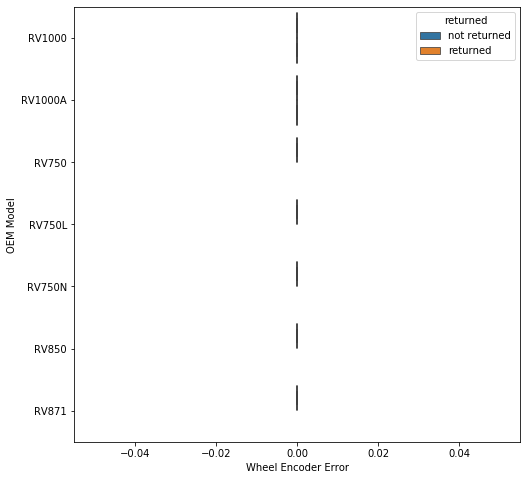

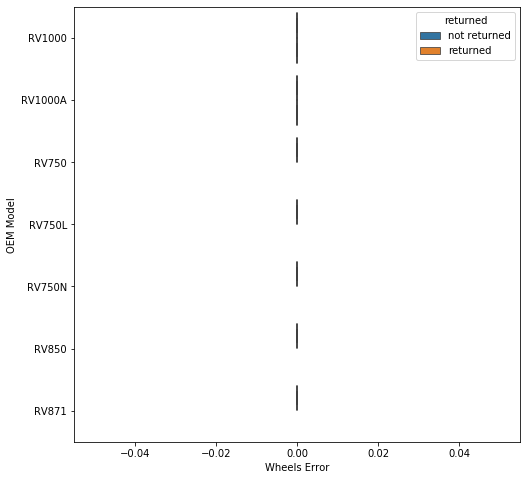

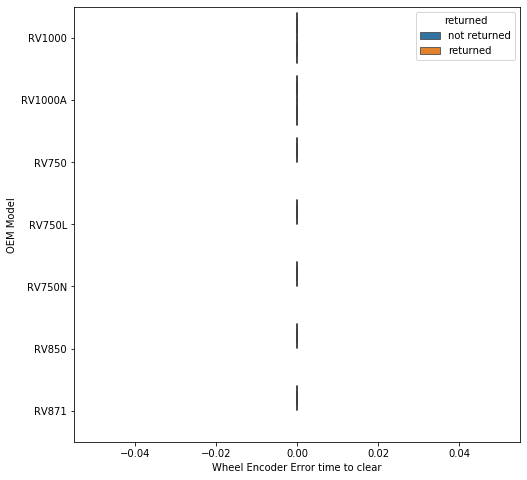

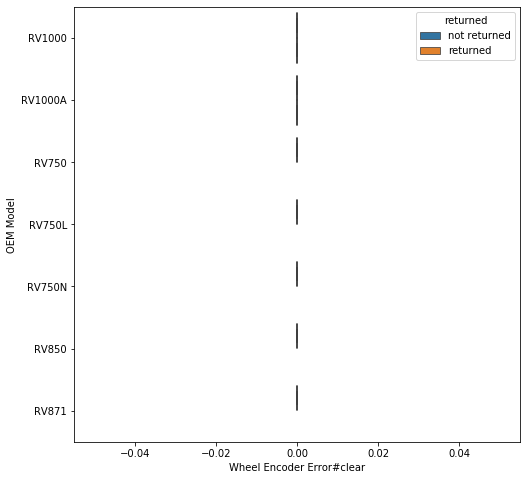

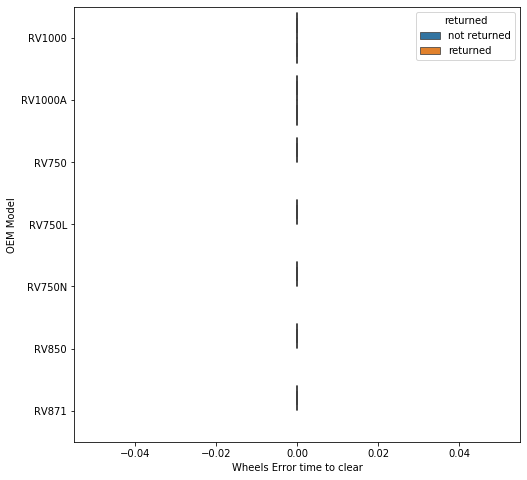

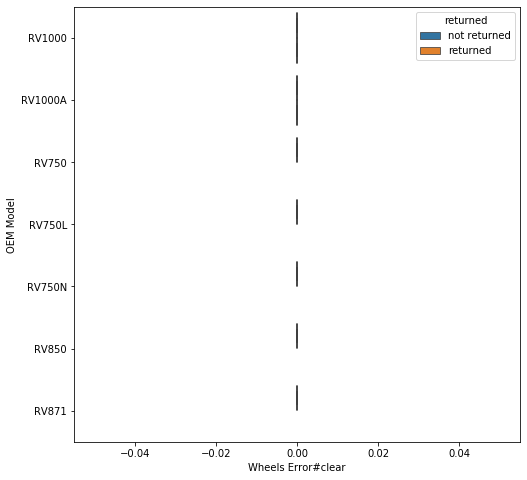

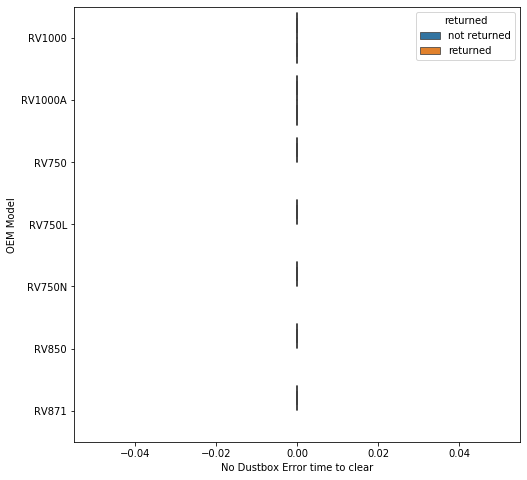

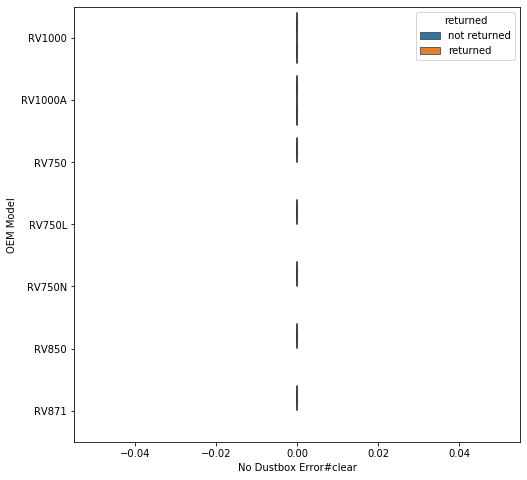

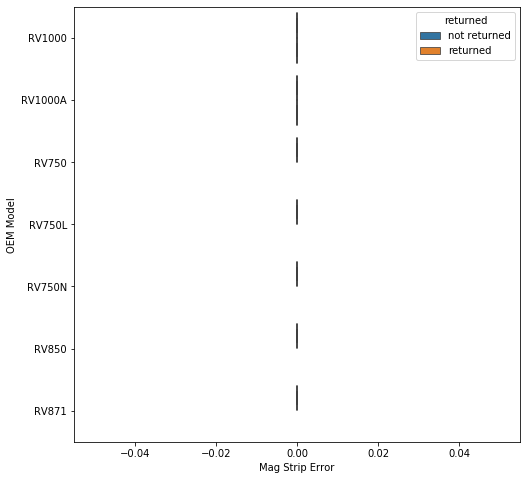

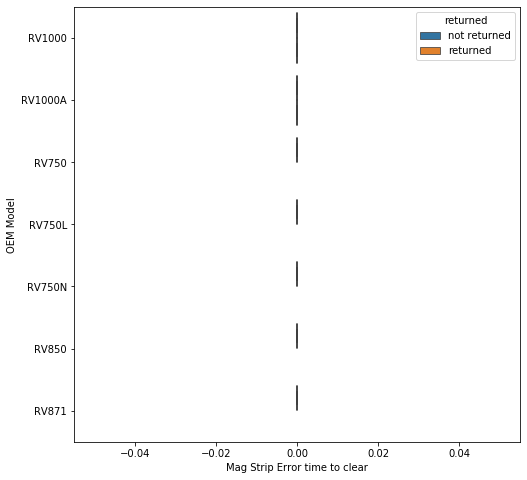

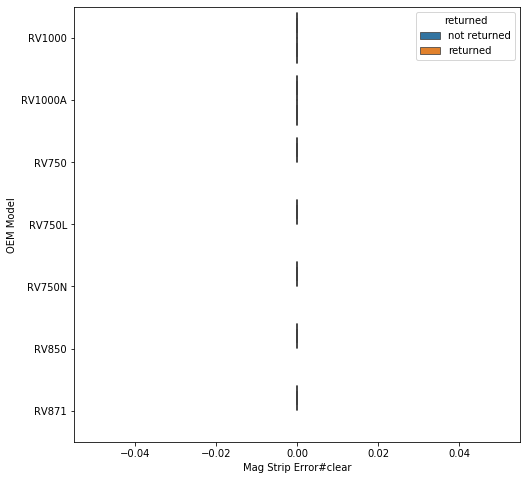

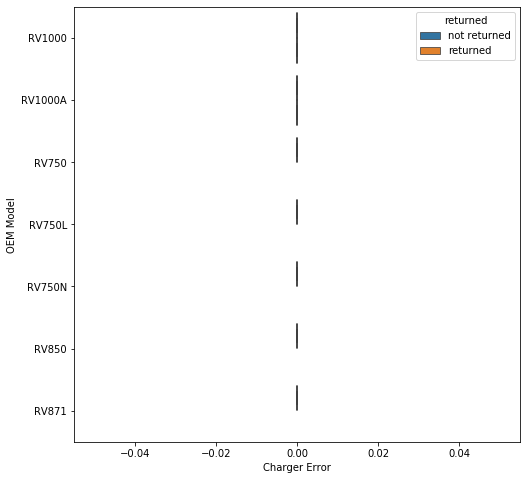

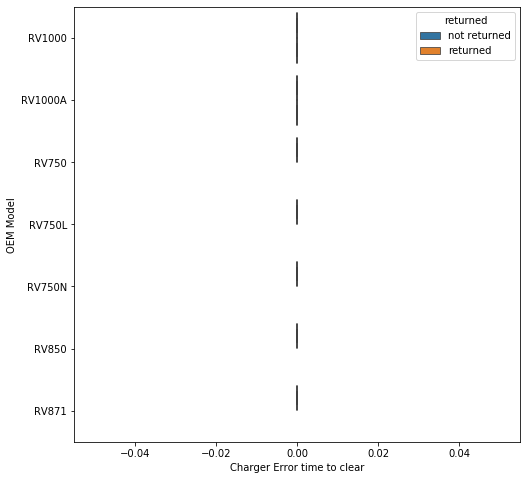

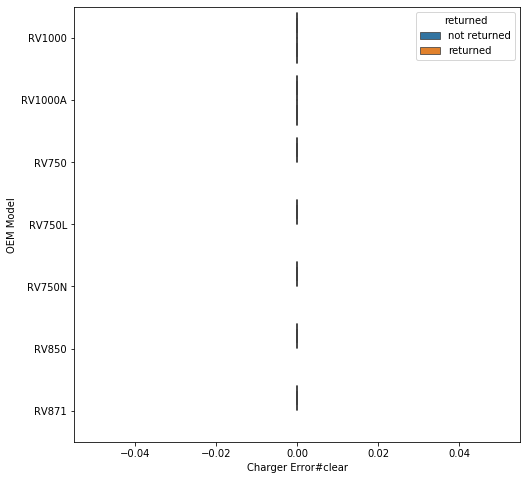

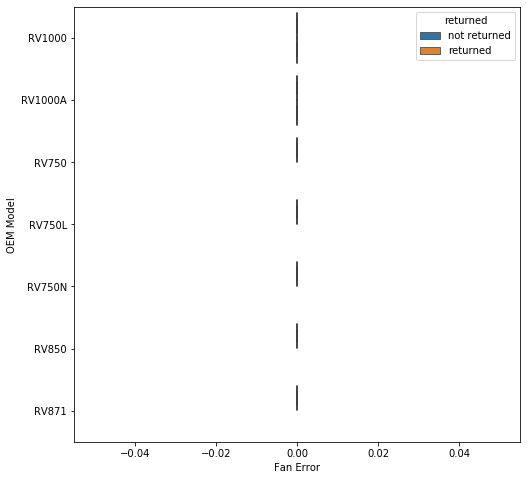

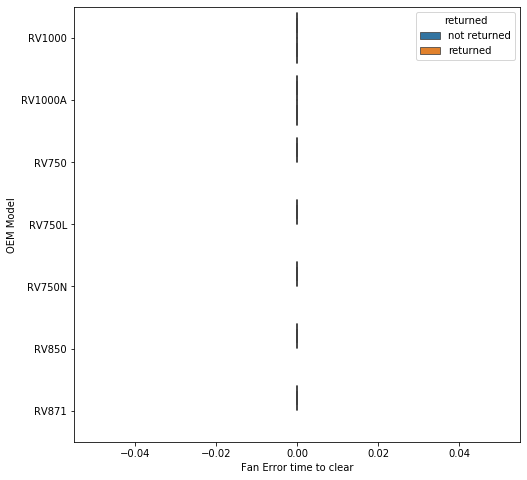

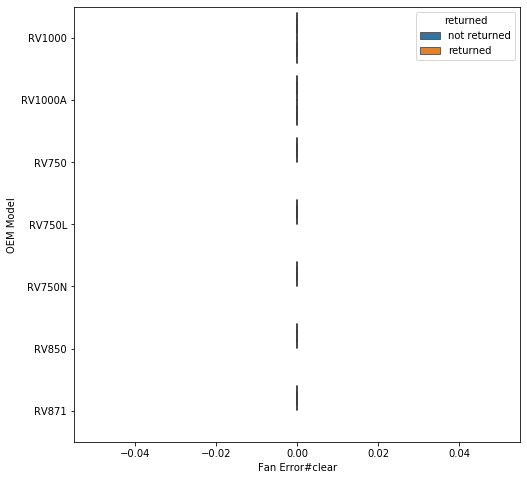

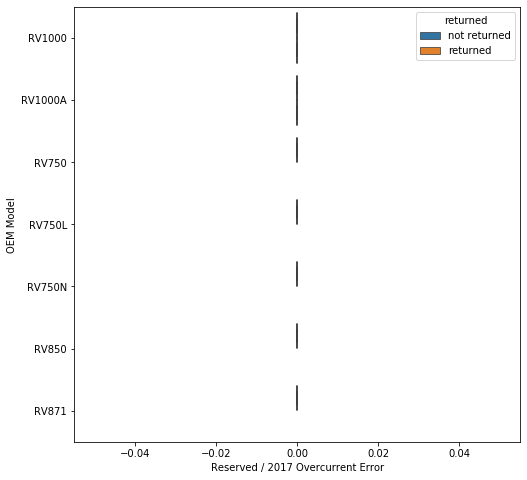

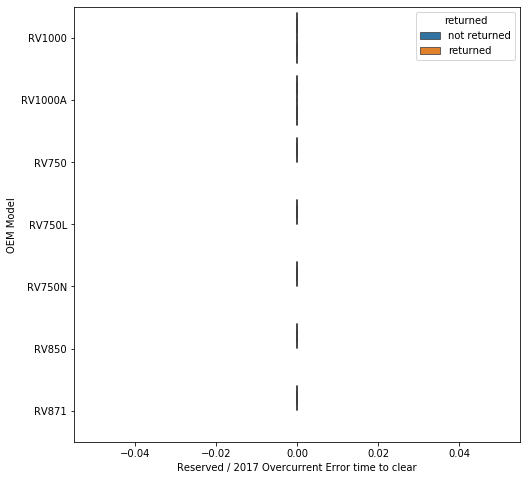

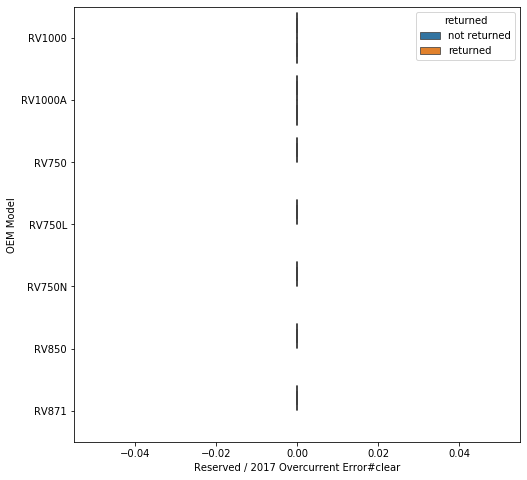

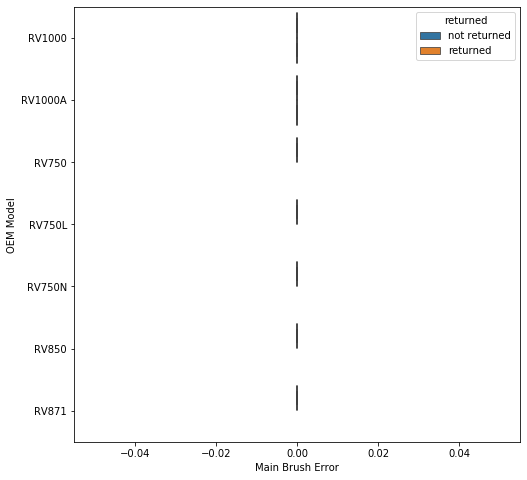

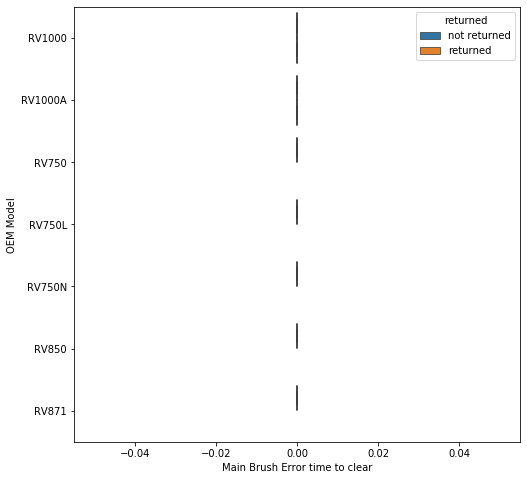

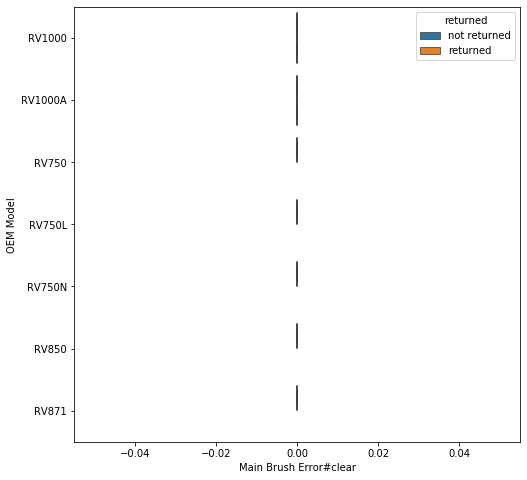

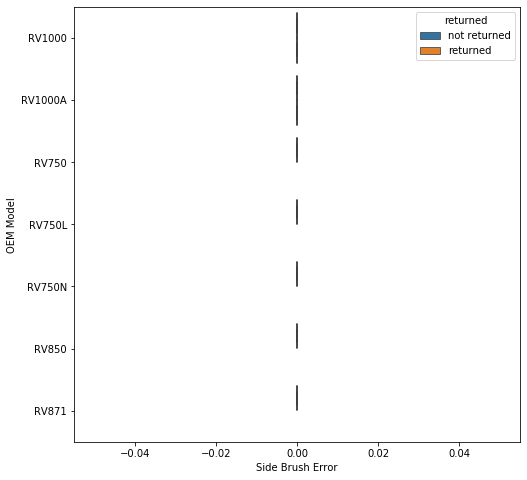

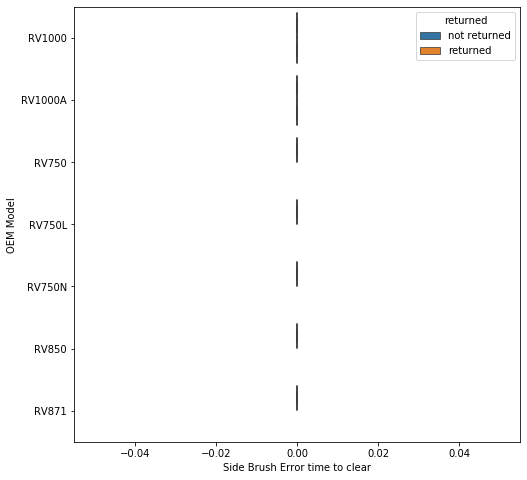

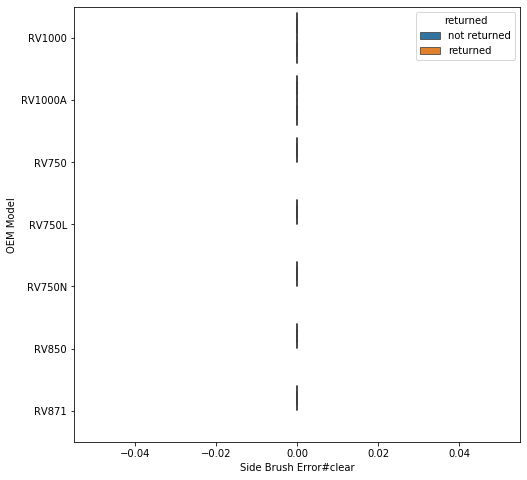

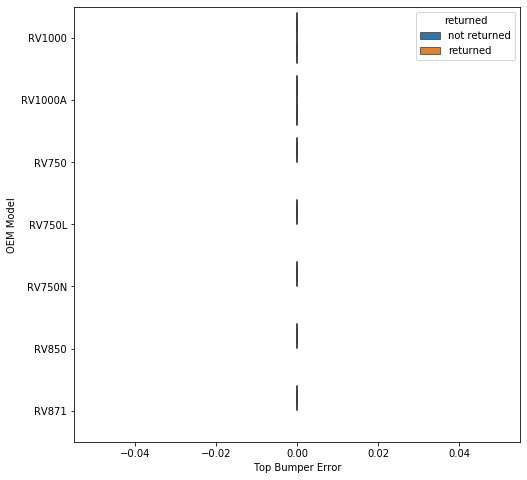

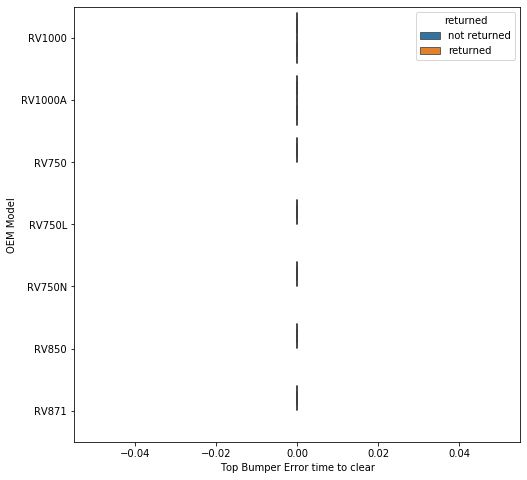

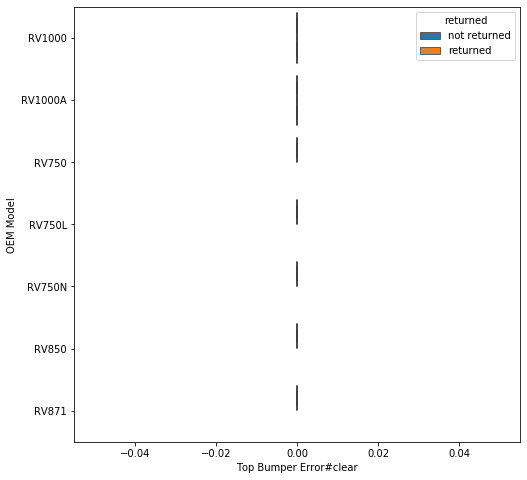

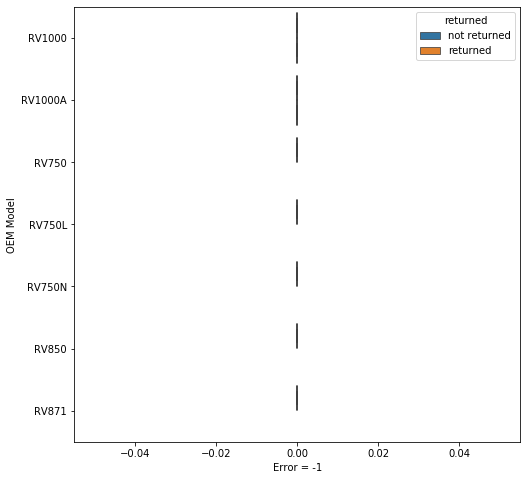

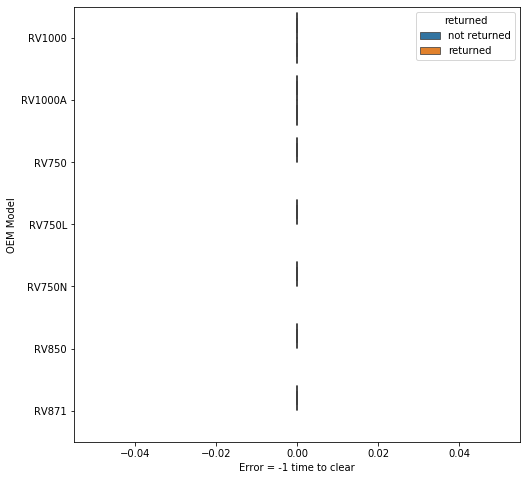

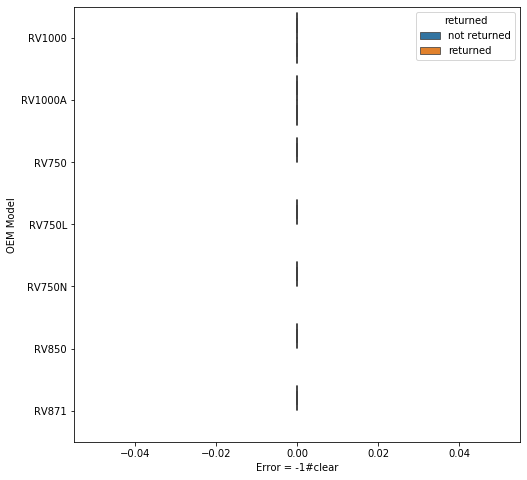

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#clear', 'Charger Error', 'Charger Error time to clear',
       'Charger Error#clear', 'Fan Error', 'Fan Error time to clear',
       'Fan Error#clear', 'Reserved / 2017 Overcurrent Error',
       'Reserved / 2017 Overcurrent Error time to clear',
       'Reserved / 2017 Overcurrent Error#clear', 'Main Brush Error',
       'Main Brush Error time to clear', 'Main Brush Error#clear',
       'Side Brush Error', 'Side Brush Error time to clear',
       'Side Brush Error#clear', 'Top Bumper Error',
       'Top Bumper Error time to clear', 'Top Bumper Error#clear',
       'Error = -1', 'Error = -1 time to clear', 'Error = -1#clear']:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=i,y='OEM Model',hue='returned',data=part1[(part1['OEM Model']!='RV750R')].fillna(0),showfliers=False)
    plt.show()

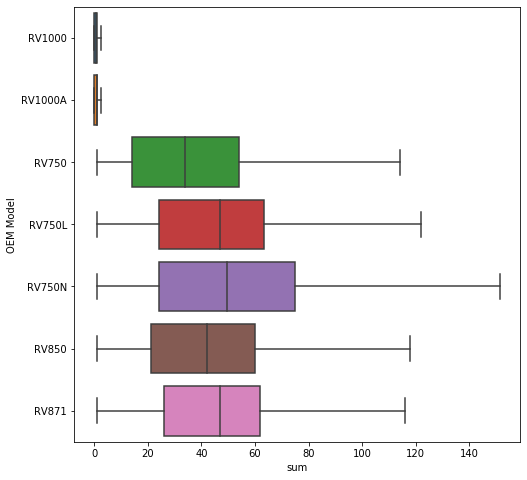

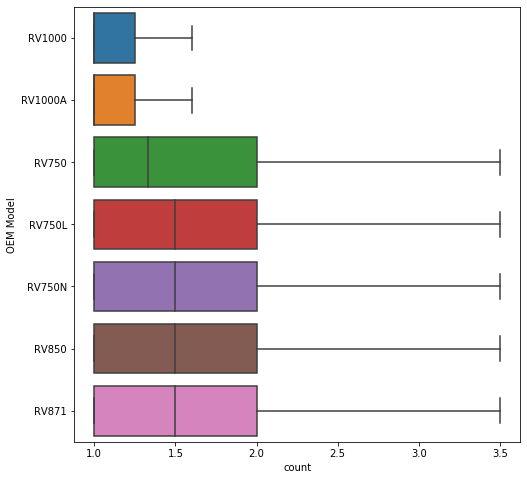

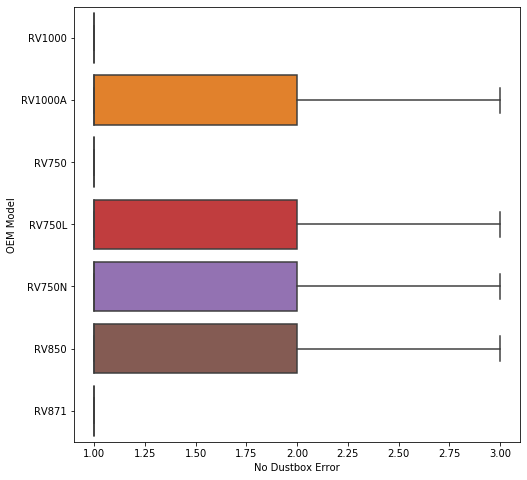

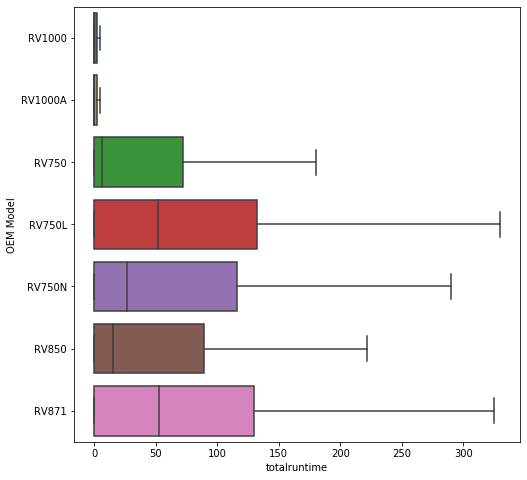

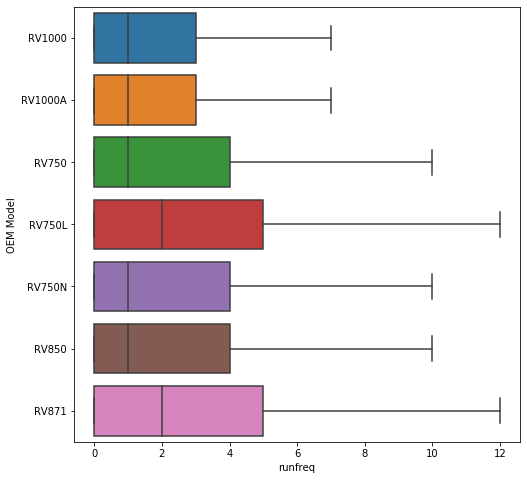

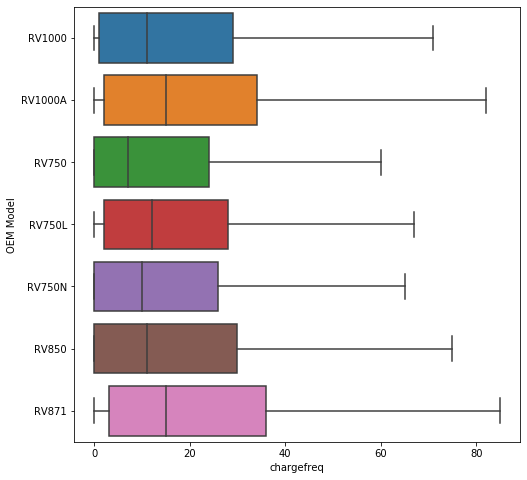

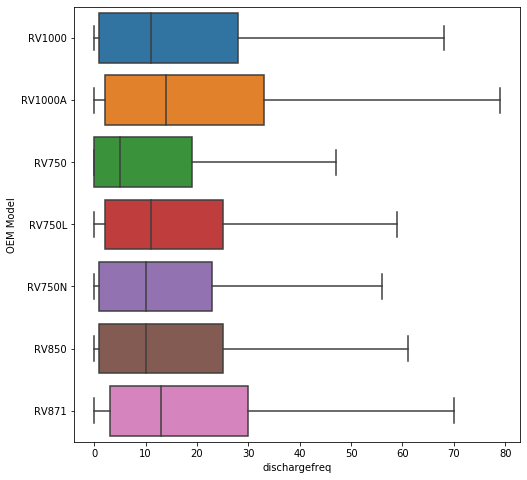

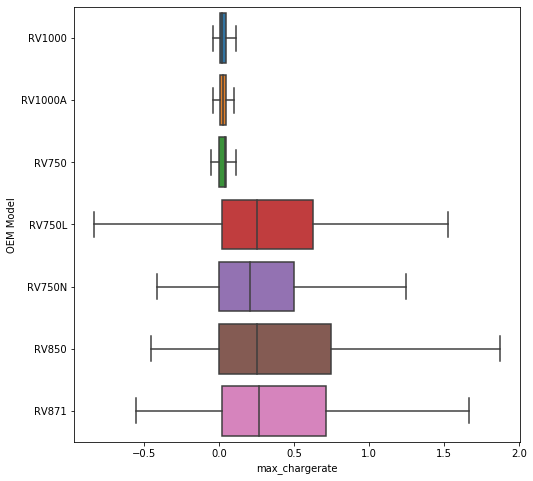

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


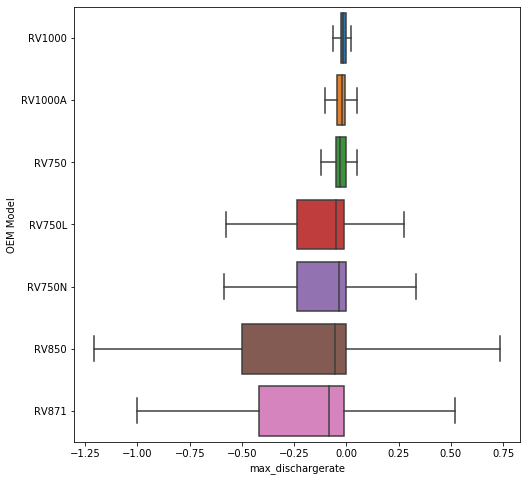

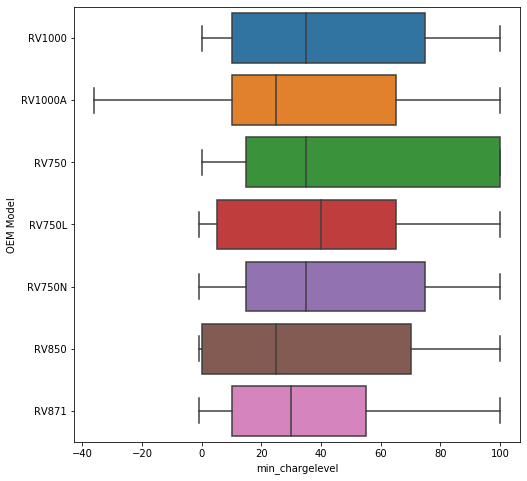

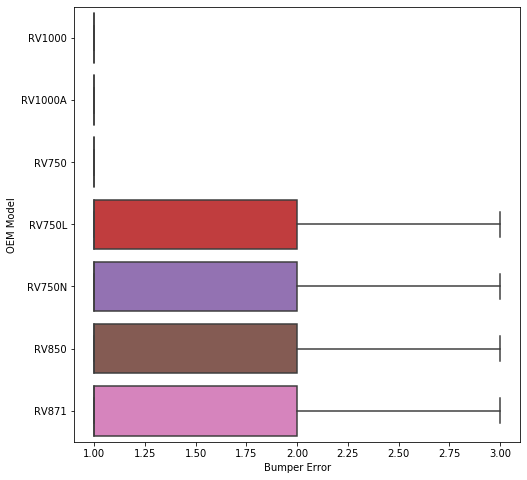

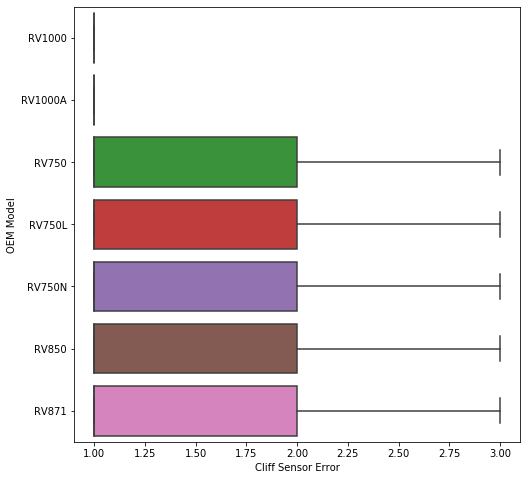

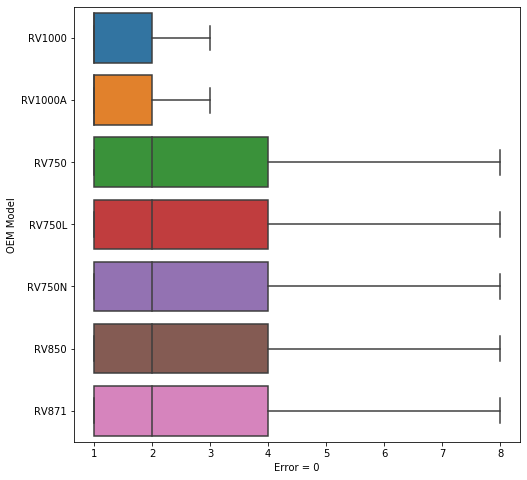

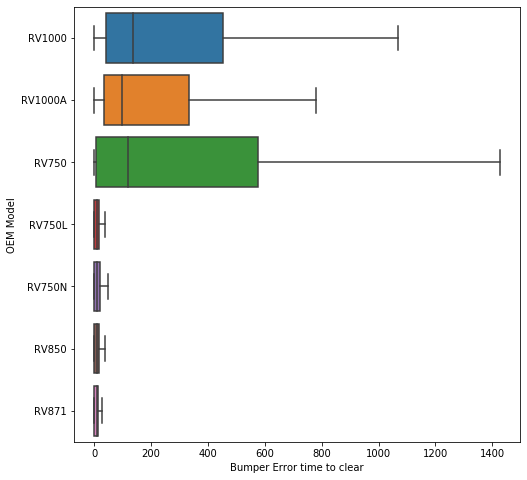

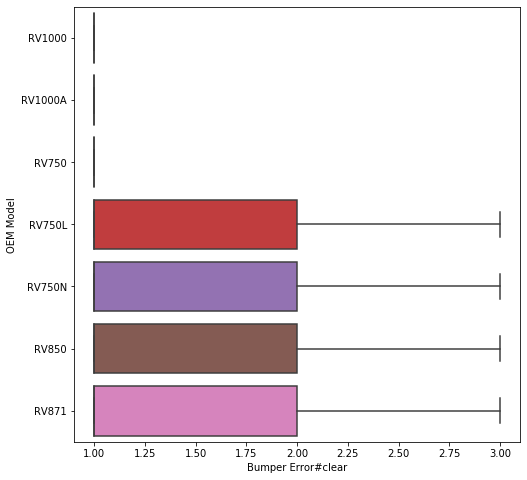

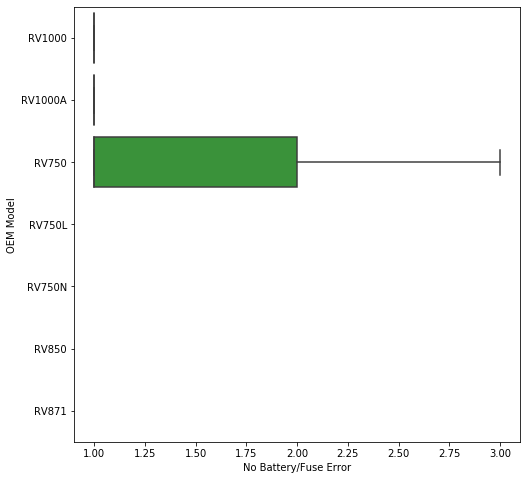

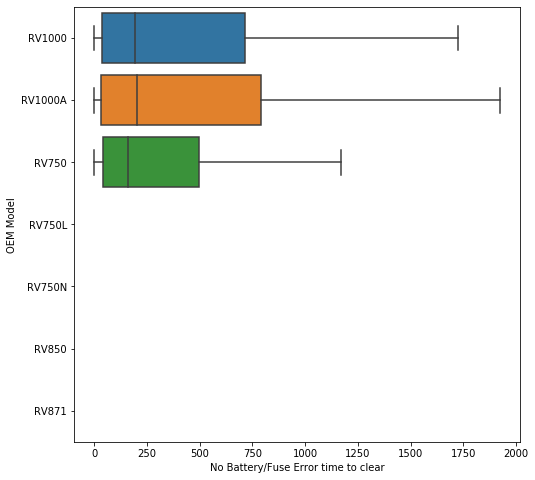

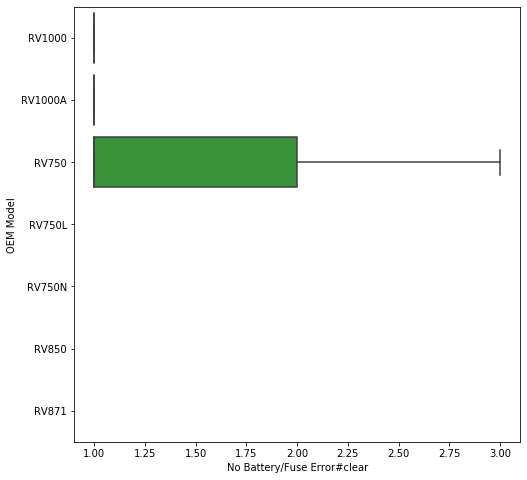

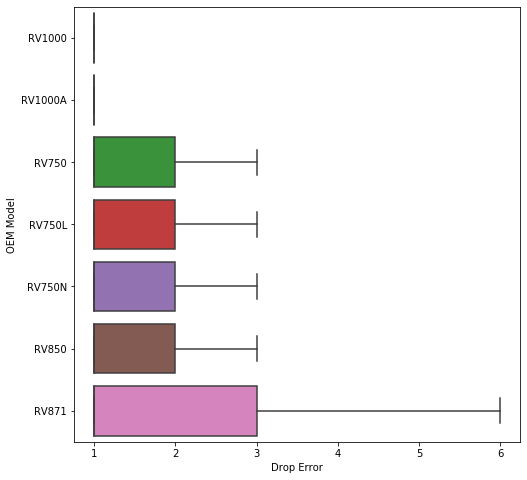

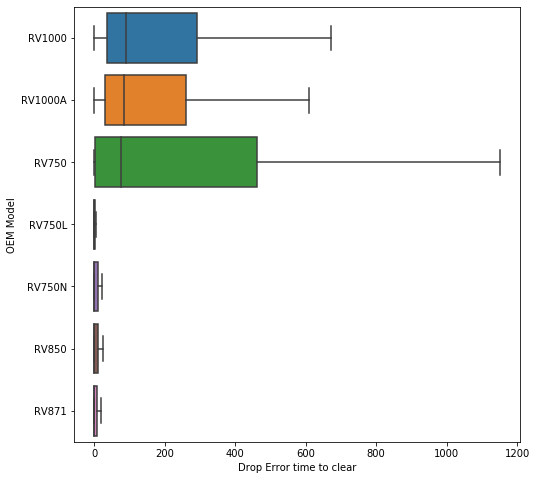

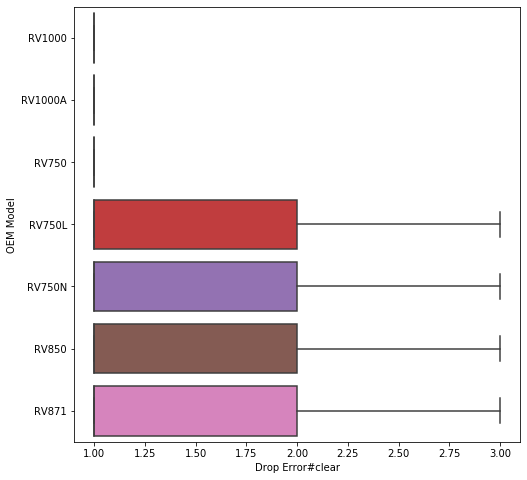

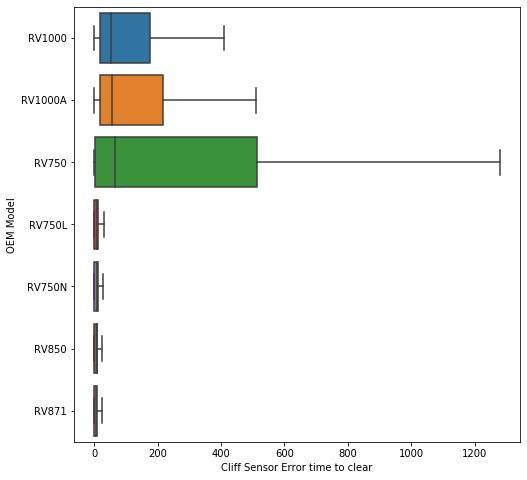

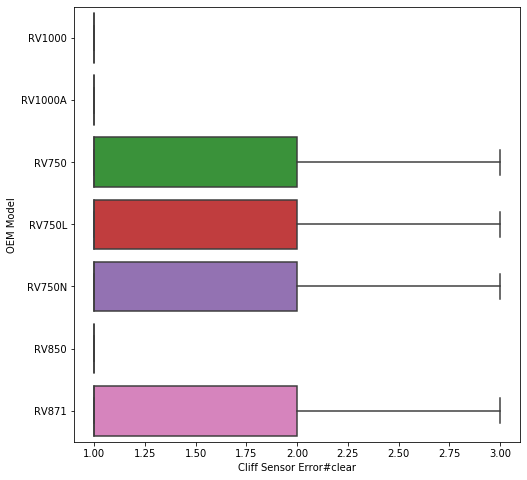

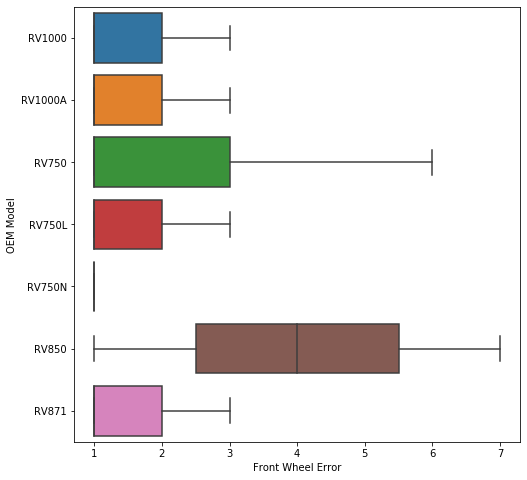

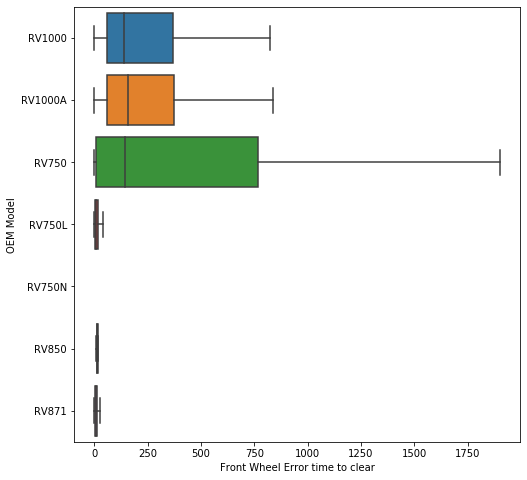

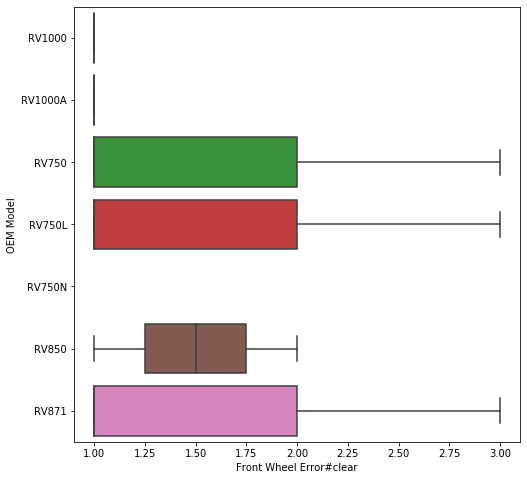

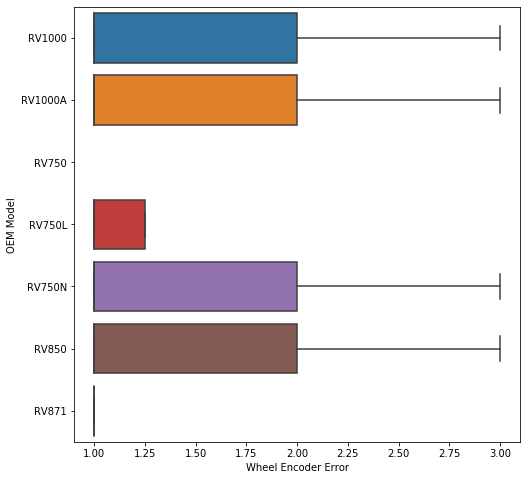

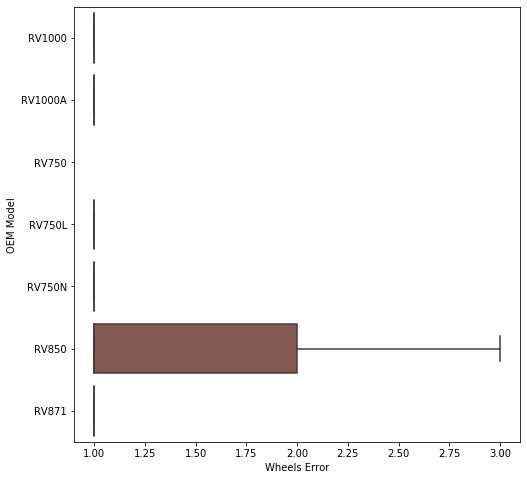

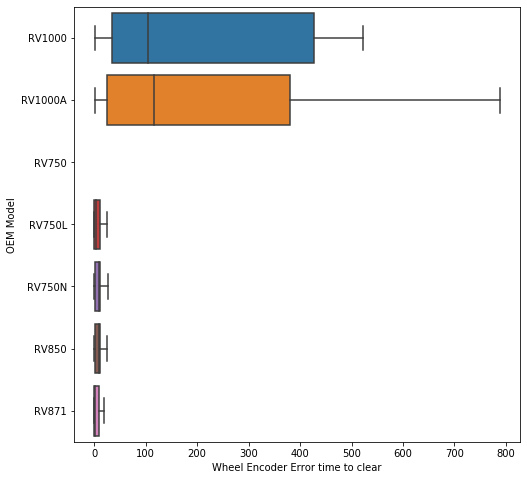

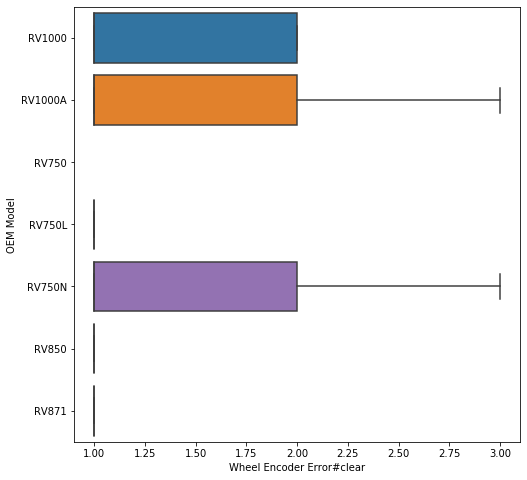

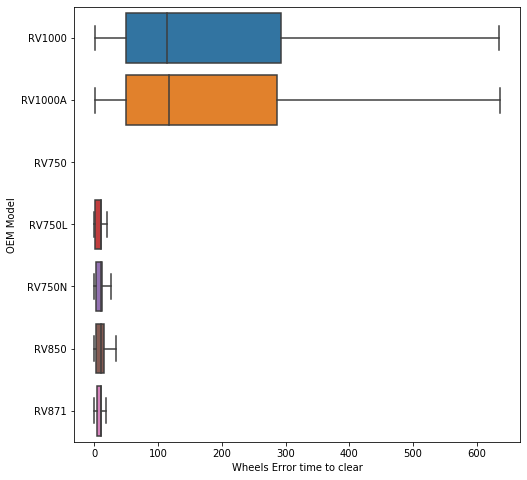

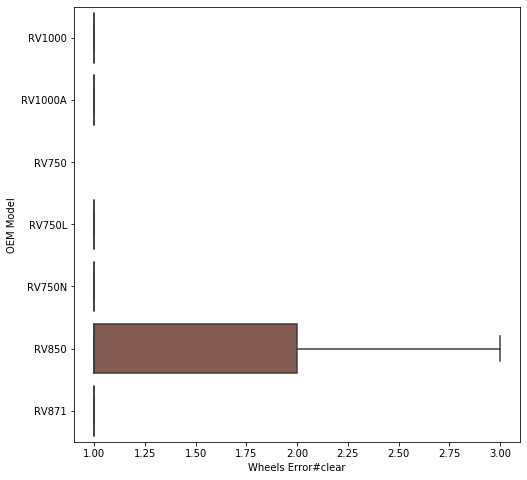

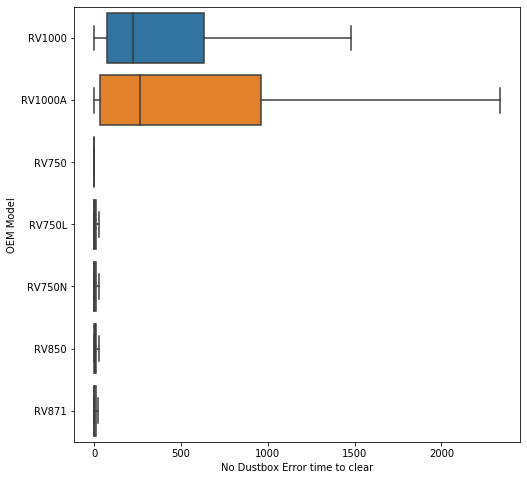

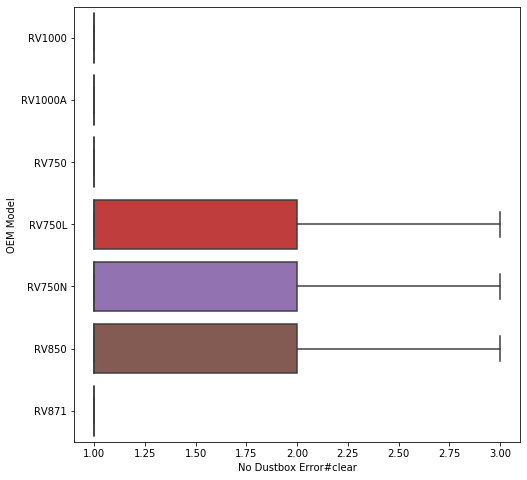

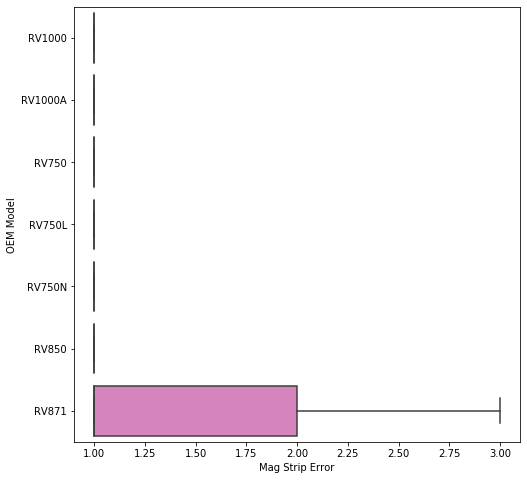

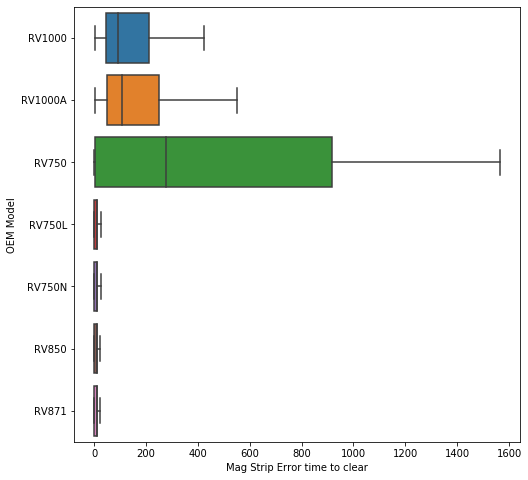

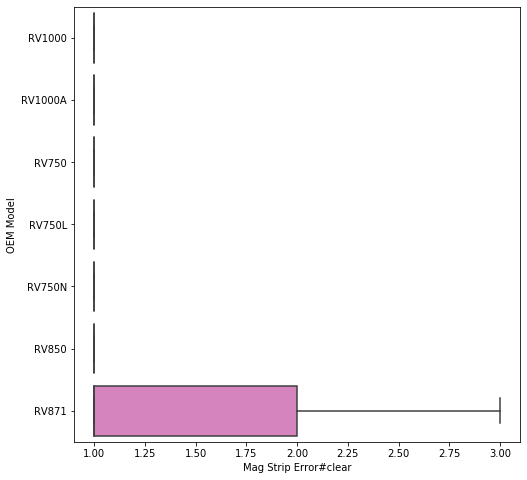

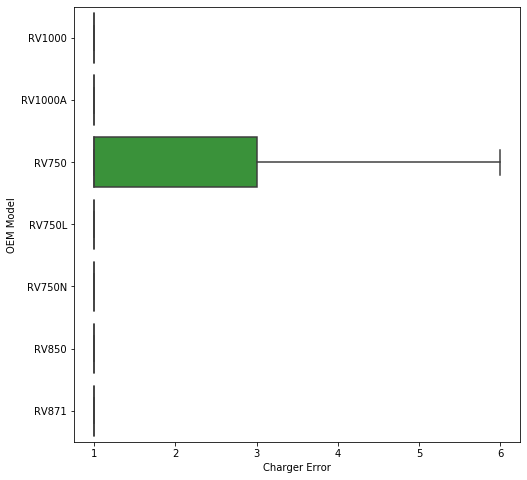

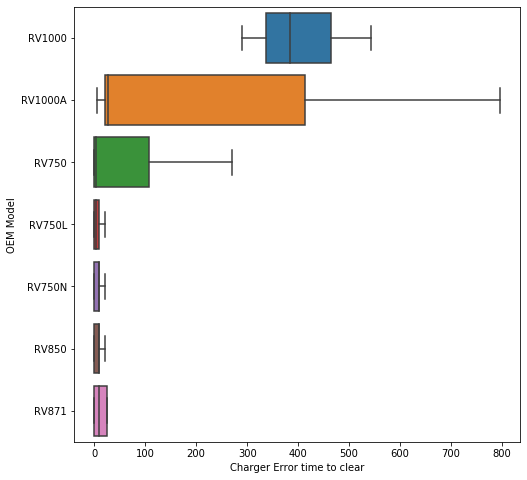

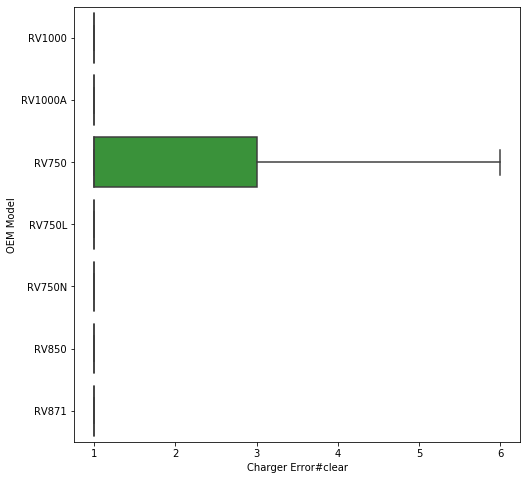

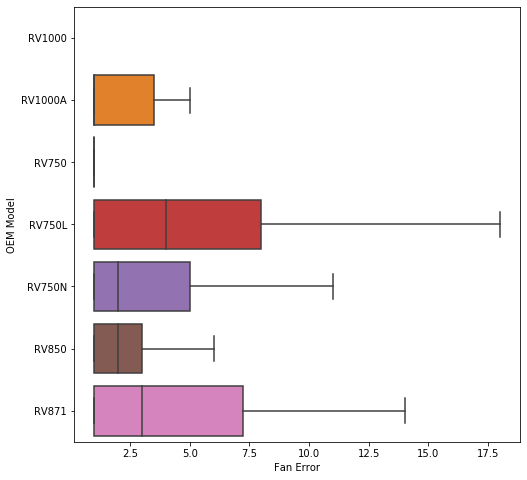

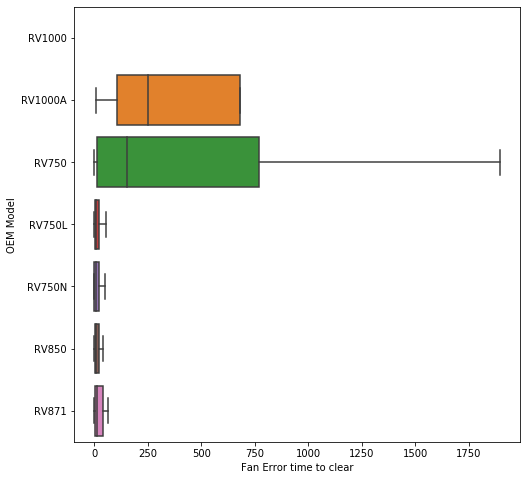

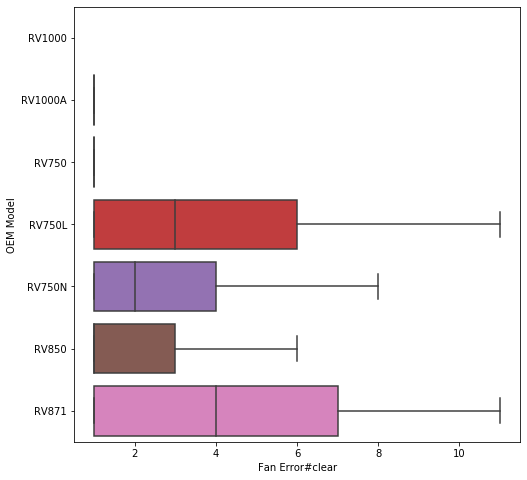

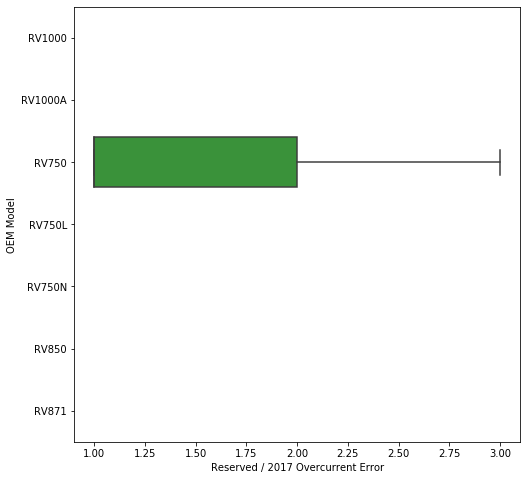

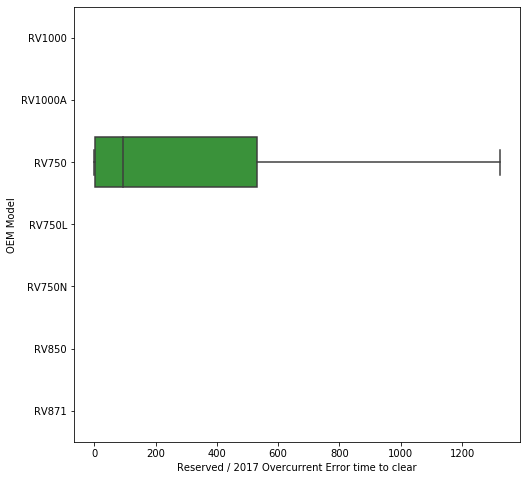

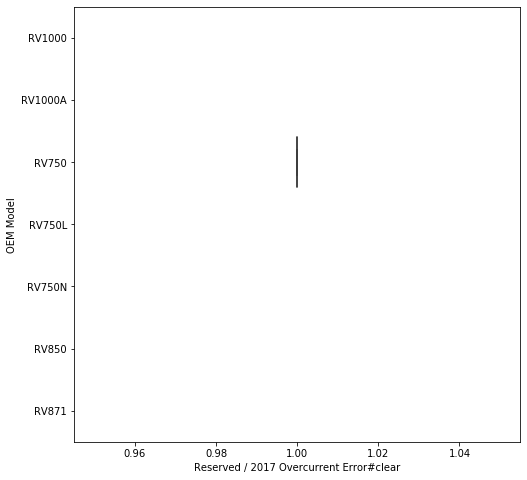

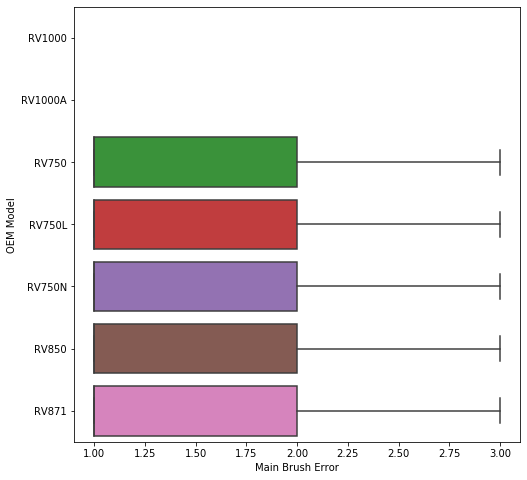

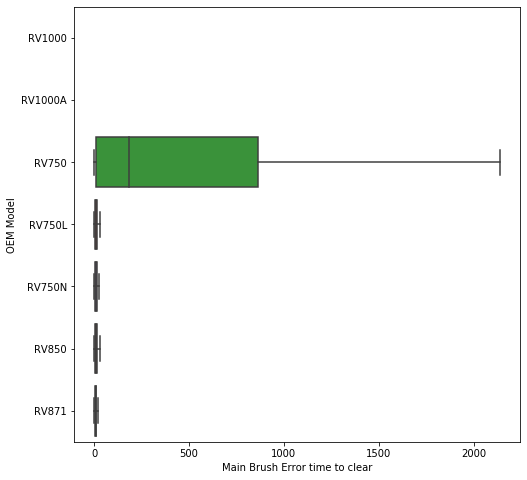

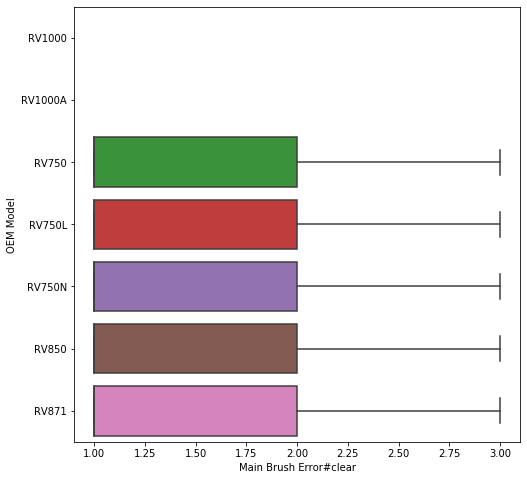

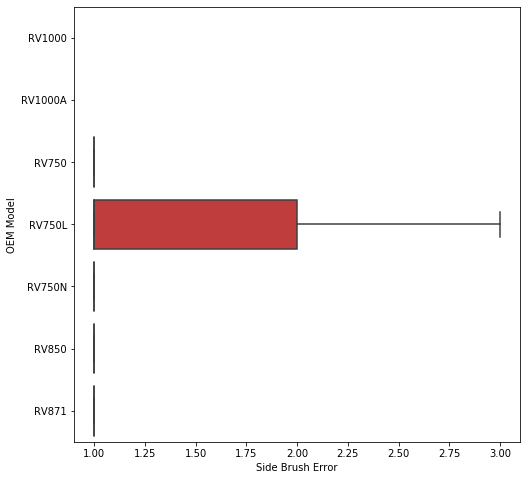

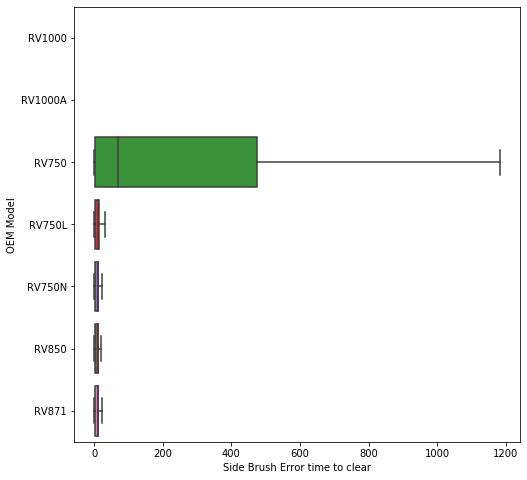

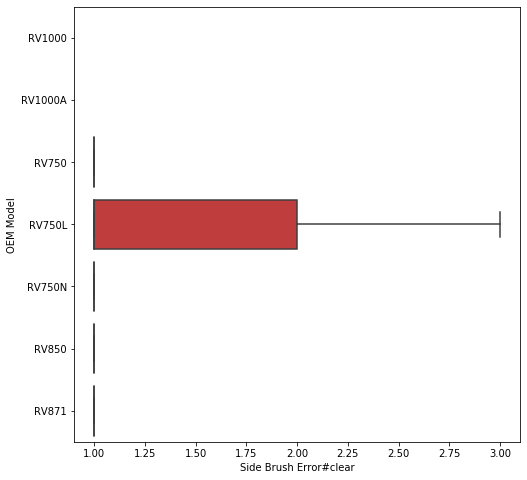

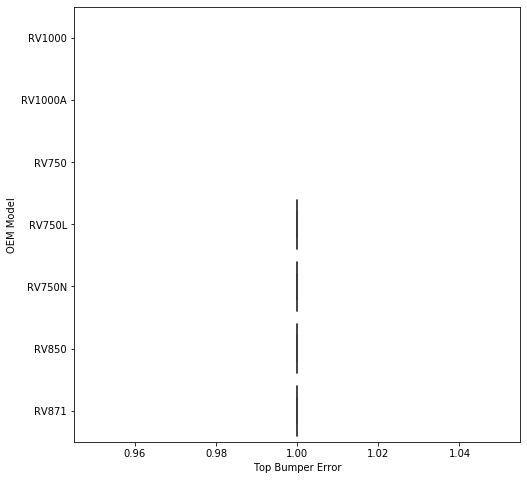

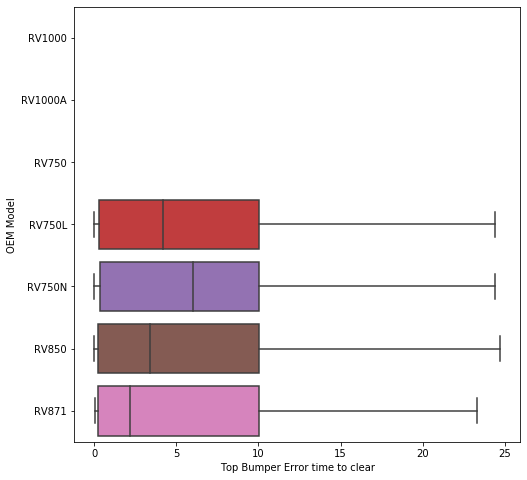

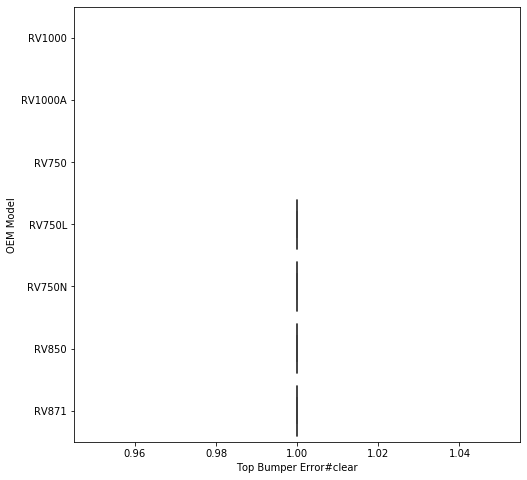

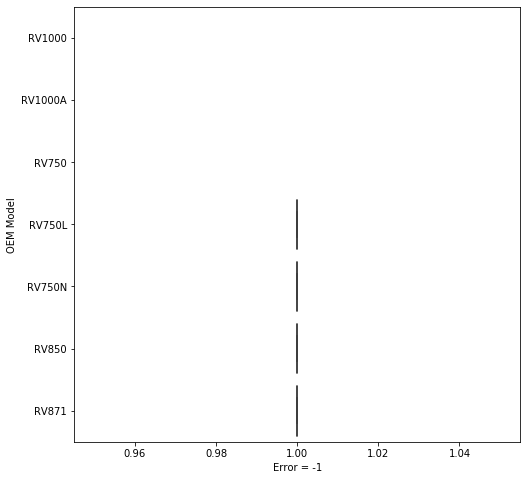

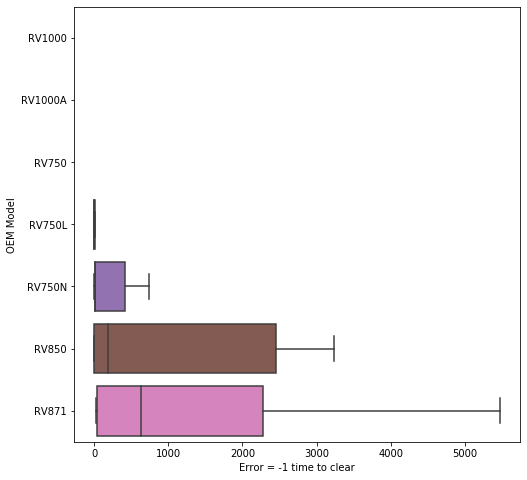

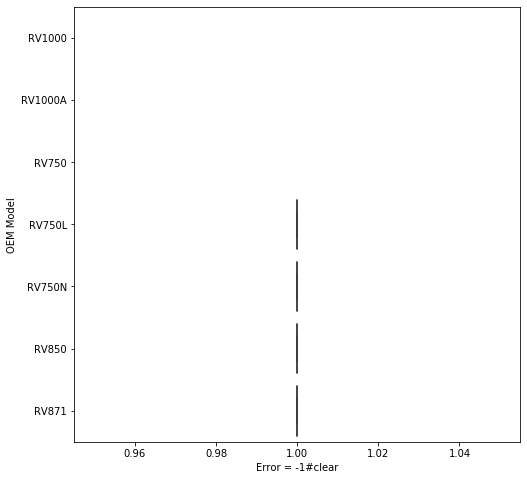

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#clear', 'Charger Error', 'Charger Error time to clear',
       'Charger Error#clear', 'Fan Error', 'Fan Error time to clear',
       'Fan Error#clear', 'Reserved / 2017 Overcurrent Error',
       'Reserved / 2017 Overcurrent Error time to clear',
       'Reserved / 2017 Overcurrent Error#clear', 'Main Brush Error',
       'Main Brush Error time to clear', 'Main Brush Error#clear',
       'Side Brush Error', 'Side Brush Error time to clear',
       'Side Brush Error#clear', 'Top Bumper Error',
       'Top Bumper Error time to clear', 'Top Bumper Error#clear',
       'Error = -1', 'Error = -1 time to clear', 'Error = -1#clear']:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=i,y='OEM Model',data=part1[part1['OEM Model']!='RV750R'],showfliers=False)
    plt.show()

In [202]:
part1['OEM Model']!='RV750R'.value_counts()

RV1000A    88894
RV750      81566
RV850      76713
RV750N     72746
RV750L     46031
RV1000     20104
RV871       5293
RV750R        24
Name: OEM Model, dtype: int64

In [221]:
part1.columns

Index(['OEM Model', 'DSN', 'level_2', 'sum', 'count', 'No Dustbox Error',
       'totalruntime', 'runfreq', 'online', 'chargefreq', 'dischargefreq',
       'max_chargerate', 'max_dischargerate', 'min_chargelevel',
       'Bumper Error', 'Cliff Sensor Error', 'Error = 0',
       'Bumper Error time to clear', 'Bumper Error#clear',
       'No Battery/Fuse Error', 'No Battery/Fuse Error time to clear',
       'No Battery/Fuse Error#clear', 'Drop Error', 'Drop Error time to clear',
       'Drop Error#clear', 'Cliff Sensor Error time to clear',
       'Cliff Sensor Error#clear', 'Front Wheel Error',
       'Front Wheel Error time to clear', 'Front Wheel Error#clear',
       'Wheel Encoder Error', 'Wheels Error',
       'Wheel Encoder Error time to clear', 'Wheel Encoder Error#clear',
       'Wheels Error time to clear', 'Wheels Error#clear',
       'No Dustbox Error time to clear', 'No Dustbox Error#clear',
       'Mag Strip Error', 'Mag Strip Error time to clear',
       'Mag Strip Error#cl

In [229]:
part1['sum_error']=part1[['No Dustbox Error',
       'Bumper Error', 'Cliff Sensor Error', 
       
       'No Battery/Fuse Error', 
       'Drop Error', 
   
       'Front Wheel Error',
    
       'Wheel Encoder Error', 'Wheels Error',



       'Mag Strip Error', 'Charger Error',  'Fan Error',  'Reserved / 2017 Overcurrent Error',
       'Main Brush Error',
      
       'Side Brush Error','Top Bumper Error',
    
       'Error = -1']].sum(axis=1)

In [228]:
part1['time_to_clear_error']=part1[['Bumper Error time to clear',  'No Battery/Fuse Error time to clear',
        'Drop Error time to clear',
     'Cliff Sensor Error time to clear',
       
       'Front Wheel Error time to clear', 
       'Wheel Encoder Error time to clear', 
       'Wheels Error time to clear', 
       'No Dustbox Error time to clear',  'Mag Strip Error time to clear',
        'Charger Error time to clear',
       'Fan Error time to clear',
       
       'Reserved / 2017 Overcurrent Error time to clear',
       
       'Main Brush Error time to clear',  'Side Brush Error time to clear',
       
       'Top Bumper Error time to clear',  'Error = -1 time to clear']].mean(axis=1)

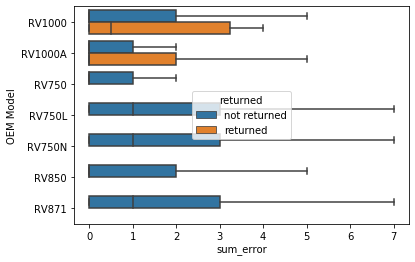

In [342]:
sns.boxplot(x='sum_error',y='OEM Model',hue='returned',data=part1[part1['OEM Model']!='RV750R'].fillna(0),showfliers=False)


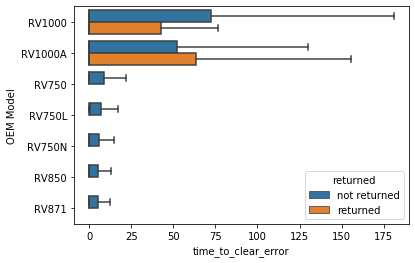

In [343]:
sns.boxplot(x='time_to_clear_error',y='OEM Model',hue='returned',data=part1[part1['OEM Model']!='RV750R'].fillna(0),showfliers=False)



In [239]:
#part1['OEM Model']=='RV1000'
#part1['OEM Model']=='RV1000A'

part1[((part1['totalruntime']==0) | (part1['totalruntime']>=100))&
((part1['max_chargerate']>=0.6)|
(part1['max_dischargerate']<=-0.5)|
(part1['min_chargelevel']<0))&
((part1['sum_error']>=3)|
(part1['time_to_clear_error']>=60))]

OEM Model              DSN  level_2         sum     count  \
34        RV1000  AC000W007209763        0    0.000000  2.000000   
564       RV1000  AC000W008115460        0    0.000000  2.000000   
673       RV1000  AC000W008118962        0    0.000000  1.000000   
904       RV1000  AC000W008121398        0    0.000000  2.666667   
1163      RV1000  AC000W008126554        0    0.000000  1.000000   
...          ...              ...      ...         ...       ...   
391327     RV871  AC000W009335973        0  117.500000  4.000000   
391341     RV871  AC000W009337849        0   73.250000  3.000000   
391352     RV871  AC000W009338332        0   44.666667  2.333333   
391355     RV871  AC000W009338526        0   70.333333  1.666667   
391363     RV871  AC000W009339661        0   40.750000  1.500000   

        No Dustbox Error  totalruntime  runfreq       online  chargefreq  ...  \
34                   NaN           0.0      4.0  7529.683333        28.0  ...   
564                  NaN           0.0      2.0  8889.766667       162.0  ...   
673                  NaN           0.0      1.0  8879.216667         8.0  ...   
904                  NaN           0.0      8.0  5033.583333        28.0  ...   
1163                 2.0           0.0      2.0  8659.450000        33.0  ...   
...                  ...           ...      ...          ...         ...  ...   
391327               NaN         235.0      8.0  3126.150000        56.0  ...   
391341               NaN         293.0     12.0  8901.783333        70.0  ...   
391352               NaN         134.0      7.0  8355.400000        39.0  ...   
391355               NaN         211.0      5.0  8661.683333        59.0  ...   
391363               1.0         163.0      6.0  8858.916667        48.0  ...   

        Side Brush Error time to clear  Side Brush Error#clear  \
34                                 NaN                     NaN   
564                                NaN                     NaN   
673                                NaN                     NaN   
904                                NaN                     NaN   
1163                               NaN                     NaN   
...                                ...                     ...   
391327                             NaN                     NaN   
391341                             NaN                     NaN   
391352                             NaN                     NaN   
391355                             NaN                     NaN   
391363                             NaN                     NaN   

        Top Bumper Error  Top Bumper Error time to clear  \
34                   NaN                             NaN   
564                  NaN                             NaN   
673                  NaN                             NaN   
904                  NaN                             NaN   
1163                 NaN                             NaN   
...                  ...                             ...   
391327               NaN                             NaN   
391341               NaN                             NaN   
391352               1.0                             NaN   
391355               NaN                             NaN   
391363               NaN                             NaN   

        Top Bumper Error#clear  Error = -1  Error = -1 time to clear  \
34                         NaN         NaN                       NaN   
564                        NaN         NaN                       NaN   
673                        NaN         NaN                       NaN   
904                        NaN         NaN                       NaN   
1163                       NaN         NaN                       NaN   
...                        ...         ...                       ...   
391327                     NaN         NaN                       NaN   
391341                     NaN         NaN                       NaN   
391352                     NaN         NaN             

In [235]:
part1.shape

(391371, 64)

In [241]:
part1['DSN'].count()

391371

In [ ]:
usage timeline
usage profile
clean mode
confidence value
location
charge cycles
error code
reinstall app
more data
delete set_pmvote=1 like set_deletemaps
weekday Mon, Tue, Wed
less than 5min and error
returned units
internal user units
set evacand resume
Get charging status ==False 
True on the dock
time from first dock event to charging status
how to calculate runtime
usage trend
age
successful rate


In [ ]:
# Import the domomagic package into the script 
from domomagic import *
import pandas as pd
import numpy as np
# read data from inputs into a data frame
final_df = read_dataframe('Python Script')
final_df['date']=final_df['Created At'].dt.date# write your script here

final_df['year']=final_df['Created At'].dt.year
#final_df['month']=final_df['Created At'].dt.month

final_df['week']=final_df['Created At'].dt.week

final_df['weekday']=final_df['Created At'].dt.weekday





def fun(data):
    data['created_next']=data['Created At'].shift(-1)
    data['dur']=(data['created_next']-data['Created At']).dt.total_seconds()/60
    
    time=data[data['Property Name']=='RunTimeCycle']
    usagetime=time['Value'].sum()
    usagefreq=time['Value'].count()
    daily=time.groupby('date')['Value'].agg(['sum','count'])
    #print(daily.mean().T)
    #online=(data['Created At'].max()-data['Created At'].min()).total_seconds()/60
    #print('youupypew')
    
    error=data[data['Property Name']=='GET_Error_Code']
    err=error.groupby(['error']).size()
    error['error_next']=error['error'].shift(-1)
    error['dur_err']=(error['Created At'].shift(-1)-error['Created At']).dt.total_seconds()/60

    clear=error[(error['error_next']=='Error = 0')&(error['error']!='Error = 0')]
    #print(error)
#     if len(clear)>0:
#         print( clear.groupby('error')['dur_err'].sum())
    errordur=clear.groupby('error')['dur_err'].sum()
    errordur.index= [i+' time to clear' for i in errordur.index]
    errorfreq=clear.groupby('error')['dur_err'].count()
    errorfreq.index= [i+'#clear' for i in errorfreq.index]
    cap=data[data['Property Name']=='GET_Battery_Capacity']
    cap['rate']=cap['Value'].diff()/cap['Created At'].diff().dt.total_seconds()
    charge=sum(cap['rate']>0)
    discharge=sum(cap['rate']<0)
    if len(cap['rate'].dropna())>0:
        max_charge=max(cap['rate'].dropna())
        maxdischarge=min(cap['rate'].dropna())
    else: 
        max_charge=0
        maxdischarge=0
    
#     version=[data[data['Property Name']=='GET_SCM_FW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_WiFi_HW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_HW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_Nav_Module_FW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Device_Model_Number']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_FW_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Main_PCB_BL_Version']['Value'].iloc[0],
#     data[data['Property Name']=='GET_Nav_Module_HW_Version']['Value'].iloc[0] ,
#     data[data['Property Name']=='GET_Nav_Module_BL_Version']['Value'].iloc[0]]
#     v=pd.DataFrame(version,index=['GET_SCM_FW_Version','GET_WiFi_HW_Version','GET_Main_PCB_HW_Version','GET_Nav_Module_FW_Version',
#                                'GET_Device_Model_Number','GET_Main_PCB_FW_Version','GET_Main_PCB_BL_Version','GET_Nav_Module_HW_Version','GET_Nav_Module_BL_Version'])
		
    #print(a)
    #print(err)
    #print(errordur.T)
    #print(pd.concat([daily.mean().T,err.T,a,errordur.T,errorfreq.T]).T)
    a=pd.DataFrame([usagetime,usagefreq,charge,discharge,max_charge,maxdischarge,
                    cap['Value'].min()],index=['totalruntime','runfreq','chargefreq','dischargefreq',
                                               'max_chargerate','max_dischargerate','min_chargelevel'])
    return pd.concat([daily.mean().T,a,errordur.T,errorfreq.T,err.T]).T

final_df=final_df.groupby(['OEM Model','DSN','year','week']).apply(fun).reset_index()
# write a data frame so it's available to the next action
write_dataframe(final_df)

In [112]:
location=pd.read_csv('location_zone.csv')

/Users/ycui/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
import geocoder
def getcity(data):
    g = geocoder.osm([data['Lat'],data['Long']], method='reverse')
    try: city=g.json['city']
    except: 
        try: city=g.json['county']
        except: city=''
    
    #print(pd.DataFrame([city,g.json['state'],g.json['country']]))
    #print([city,g.json['state'],g.json['country']])
    try: state=g.json['state']
    except: state=''
    c=pd.DataFrame([city,state,g.json['country']],index=['county','state','country'])
    sleep(3)
    #print(pd.concat([data,c],index=[1]).T)
    return c.T

In [116]:
#location=location.groupby(['DSN','zone']).apply(getcity).reset_index()

In [127]:
final_df['Created At'].min(),final_df['Created At'].max()

(Timestamp('2020-01-28 00:00:00'), Timestamp('2020-02-03 04:50:34'))

In [126]:
final_df['Created At']=pd.to_datetime(final_df['Created At'])

In [128]:
final_df['Created At']

0          2020-02-02 16:35:59
1          2020-02-02 17:00:54
2          2020-02-02 17:02:53
3          2020-02-02 17:02:54
4          2020-02-02 17:02:54
                   ...        
71937676   2020-02-02 20:06:07
71937677   2020-02-02 22:09:41
71937678   2020-02-02 22:10:36
71937679   2020-02-02 22:10:41
71937680   2020-02-02 22:12:56
Name: Created At, Length: 71937681, dtype: datetime64[ns]

In [135]:
missions=pd.read_csv('missions.csv')

In [142]:
missions[missions['DSN']=='AC000W003768926']

OEM Model              DSN            Property Name  \
772669     RV750  AC000W003768926       Entered Clean Mode   
772670     RV750  AC000W003768926      Entered Paused Mode   
772671     RV750  AC000W003768926        Entered Dock Mode   
772672     RV750  AC000W003768926  Contacted Charging Dock   
772673     RV750  AC000W003768926        Entered Dock Mode   
772674     RV750  AC000W003768926  Contacted Charging Dock   
772675     RV750  AC000W003768926        Entered Dock Mode   
772676     RV750  AC000W003768926  Contacted Charging Dock   
772677     RV750  AC000W003768926        Entered Dock Mode   
772678     RV750  AC000W003768926  Contacted Charging Dock   
772679     RV750  AC000W003768926        Entered Dock Mode   
772680     RV750  AC000W003768926  Contacted Charging Dock   
772681     RV750  AC000W003768926        Entered Dock Mode   
772682     RV750  AC000W003768926  Contacted Charging Dock   
772683     RV750  AC000W003768926        Entered Dock Mode   
772684     RV750  AC000W003768926  Contacted Charging Dock   
772685     RV750  AC000W003768926        Entered Dock Mode   
772686     RV750  AC000W003768926  Contacted Charging Dock   
772687     RV750  AC000W003768926        Entered Dock Mode   
772688     RV750  AC000W003768926    Lost Charging Contact   
772689     RV750  AC000W003768926        Entered Dock Mode   
772690     RV750  AC000W003768926    Lost Charging Contact   
772691     RV750  AC000W003768926  Contacted Charging Dock   
772692     RV750  AC000W003768926        Entered Dock Mode   
772693     RV750  AC000W003768926    Lost Charging Contact   
772694     RV750  AC000W003768926        Entered Dock Mode   
772695     RV750  AC000W003768926  Contacted Charging Dock   
772696     RV750  AC000W003768926    Lost Charging Contact   
772697     RV750  AC000W003768926        Entered Dock Mode   
772698     RV750  AC000W003768926  Contacted Charging Dock   
772699     RV750  AC000W003768926      Entered Paused Mode   
772700     RV750  AC000W003768926             RunTimeCycle   
772701     RV750  AC000W003768926        RunTimeCumulative   

                      Display Name Data Type          Created At  \
772669       Start/Stop/Home/Pause   integer 2020-01-28 00:08:11   
772670       Start/Stop/Home/Pause   integer 2020-01-28 01:09:20   
772671       Start/Stop/Home/Pause   integer 2020-01-28 01:09:50   
772672             Charging Status   boolean 2020-01-28 07:11:51   
772673       Start/Stop/Home/Pause   integer 2020-01-28 07:11:52   
772674             Charging Status   boolean 2020-01-28 07:11:52   
772675       Start/Stop/Home/Pause   integer 2020-01-28 07:11:53   
772676             Charging Status   boolean 2020-01-28 19:02:20   
772677       Start/Stop/Home/Pause   integer 2020-01-28 19:03:04   
772678             Charging Status   boolean 2020-01-28 19:03:07   
772679       Start/Stop/Home/Pause   integer 2020-01-28 19:03:14   
772680             Charging Status   boolean 2020-01-29 07:02:58   
772681       Start/Stop/Home/Pause   integer 2020-01-29 07:02:59   
772682             Charging Status   boolean 2020-01-29 07:03:00   
772683       Start/Stop/Home/Pause   integer 2020-01-29 07:03:02   
772684             Charging Status   boolean 2020-01-29 19:04:04   
772685       Start/Stop/Home/Pause   integer 2020-01-29 19:04:05   
772686             Charging Status   boolean 2020-01-29 19:04:05   
772687       Start/Stop/Home/Pause   integer 2020-01-29 19:04:06   
772688             Charging Status   boolean 2020-01-30 07:03:55   
772689       Start/Stop/Home/Pause   integer 2020-01-30 07:04:02   
772690             Charging Status   boolean 2020-01-30 19:01:57   
772691             Charging Status   boolean 2020-01-30 19:02:14   
772692       Start/Stop/Home/Pause   integer 2020-01-30 19:02:18   
772693             Charging Status   boolean 2020-01-31 07:14:00   
772694       Start/Stop/Home/Pause   integer 2020-01-31 10:02:47   
772695             Charging Status   boolean 2020-02-02 19:04:

In [21]:
data.shape

(103860, 56)

In [23]:
import random 
random.choices(list(data['DSN'].unique()), k=1000)

['AC000W008287203',
 'AC000W008727166',
 'AC000W008602650',
 'AC000W008318585',
 'AC000W008222720',
 'AC000W008200543',
 'AC000W008232698',
 'AC000W008246233',
 'AC000W008789471',
 'AC000W008185948',
 'AC000W008603822',
 'AC000W008780970',
 'AC000W008719180',
 'AC000W008356919',
 'AC000W008738356',
 'AC000W008330452',
 'AC000W008728786',
 'AC000W008602785',
 'AC000W008713967',
 'AC000W008355588',
 'AC000W008724520',
 'AC000W008330504',
 'AC000W008741524',
 'AC000W008358801',
 'AC000W008352914',
 'AC000W008245813',
 'AC000W008743177',
 'AC000W008359294',
 'AC000W008249919',
 'AC000W008732017',
 'AC000W008344225',
 'AC000W008695330',
 'AC000W008241822',
 'AC000W008708754',
 'AC000W008176232',
 'AC000W008355681',
 'AC000W008697219',
 'AC000W008248930',
 'AC000W008133570',
 'AC000W008300086',
 'AC000W008317270',
 'AC000W008224496',
 'AC000W008185119',
 'AC000W008217037',
 'AC000W008306209',
 'AC000W008741213',
 'AC000W008798810',
 'AC000W008718294',
 'AC000W008304972',
 'AC000W008776950',
